# Sommaire

# I) Importation des librairies et des données

In [1]:
# Chargement des librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy
import sklearn
import time

# Pour mesurer le temps d'exécution du script

Start = time.time()



In [2]:
# Billet sera le dataframe sur lequel on va travailler avec 1500 exemple de billet
# 1000 vrai et 500 faux

Billet = pd.read_csv('billets.csv', sep =';')

# billet prod c'est pour voir le format des données avec lequel notre algorithme doit être compatible

Billet_Prod = pd.read_csv('billets_production.csv', sep =',')

In [3]:
Billet_Prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


# II) Exploration des données

In [4]:
Billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [5]:
Billet_Prod

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [6]:
# Créons une fonction qui permet de tester s'il y a des Nan dans un dataframe
# et permet de réssumer les principales informations du dataframe

def Test_Nan(Machin):
    
    S = Machin.shape
    Nbre_Ligne = S[0]
    Nbre_Colonne = S[1]
    
    a = []
    b = []
    c = []
    d = []
    e = []
    
    # On calcul le nbre d'élément au début et après suppression des doublons
    
    a = Nbre_Ligne
    b = Machin.dropna().count()
    c = a - b
    
    # On compte les éléments sauf les Nan
    
    d = Machin.count()
    
    # e le nombre de Nan par colonne
    
    e = a - d
    
    if c[0] > 0:
        print(f"ATTENTION Il y a des Nan dans le dataframe testé !!!")
        print(f"Au total en supprimant les lignes avec Nan on va supprimer {c[0]} lignes sur {a} lignes au total \nsoit {(b[0]/a*100).round(2)} % de lignes conservées")
        for k in range(0,Nbre_Colonne,1):
            print(f"Il y a au total {e[k]} Nan sur la {k+1} ème colonne '{Machin.columns[k]}'")
            
    else:    
        print(f"Il n'y a pas de Nan dans le dataframe testé et il y {a} lignes au total")

# PS: J'ai pu tester en mettant des Nan dans un dataframe test et tout fonctionne
# Pour cela on met Customers.iloc[0,2]= float("nan") pour insérer un Nan dans le dataframe Customers à la position [0,2]

In [7]:
Test_Nan(Billet)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 37 lignes sur 1500 lignes au total 
soit 97.53 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 37 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


In [8]:
# Pour remplacer les valeurs manquantes

Masque_Nan = Billet['margin_low'].isna()== True

Billet_Nan = Billet[Masque_Nan]

Billet_Nan.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [9]:
Masque_Vrais = Billet["is_genuine"] == True
Vrais_Billets = Billet[Masque_Vrais]

Vrais_Billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


In [10]:
Test_Nan(Vrais_Billets)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 29 lignes sur 1000 lignes au total 
soit 97.1 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 29 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


In [11]:
Masque_Faux = Billet["is_genuine"] == False
Faux_Billets = Billet[Masque_Faux]

Faux_Billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [12]:
Test_Nan(Faux_Billets)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 8 lignes sur 500 lignes au total 
soit 98.4 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 8 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


## a) La Table Billet

In [13]:
Billet["is_genuine"].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

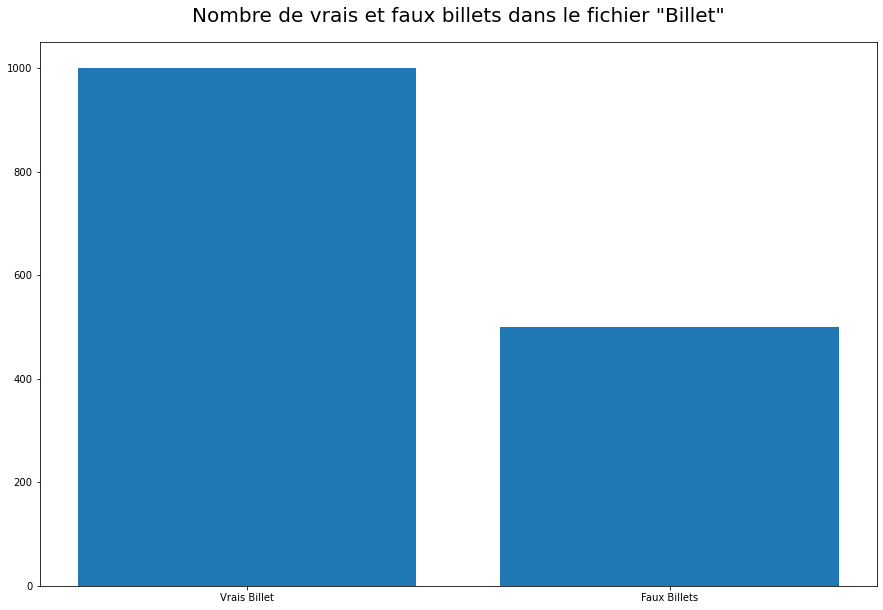

In [14]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs-5,fs-10))

# Graphique

X = ["Vrais Billet","Faux Billets"]
Y1 = Billet["is_genuine"].value_counts()[1] 
Y2 = Billet["is_genuine"].value_counts()[0] 

plt.bar(X,[Y1,Y2])

# Customisation 

plt.title("Nombre de vrais et faux billets dans le fichier \"Billet\"", fontsize = fs,pad=fs)

# Pour sauvegarder les figures

plt.savefig("P10_nbre_Billets.png")
plt.show()

In [15]:
Billet.describe().round(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


In [16]:
# Je vais mettre en place un dictionnaire des variables pour les afficher en français dans les graphiques:

Dico_variable = {Billet.columns[1]:"la diagonale",
                 Billet.columns[2]:"la hauteur gauche",
                 Billet.columns[3]:"la hauteur droite",
                 Billet.columns[4]:"la marge inférieure",
                 Billet.columns[5]:"la marge supérieure",
                 Billet.columns[6]:"la longueur"
                }

In [17]:
# Je vais faire une fonction qui fait l'analyse de la forme d'une distribution:

def Analyse_forme_distribution(colonne):
    
    Moy = round(colonne.mean(),2)
    Sigma = round(colonne.std(),2)
    Coeff_Variation = round(Sigma/Moy,2)
    Médiane = round(colonne.median(),2)
    Mode = round(colonne.mode(),2)
    skew = round(colonne.skew(),2)
    kurtosis = round(colonne.kurtosis(),2)
    
    print(f"La distribution a une moyenne de {Moy}, un écart-type de {Sigma}, une médiane de {Médiane}")
    print(f"Le coefficient de variation (Sigma / Moyenne) est égal à {Coeff_Variation}")
    
    if skew == 0:
        print("La distribution est symétrique")
    elif skew > 0:
        print("La distribution est asymétrique (étalée à droite): les valeur sont concentrées à gauche")
    else:
        print("La distribution est asymétrique (étalée à gauche): les valeur sont concentrées à droite")
    
    if kurtosis == 0:
        print("La distribution a le même aplatissement que la distribution normale")
    elif kurtosis > 0:
        print("La distribution est moins aplatie que la distribution normale, les valeurs sont plus concentrées")
    else:
        print("La distribution est plus aplatie que la distribution normale, les valeurs sont moins concentrées")

Pour le graphique 1 voici les informations remarquables sur l'histogramme
La distribution a une moyenne de 171.96, un écart-type de 0.31, une médiane de 171.96
Le coefficient de variation (Sigma / Moyenne) est égal à 0.0
La distribution est asymétrique (étalée à gauche): les valeur sont concentrées à droite
La distribution est plus aplatie que la distribution normale, les valeurs sont moins concentrées


Pour le graphique 2 voici les informations remarquables sur l'histogramme
La distribution a une moyenne de 104.03, un écart-type de 0.3, une médiane de 104.04
Le coefficient de variation (Sigma / Moyenne) est égal à 0.0
La distribution est asymétrique (étalée à gauche): les valeur sont concentrées à droite
La distribution est plus aplatie que la distribution normale, les valeurs sont moins concentrées


Pour le graphique 3 voici les informations remarquables sur l'histogramme
La distribution a une moyenne de 103.92, un écart-type de 0.33, une médiane de 103.92
Le coefficient de variati

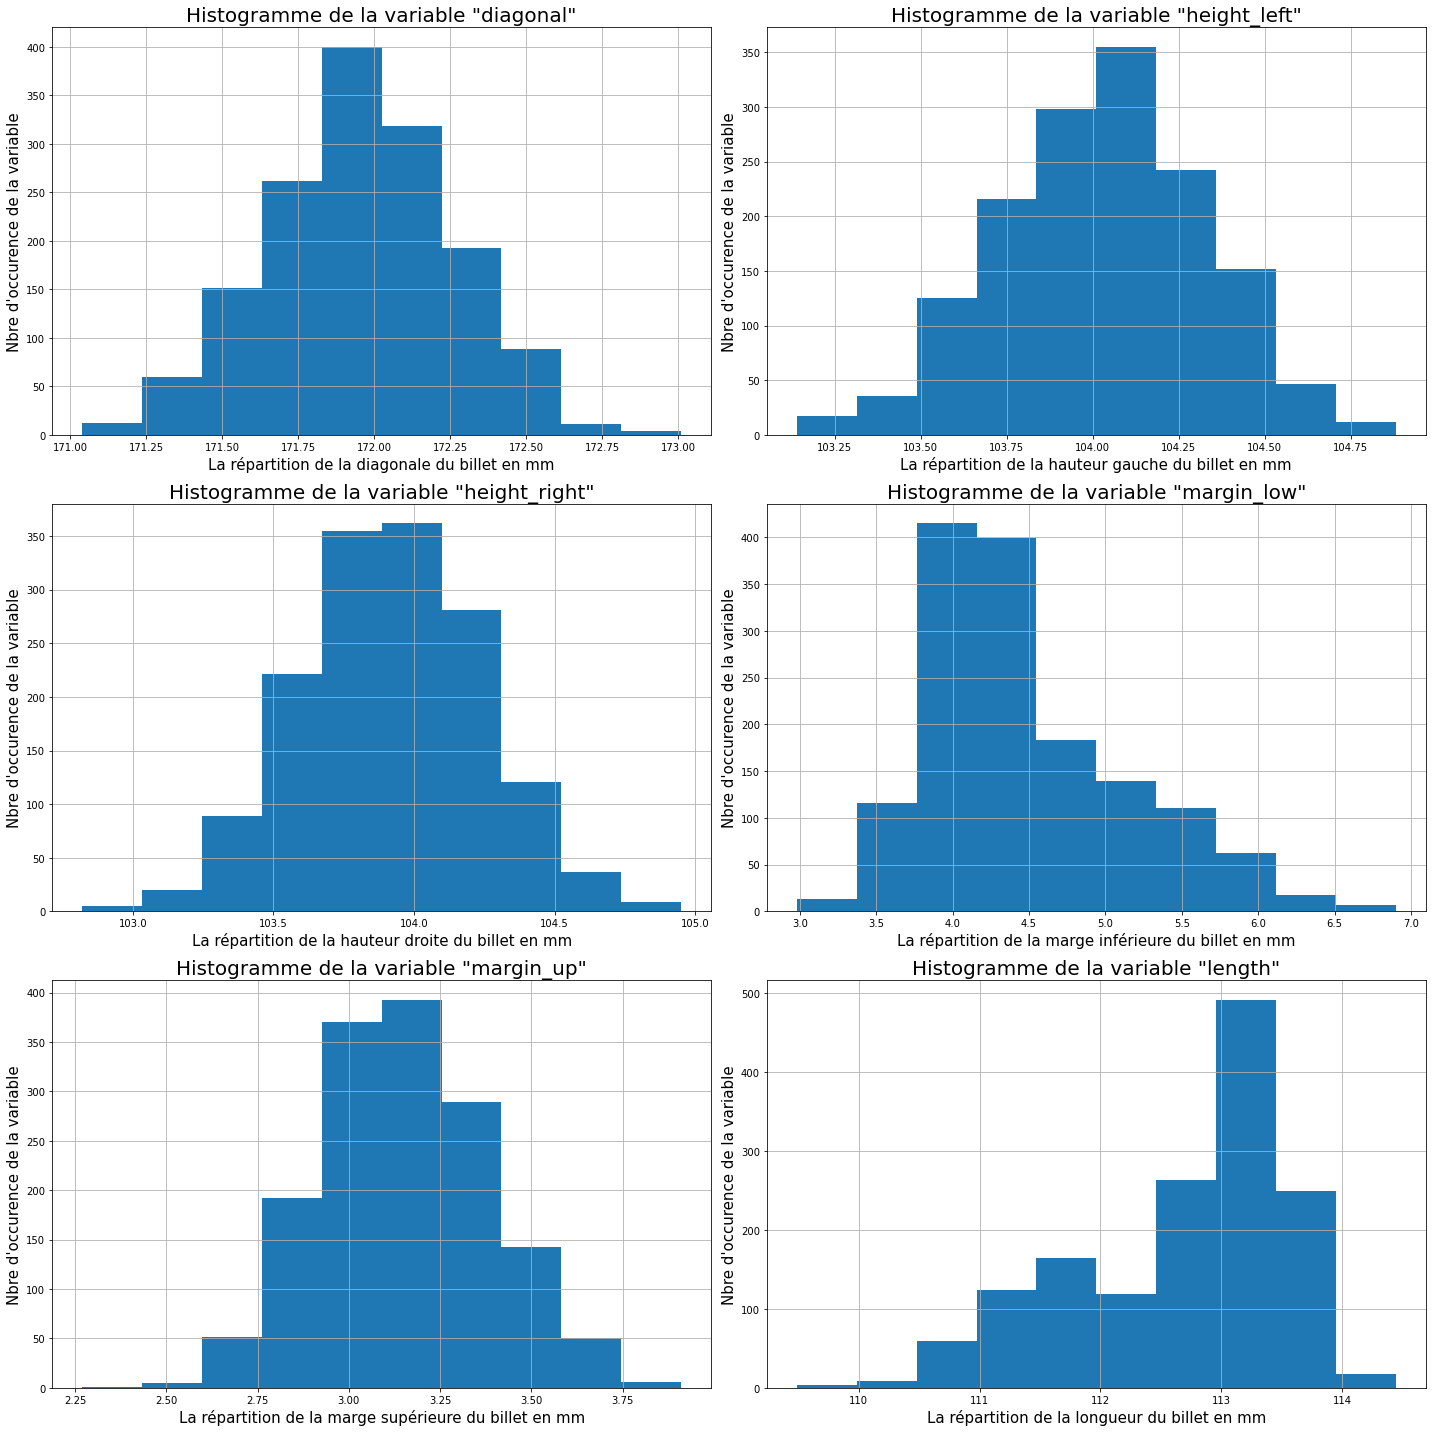

In [18]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Graphique

for i in range(6):
    plt.subplot(3,2,i+1)
    Billet[Billet.columns[i+1]].hist()
    plt.title(f"Histogramme de la variable \"{Billet.columns[i+1]}\"", fontsize = fs)
    plt.xlabel(f"La répartition de {Dico_variable.get(Billet.columns[i+1])} du billet en mm",fontsize = fs-5)
    plt.ylabel("Nbre d'occurence de la variable",fontsize = fs-5)
    print(f"Pour le graphique {i+1} voici les informations remarquables sur l'histogramme")
    Analyse_forme_distribution(Billet[Billet.columns[i+1]])
    print("\n")
    plt.tight_layout()
    
# Pour sauvegarder les figures

plt.savefig("P10_Histogramme_variables.png")
plt.show()


In [19]:
# On peut résumer l'ensemble des variables via la fonction describe

Describe_Billet = Billet.describe().round(2)
Describe_Billet

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


In [20]:
Describe_boxplot = Describe_Billet.loc['mean':'max',:]
Describe_boxplot

,diagonal,height_left,height_right,margin_low,margin_up,length
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


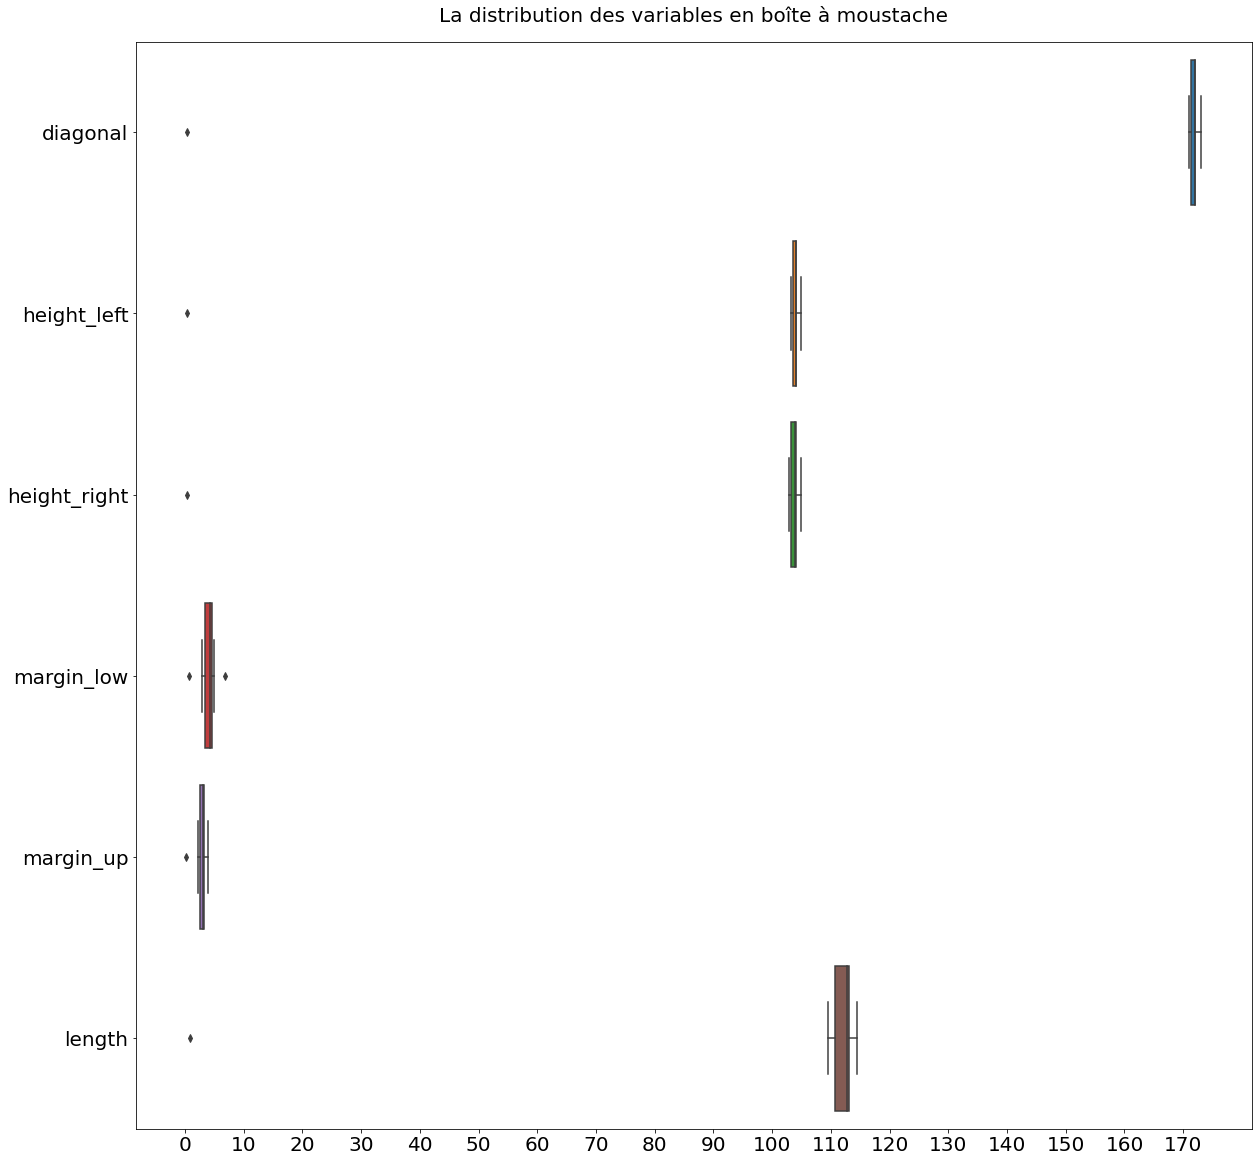

In [21]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Graphique

sns.boxplot(data= Describe_boxplot,orient= 'h') 

plt.title(label="La distribution des variables en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(0,175,10),fontsize = fs)
plt.yticks(fontsize = fs)
    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables.png")
plt.show()

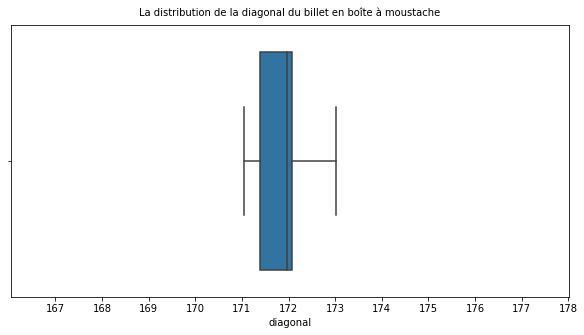

In [22]:
# Taille de la figure

fs = 10

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'diagonal'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_diagonal.png")
plt.show()

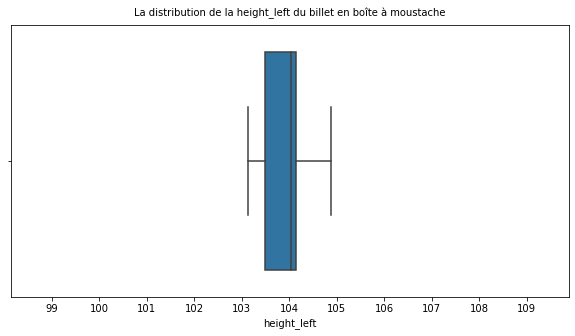

In [23]:
# Taille de la figure

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'height_left'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_height_left.png")
plt.show()

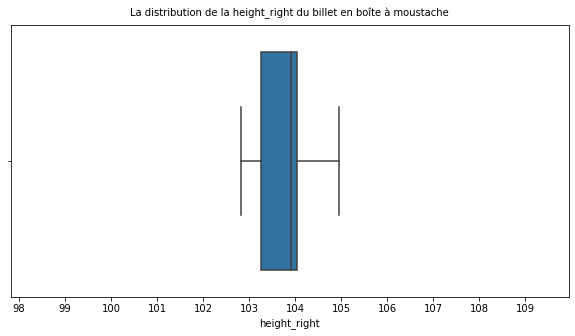

In [24]:
# Taille de la figure

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'height_right'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_height_right.png")
plt.show()

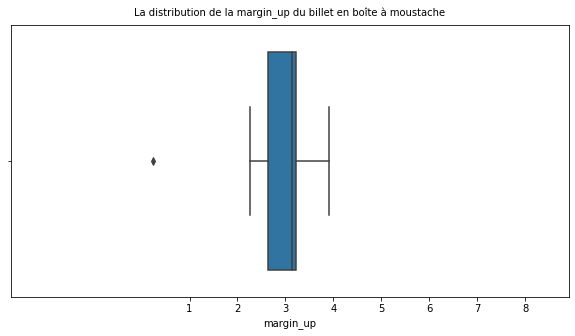

In [25]:
# Taille de la figure

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'margin_up'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_margin_up.png")
plt.show()

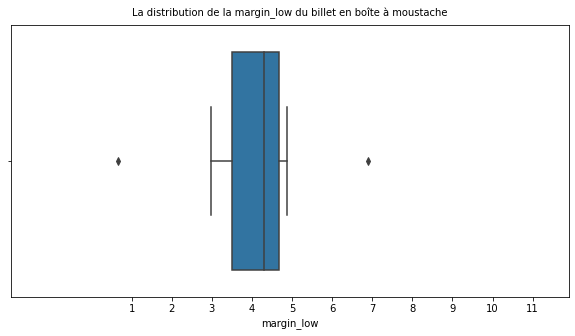

In [26]:
# Taille de la figure

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'margin_low'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_margin_low.png")
plt.show()

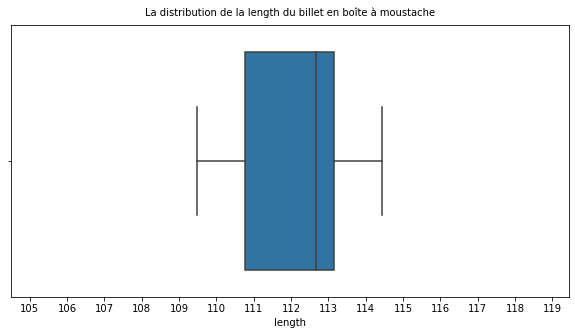

In [27]:
# Taille de la figure

plt.figure(figsize=(fs,fs-5))

# Graphique

variable = 'length'
colonne = Billet[variable]
         
sns.boxplot(data= Describe_boxplot,x=variable) 

plt.title(label=f"La distribution de la {variable} du billet en boîte à moustache",loc='center', pad= fs,fontsize=fs)
plt.xticks(np.arange(1,180,1),fontsize = fs)
plt.yticks(fontsize = fs)
plt.xlabel(xlabel= variable,fontsize= fs)
plt.xlim(min(colonne)- 5, max(colonne)+ 5)

    
# Pour sauvegarder les figures

plt.savefig("P10_Boxplot_variables_length.png")
plt.show()

<Figure size 1440x1440 with 0 Axes>

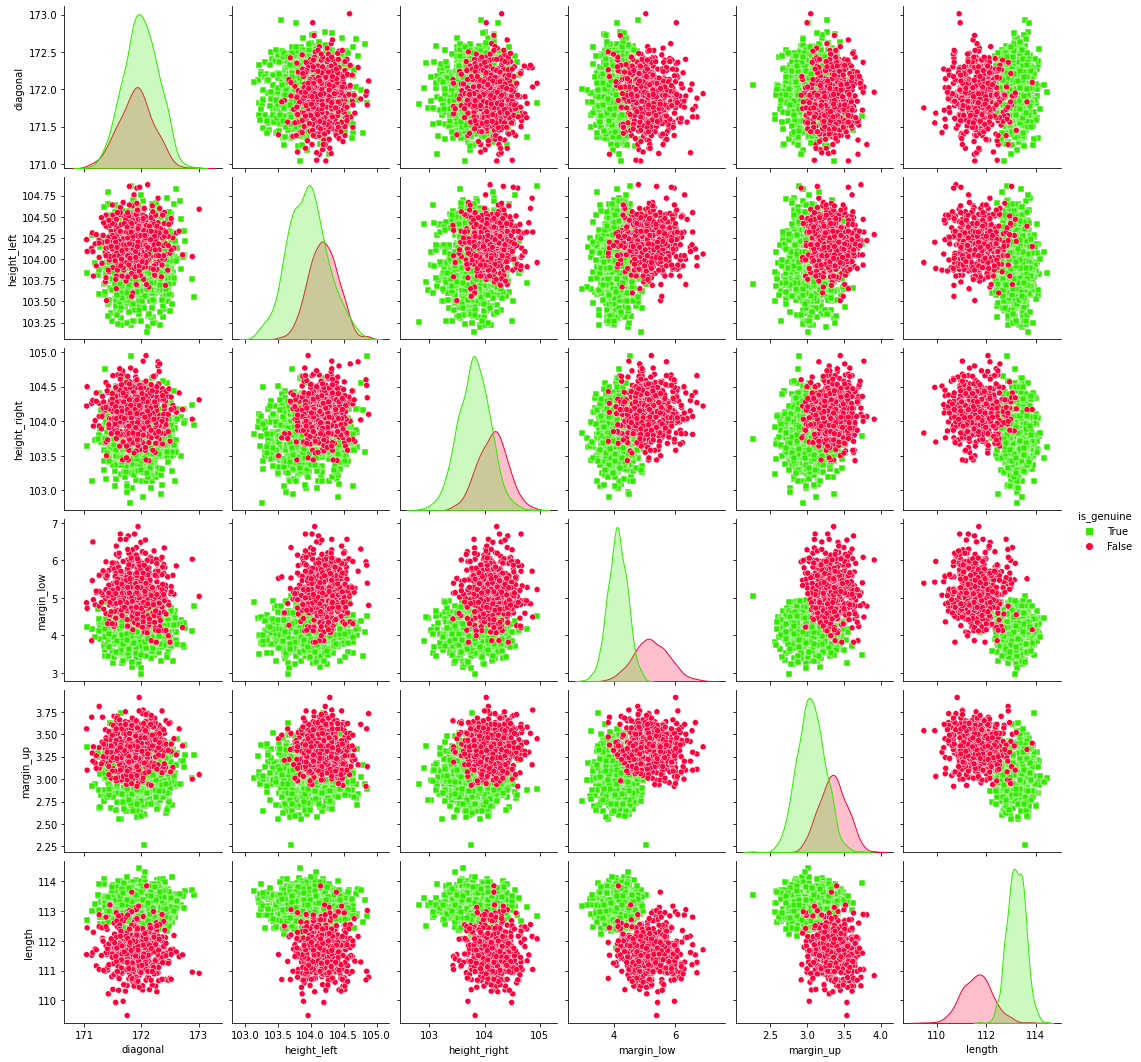

In [28]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Graphiques

sns.pairplot(Billet, hue="is_genuine",hue_order=[True,False],markers=["o", "s"],palette= "prism")

# Pour sauvegarder les figures

plt.savefig("P10_variables_entre_elles.png")
plt.show()


In [29]:
# Pour mesurer le temps d'excécution

Tps_Fin_exploration = time.time()


# III) Complétons les Nan avec une régression linéaire

In [30]:
Test_Nan(Billet)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 37 lignes sur 1500 lignes au total 
soit 97.53 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 37 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


## a) Préparation des données pour l'entrainement

In [31]:
# L'idée de la regression est de créer un modèle à partir de valeurs quantitative X pour trouver une valeur
# de Y de la marge inférieur qui a quelques valeurs manquantes.

# Une fois le modèle réalisé on remplacera les Nan par les valeurs que le modèle nous donne

Billet_Regression = Billet.dropna()

Yregression = Billet_Regression["margin_low"]

# je pense réaliser une régression multiple

Xregression = Billet_Regression[['diagonal','height_left','height_right','margin_up','length']]

Xregression_avec_genuine = Billet_Regression[["is_genuine",'diagonal','height_left','height_right','margin_up','length']]


In [32]:
# Je vais remettre en dimension 1463,1 pour éviter des soucis

Yregression.shape

(1463,)

In [33]:
Yregression2 = np.reshape(Yregression.ravel(),(Yregression.shape[0],1))

Yregression2

array([[4.52],
       [3.77],
       [4.4 ],
       ...,
       [5.51],
       [5.17],
       [4.63]])

In [34]:
# Ok

Yregression2.shape

(1463, 1)

In [35]:
# ok

Xregression.shape

(1463, 5)

In [36]:
# ok

Xregression_avec_genuine.shape

(1463, 6)

## b) Training set et testing set

In [37]:
# Cellule de test avec Xregression si besoin de retester => oui car je n'utilise pas is_genuine

# je vais séparer mes données entre un training set et un testing set

# Pour améliorer mon modèle et que mon modèle ne soit pas trop dépendant des données

from sklearn.model_selection import train_test_split

# je mets 80 % des données dans le training test et 20 % dans le testing set pour évaluer mon modèle avec des données 
# qu'il n'a jamais vu

Xtrain_reg, Xtest_reg, Ytrain_reg, Ytest_reg = train_test_split(Xregression,Yregression2, test_size= 0.2) 

print(f"Il y a {round((Xtrain_reg.shape[0]*100)/((Xregression.shape[0])),2)} % des valeurs dans le training set")


Il y a 79.97 % des valeurs dans le training set


## c) Entrainement du modèle

### Sans Normalisation

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
reg_sans_normalisation = model.fit(Xtrain_reg,Ytrain_reg)
score_reg_sans_normalisation = model.score(Xtest_reg,Ytest_reg)

print(f"Le modèle linéaire a un coefficient de détermination de {score_reg_sans_normalisation.round(4)} de précision")


Le modèle linéaire a un coefficient de détermination de 0.5049 de précision


### Avec Normalisation MinMax Scaler

In [39]:
# Il est conseillé de Normaliser les valeurs avant de faire la regression linéaire

# Je vais comme dans le projet précédent utiliser MinMax sclaer qui était plus intéressant 
# que le standard scaler ou Robust scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xtrain_reg_MinMax = scaler.fit_transform(Xtrain_reg,Ytrain_reg)

Xtest_reg_MinMax = scaler.transform(Xtest_reg)


In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
reg_MinMax_scaler = model.fit(Xtrain_reg_MinMax,Ytrain_reg)
score_reg_MinMax_scaler = model.score(Xtest_reg_MinMax,Ytest_reg)

print(f"Le modèle linéaire a un coefficient de détermination de {score_reg_MinMax_scaler.round(4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.5049 de précision


### Avec Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_reg_Normalized_STD = scaler.fit_transform(Xtrain_reg,Ytrain_reg)

Xtest_reg_Normalized_STD = scaler.transform(Xtest_reg)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
reg_standard_scaler = model.fit(Xtrain_reg_Normalized_STD,Ytrain_reg)
score_reg_standard_scaler = model.score(Xtest_reg_Normalized_STD,Ytest_reg)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_reg_standard_scaler,4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.5049 de précision


In [42]:
Score = [score_reg_sans_normalisation.round(4),score_reg_MinMax_scaler.round(4),score_reg_standard_scaler.round(4)]

Nom_Modèle_reg = ["Modèle de régression sans normalisation",
                  "Modèle de régression avec MinMax Scaler",
                 "Modèle de régression avec Standard Scaler"]

if Score[0] != Score[1]:
    a = np.argmax(Score)
    print(f"Le modèle de normalisation qui a le meilleur coefficient de détermination est \nle \"{Nom_Modèle_reg[a]}\"")
    print(f"avec un score de {round(np.max(Score),4)} de coefficient de détermination")  

elif Score[1] != Score[2]:
    a = np.argmax(Score)
    print(f"Le modèle de normalisation qui a le meilleur coefficient de détermination est \nle \"{Nom_Modèle_reg[a]}\"")
    print(f"avec un score de {round(np.max(Score),4)} de coefficient de détermination")    
else:
    print(f"Le modèle sans normalisation a le meilleur coefficient de détermination avec un score de {round(np.max(Score),4)} \ndu coefficient de détermination")  

Le modèle sans normalisation a le meilleur coefficient de détermination avec un score de 0.5049 
du coefficient de détermination


## d) Learning curve

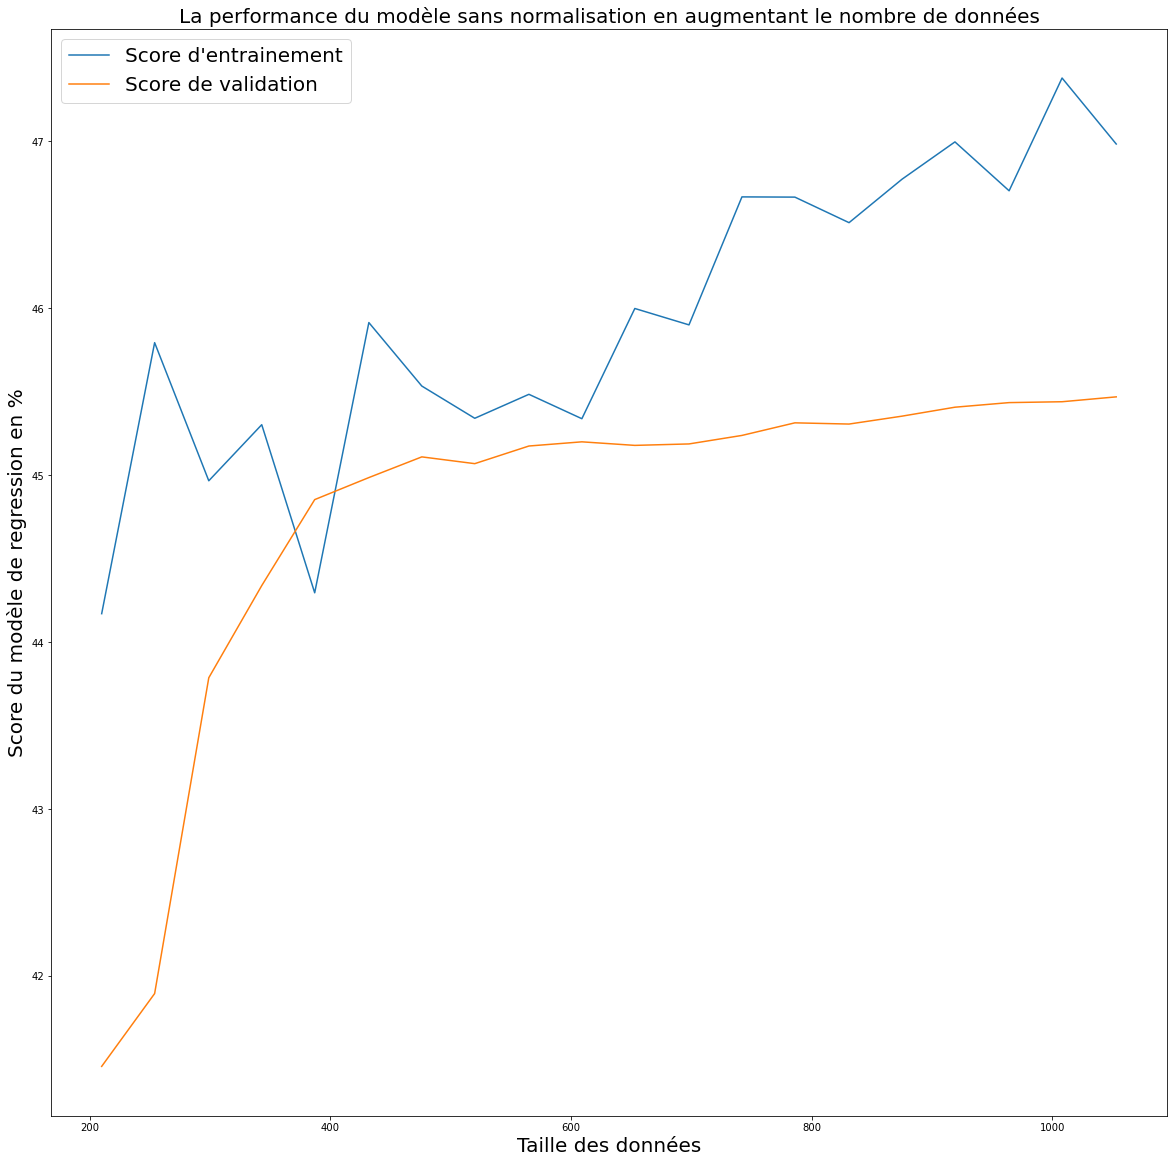

In [43]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

from sklearn.model_selection import learning_curve

Nbre_découpage = 10

N,train_score_lc_reg, validation_score_lc_reg = learning_curve(reg_sans_normalisation,Xtrain_reg,Ytrain_reg.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_reg.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_reg.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle de regression en %",fontsize=fs)
plt.title(label="La performance du modèle sans normalisation en augmentant le nombre de données",fontsize= fs)
plt.legend(fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_reg_sans_norma.png")
plt.show()


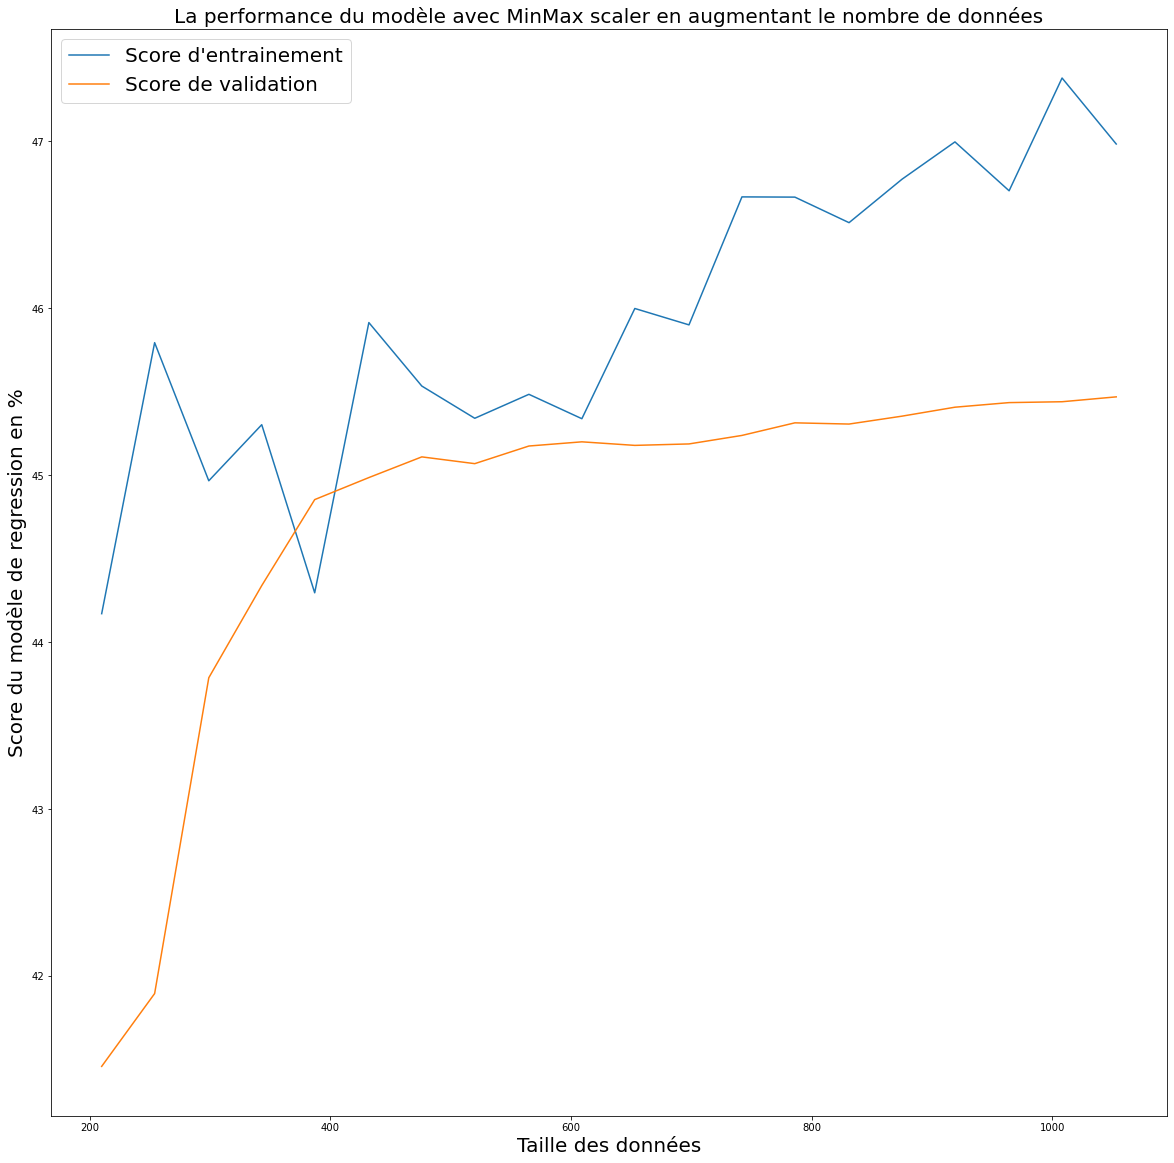

In [44]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

from sklearn.model_selection import learning_curve

Nbre_découpage = 10

N,train_score_lc_reg, validation_score_lc_reg = learning_curve(reg_MinMax_scaler,Xtrain_reg_MinMax,Ytrain_reg.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_reg.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_reg.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle de regression en %",fontsize=fs)
plt.title(label="La performance du modèle avec MinMax scaler en augmentant le nombre de données",fontsize= fs)

plt.legend(fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_reg_MinMax_scaler.png")
plt.show()


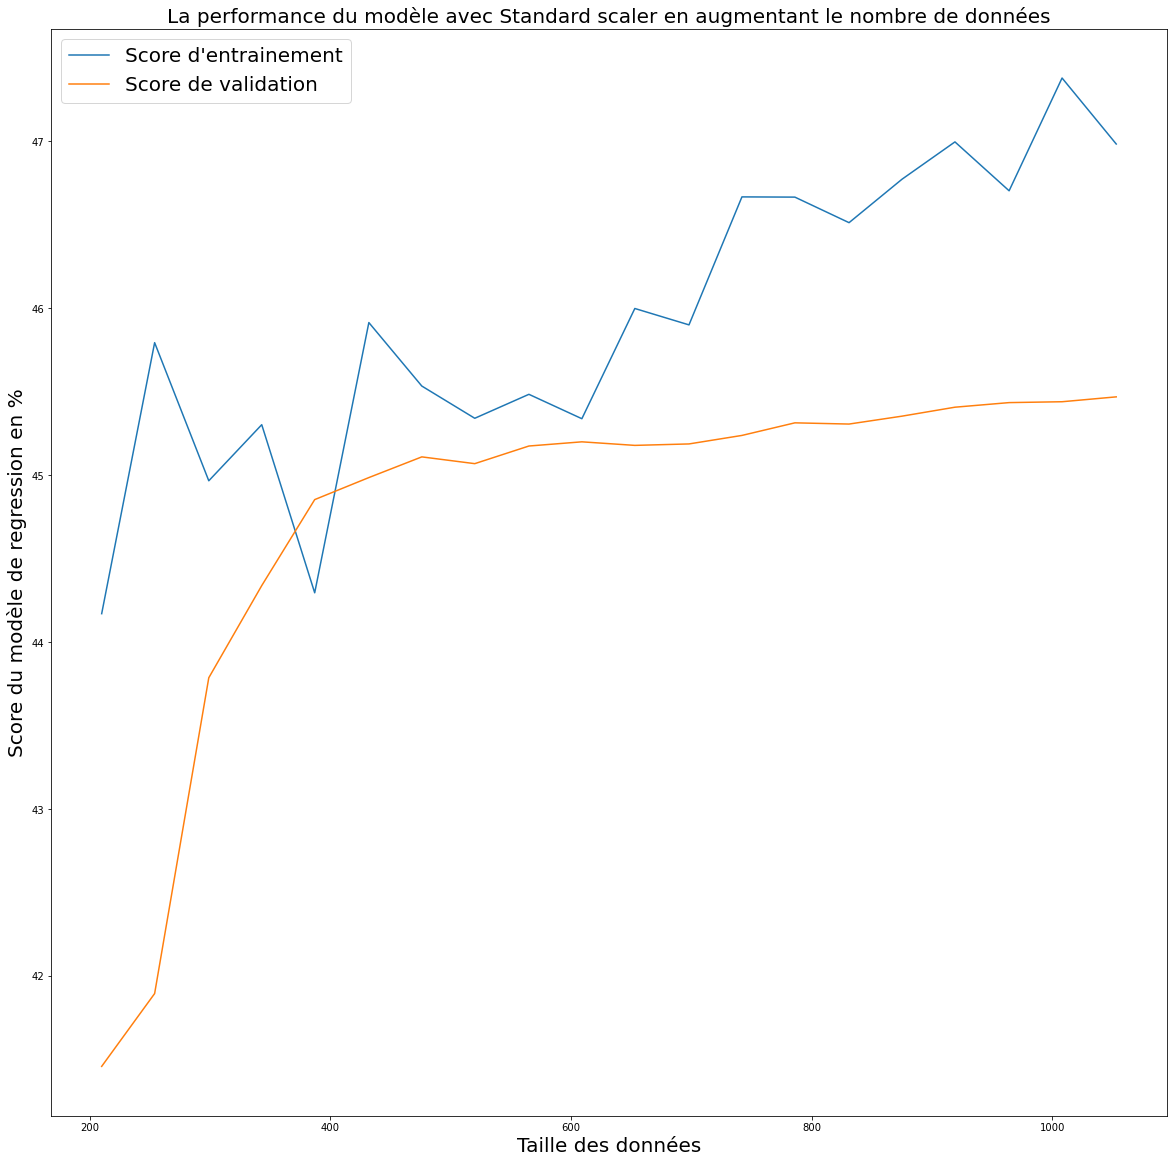

In [45]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

from sklearn.model_selection import learning_curve

Nbre_découpage = 10

N,train_score_lc_reg, validation_score_lc_reg = learning_curve(reg_standard_scaler,Xtrain_reg_Normalized_STD,Ytrain_reg.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_reg.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_reg.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle de regression en %",fontsize=fs)
plt.title(label="La performance du modèle avec Standard scaler en augmentant le nombre de données",fontsize= fs)

plt.legend(fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_reg_Standard_Scaler.png")
plt.show()


## e) Eliminons les variables superflues de la regression linéaire

In [46]:
from sklearn.feature_selection import RFE, RFECV

# Cela va sélectionner les variables de la régression linéaire de manière récurcive en utilisant la cross validation

# Cross validation découpage par 20

Nbre_découpage= 20

selector = RFECV(LinearRegression(),step=1,min_features_to_select=2,cv = Nbre_découpage)

selector.fit(Xtrain_reg,Ytrain_reg)
selector.ranking_

array([1, 1, 1, 1, 1])

In [47]:
selector.support_

array([ True,  True,  True,  True,  True])

In [48]:
# Pour rappel du nom des variables

Xtrain_reg

,diagonal,height_left,height_right,margin_up,length
1113,171.84,104.52,104.19,3.47,110.64
133,171.54,104.36,103.28,3.21,113.43
1088,171.91,104.26,104.62,3.44,110.68
653,172.53,103.99,103.55,3.10,113.03
1200,171.99,104.04,104.25,3.43,111.83
...,...,...,...,...,...
436,171.88,104.58,104.31,2.82,113.71
4,171.73,104.28,103.46,3.48,112.54
1007,171.83,104.13,104.52,3.27,111.72
21,171.82,103.65,103.64,2.80,112.57


In [49]:
# Je vais garder les variables recommandées

selector.support_

array([ True,  True,  True,  True,  True])

In [50]:
Xtrain_reg.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_up', 'length'], dtype='object')

In [51]:
# Pour prenbdre de manière automatique la bonne colonne

Billets_var_pertinentes = []
a = selector.get_support()

for i in range(len(a)):
    if a[i] == True:
        Billets_var_pertinentes.append(Xtrain_reg.columns[i])
    Xtrain_regression_que_variable_pertinente = Xtrain_reg[Billets_var_pertinentes] 

In [52]:
Billets_var_pertinentes

['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

In [53]:
Xtrain_regression_que_variable_pertinente

,diagonal,height_left,height_right,margin_up,length
1113,171.84,104.52,104.19,3.47,110.64
133,171.54,104.36,103.28,3.21,113.43
1088,171.91,104.26,104.62,3.44,110.68
653,172.53,103.99,103.55,3.10,113.03
1200,171.99,104.04,104.25,3.43,111.83
...,...,...,...,...,...
436,171.88,104.58,104.31,2.82,113.71
4,171.73,104.28,103.46,3.48,112.54
1007,171.83,104.13,104.52,3.27,111.72
21,171.82,103.65,103.64,2.80,112.57


# f) Le modèle finale avec vrais billets + faux billets

In [54]:
# je vais tout garder pour faire la regression linéaire

# Pas de séparation en training set et testing set => pour mettre le maximum de données

# En passant à utiliser pas de sclaer pour les X

# Une fois le modèle rélaisé on remplacera les Nan par les valeurs que le modèle nous donne




# Les X sans les nan avec que les variables pertinentes

Xregression

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [55]:
Xregression_var_pertinentes = Xregression[Billets_var_pertinentes]

Xregression_var_pertinentes

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [56]:
# Y le margin low sans les Nan

Yregression2 = np.reshape(Yregression.ravel(),(Yregression.shape[0],1))

Yregression2

array([[4.52],
       [3.77],
       [4.4 ],
       ...,
       [5.51],
       [5.17],
       [4.63]])

In [57]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_final = LinearRegression()
reg_lin_tous_billets = model_final.fit(Xregression_var_pertinentes,Yregression2)
score_reg_lin_tous_billets = model_final.score(Xregression_var_pertinentes,Yregression2)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_reg_lin_tous_billets,4)} de précision sur tous les Xtrains")

Le modèle linéaire a un coefficient de détermination de 0.4773 de précision sur tous les Xtrains


In [58]:
print(f"Pour info en ayant moins de donnée le coefficient de détermination était de {round(score_reg_sans_normalisation,4)} sur les Xtests")

Pour info en ayant moins de donnée le coefficient de détermination était de 0.5049 sur les Xtests


### Les Modèles Finaux ?

### Pour les vrais billets

In [59]:
Vrais_Billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


In [60]:
Test_Nan(Vrais_Billets)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 29 lignes sur 1000 lignes au total 
soit 97.1 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 29 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


In [61]:
Vrais_Billets_Nan_OK = Vrais_Billets.dropna()

In [62]:
# Voici le Y c'est le Y le margin low sans les Nan

Yregression_vrais_billets = Vrais_Billets_Nan_OK["margin_low"]

Yregression_vrais_billets.shape

(971,)

In [63]:
# Je redimensionne

Yregression_vrais_billets2 = np.reshape(Yregression_vrais_billets.ravel(),(Yregression_vrais_billets.shape[0],1))

Yregression_vrais_billets2.shape

(971, 1)

In [64]:
# X

Xregression_vrais_billets = Vrais_Billets_Nan_OK.drop(columns={"margin_low",'is_genuine'})

Xregression_vrais_billets

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
995,171.66,103.92,103.47,2.83,113.20
996,172.16,103.72,103.61,2.72,113.51
997,171.78,103.38,104.22,3.07,113.77
998,171.44,103.96,103.92,2.89,113.21


In [65]:
Xregression_vrais_billets.shape

(971, 5)

In [66]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_vrais_billets = LinearRegression()
reg_vrais_billets = model_vrais_billets.fit(Xregression_vrais_billets,Yregression_vrais_billets2)
score_vrais_billets = model_vrais_billets.score(Xregression_vrais_billets,Yregression_vrais_billets2)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_vrais_billets,4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.0079 de précision


In [67]:
# voici les coefficients de la regression linéaire

reg_vrais_billets.coef_

array([[ 0.03896157,  0.00449313,  0.03602315, -0.10713789,  0.03489277]])

### Je sélectionne les variables pertinentes

In [68]:
from sklearn.feature_selection import RFE, RFECV

# Cela va sléctionner les variables de la régression linéaire de manière récurcive en utilisant la cross validation

# Cross validation découpage par 20

selector = RFECV(LinearRegression(),step=1,min_features_to_select=2,cv = 20)

selector.fit(Xregression_vrais_billets,Yregression_vrais_billets2)
selector.ranking_

array([1, 2, 1, 1, 1])

In [69]:
selector.get_support()

array([ True, False,  True,  True,  True])

In [70]:
Xregression_vrais_billets.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_up', 'length'], dtype='object')

In [71]:
# Pour prendre de manière automatique la bonne colonne

Vrais_billets_var_pertinentes = []
a = selector.get_support()


for i in range(len(a)):
    if a[i] == True:
        Vrais_billets_var_pertinentes.append(Xregression_vrais_billets.columns[i])
    Xreg_Vrais_billets_var_pertinentes = Vrais_Billets_Nan_OK[Vrais_billets_var_pertinentes]        

In [72]:
Vrais_billets_var_pertinentes

['diagonal', 'height_right', 'margin_up', 'length']

In [73]:
Xreg_Vrais_billets_var_pertinentes

,diagonal,height_right,margin_up,length
0,171.81,104.95,2.89,112.83
1,171.46,103.66,2.99,113.09
2,172.69,103.50,2.94,113.16
3,171.36,103.94,3.01,113.51
4,171.73,103.46,3.48,112.54
...,...,...,...,...
995,171.66,103.47,2.83,113.20
996,172.16,103.61,2.72,113.51
997,171.78,104.22,3.07,113.77
998,171.44,103.92,2.89,113.21


In [74]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_vrais_billets = LinearRegression()
reg_vrais_billets = model_vrais_billets.fit(Xreg_Vrais_billets_var_pertinentes,Yregression_vrais_billets2)
score_vrais_billets = model_vrais_billets.score(Xreg_Vrais_billets_var_pertinentes,Yregression_vrais_billets2)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_vrais_billets,4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.0079 de précision


### Faux Billets

In [75]:
Faux_Billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [76]:
Test_Nan(Faux_Billets)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 8 lignes sur 500 lignes au total 
soit 98.4 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 8 Nan sur la 5 ème colonne 'margin_low'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'


In [77]:
Faux_Billets_Nan_OK = Faux_Billets.dropna()

In [78]:
# Voici le Y c'est le Y le margin low sans les Nan

Yregression_faux_billets = Faux_Billets_Nan_OK["margin_low"]

Yregression_faux_billets.shape

(492,)

In [79]:
# Je redimensionne

Yregression_faux_billets2 = np.reshape(Yregression_faux_billets.ravel(),(Yregression_faux_billets.shape[0],1))

Yregression_faux_billets2.shape

(492, 1)

In [80]:
# X

Xregression_faux_billets = Faux_Billets_Nan_OK.drop(columns={"margin_low",'is_genuine'})

Xregression_faux_billets

,diagonal,height_left,height_right,margin_up,length
1000,172.28,103.95,103.91,3.31,111.40
1001,171.92,103.86,104.30,3.13,111.29
1002,171.59,104.14,104.38,3.47,111.22
1003,172.02,104.33,104.33,3.21,111.99
1004,172.55,104.25,104.23,3.13,111.72
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [81]:
Xregression_faux_billets.shape

(492, 5)

In [82]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_faux_billets = LinearRegression()
reg_faux_billets = model_faux_billets.fit(Xregression_faux_billets,Yregression_faux_billets2)
score_faux_billets = model_faux_billets.score(Xregression_faux_billets,Yregression_faux_billets2)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_faux_billets,4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.0272 de précision


### Je sélectionne les variables pertinentes 

In [83]:
from sklearn.feature_selection import RFE, RFECV

# Cela va sélectionner les variables de la régression linéaire de manière récurcive en utilisant la cross validation

# Cross validation découpage par 20

selector = RFECV(LinearRegression(),step=1,min_features_to_select=2,cv = 20)

selector.fit(Xregression_faux_billets,Yregression_faux_billets2)
selector.ranking_

array([1, 1, 3, 1, 2])

In [84]:
# Pour prendre de manière automatique la bonne colonne

Faux_billets_var_pertinentes = []
a = selector.get_support()


for i in range(len(a)):
    if a[i] == True:
        Faux_billets_var_pertinentes.append(Xregression_faux_billets.columns[i])
    Xreg_Faux_billets_var_pertinentes = Faux_Billets_Nan_OK[Faux_billets_var_pertinentes] 

In [85]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_faux_billets = LinearRegression()
reg_faux_billets = model_faux_billets.fit(Xregression_faux_billets,Yregression_faux_billets2)
score_faux_billets = model_faux_billets.score(Xregression_faux_billets,Yregression_faux_billets2)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_faux_billets,4)} de précision")

Le modèle linéaire a un coefficient de détermination de 0.0272 de précision


## g) Les tests statistiques sur la régression linéaire

### Regardons les variables influentes

In [86]:
Billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [87]:
Billet.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=Billet).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          2.60e-202
Time:                        13:58:33   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

### Regardons les points atypiques

In [89]:
# alpha Le risque de première espèce, n le nombre d'individu sans les Nan et le p le nombre de variable

alpha = 0.05
n = Billet.shape[0]- Billet_Nan.shape[0]
p = 5

In [90]:
Analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

#analyses['obs'].astype('float', inplace=True)

Analyses

,obs
0,1
1,2
2,3
3,4
4,5
...,...
1458,1459
1459,1460
1460,1461
1461,1462


In [91]:
# Les leviers représentent l'influence de chaque point sur la régression linéaire

Analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

# D'après le cours et Belsey

Seuil_levier = 2*p/n

Analyses

,obs,levier
0,1,0.016606
1,2,0.006015
2,3,0.008298
3,4,0.004467
4,5,0.005558
...,...,...
1458,1459,0.004307
1459,1460,0.005672
1460,1461,0.001643
1461,1462,0.002254


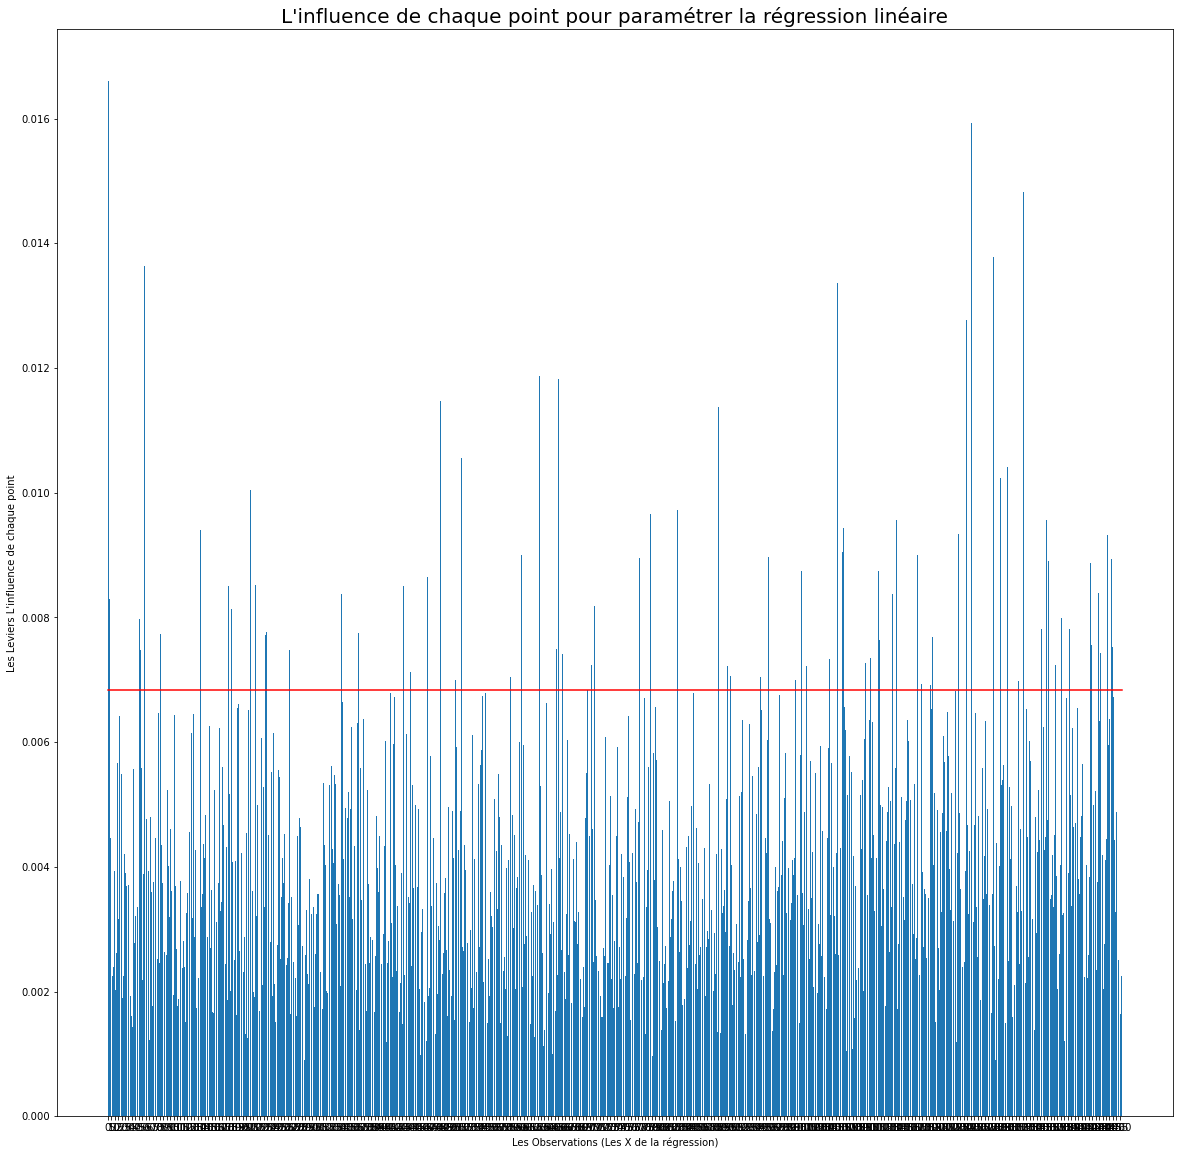

In [92]:

nbre_Obs = n

plt.figure(figsize=(fs,fs))
plt.bar(Analyses['obs'], Analyses['levier'])
plt.xticks(np.arange(0, nbre_Obs, step=5))
plt.xlabel('Les Observations (Les X de la régression)')
plt.ylabel('Les Leviers L\'influence de chaque point')
plt.plot([0, nbre_Obs], [Seuil_levier, Seuil_levier], color='r')
plt.title(label="L'influence de chaque point pour paramétrer la régression linéaire",fontsize= fs)

plt.show()

In [93]:
# Pour calculer les points où les leviers sont supérieurs au seuil

Masque_levier_H = Analyses['levier'] > Seuil_levier

Points_atypiques = Analyses.loc[Masque_levier_H, :]
Points_atypiques

,obs,levier
0,1,0.016606
2,3,0.008298
34,35,0.009156
40,41,0.007671
45,46,0.007977
...,...,...
1431,1432,0.007431
1439,1440,0.007188
1441,1442,0.009325
1447,1448,0.008931


### Calculer les résidus studentisés => pour trouver les points atypiques

In [94]:
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

Analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
Seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

Analyses

,obs,levier,rstudent
0,1,0.016606,-0.563593
1,2,0.006015,-0.769710
2,3,0.008298,0.572488
3,4,0.004467,-1.118681
4,5,0.005558,-1.121058
...,...,...,...
1458,1459,0.004307,-1.608823
1459,1460,0.005672,-0.389864
1460,1461,0.001643,1.269372
1461,1462,0.002254,0.752677


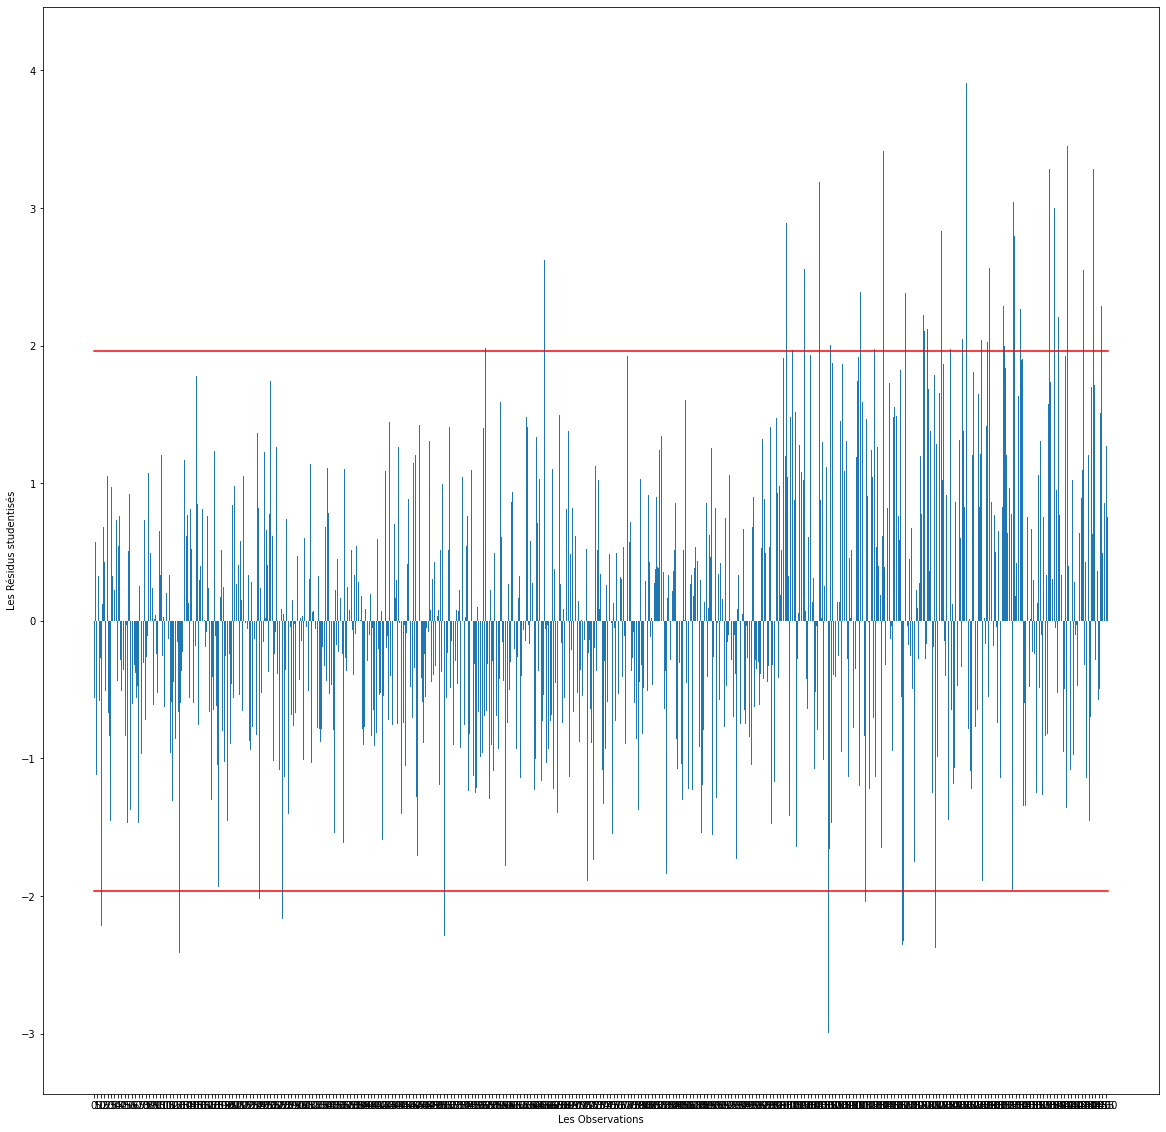

In [95]:
plt.figure(figsize=(fs,fs))

plt.bar(Analyses['obs'], Analyses['rstudent'])
plt.xticks(np.arange(0, n, step=5))
plt.xlabel('Les Observations')
plt.ylabel('Les Résidus studentisés')
plt.plot([0, n], [Seuil_rstudent, Seuil_rstudent], color='r')
plt.plot([0, n], [-Seuil_rstudent, -Seuil_rstudent], color='r')
plt.show()

In [96]:
# Voici les points atiypique avec la méthode des résidus studentisés

Masque1 = Analyses["rstudent"] > Seuil_rstudent
Masque2 = Analyses["rstudent"] > -Seuil_rstudent

Points_atypiques2 = Analyses[Masque1&Masque2]

Points_atypiques2

,obs,levier,rstudent
285,286,0.007106,2.198945
564,565,0.004796,1.979045
649,650,0.011824,2.623086
993,994,0.013583,1.996766
998,999,0.005801,2.892652
1002,1003,0.003121,3.557258
1007,1008,0.007223,1.969796
1012,1013,0.004468,2.935453
1024,1025,0.003077,2.553248
1035,1036,0.002516,2.216523


In [97]:
Points_atypiques2.count()

obs         53
levier      53
rstudent    53
dtype: int64

In [98]:
Points_atypiques.count()

obs       148
levier    148
dtype: int64

In [99]:
# Regardons si les 2 méthodes donnent les mêmes points atiypiques

Test_atypicité_commune = pd.merge(Points_atypiques,Points_atypiques2,on="obs",how="left")

Test_atypicité_commune

,obs,levier_x,levier_y,rstudent
0,1,0.016606,NaN,NaN
1,3,0.008298,NaN,NaN
2,35,0.009156,NaN,NaN
3,41,0.007671,NaN,NaN
4,46,0.007977,NaN,NaN
...,...,...,...,...
143,1432,0.007431,NaN,NaN
144,1440,0.007188,NaN,NaN
145,1442,0.009325,0.009325,3.280337
146,1448,0.008931,NaN,NaN


### La distance de Cook => pour vérifier l'influence de chaque point atypique

In [100]:
Influence = reg_multi.get_influence().summary_frame()

In [101]:
Analyses['dcooks'] = Influence['cooks_d']
Seuil_dcook = 4/(n-p)

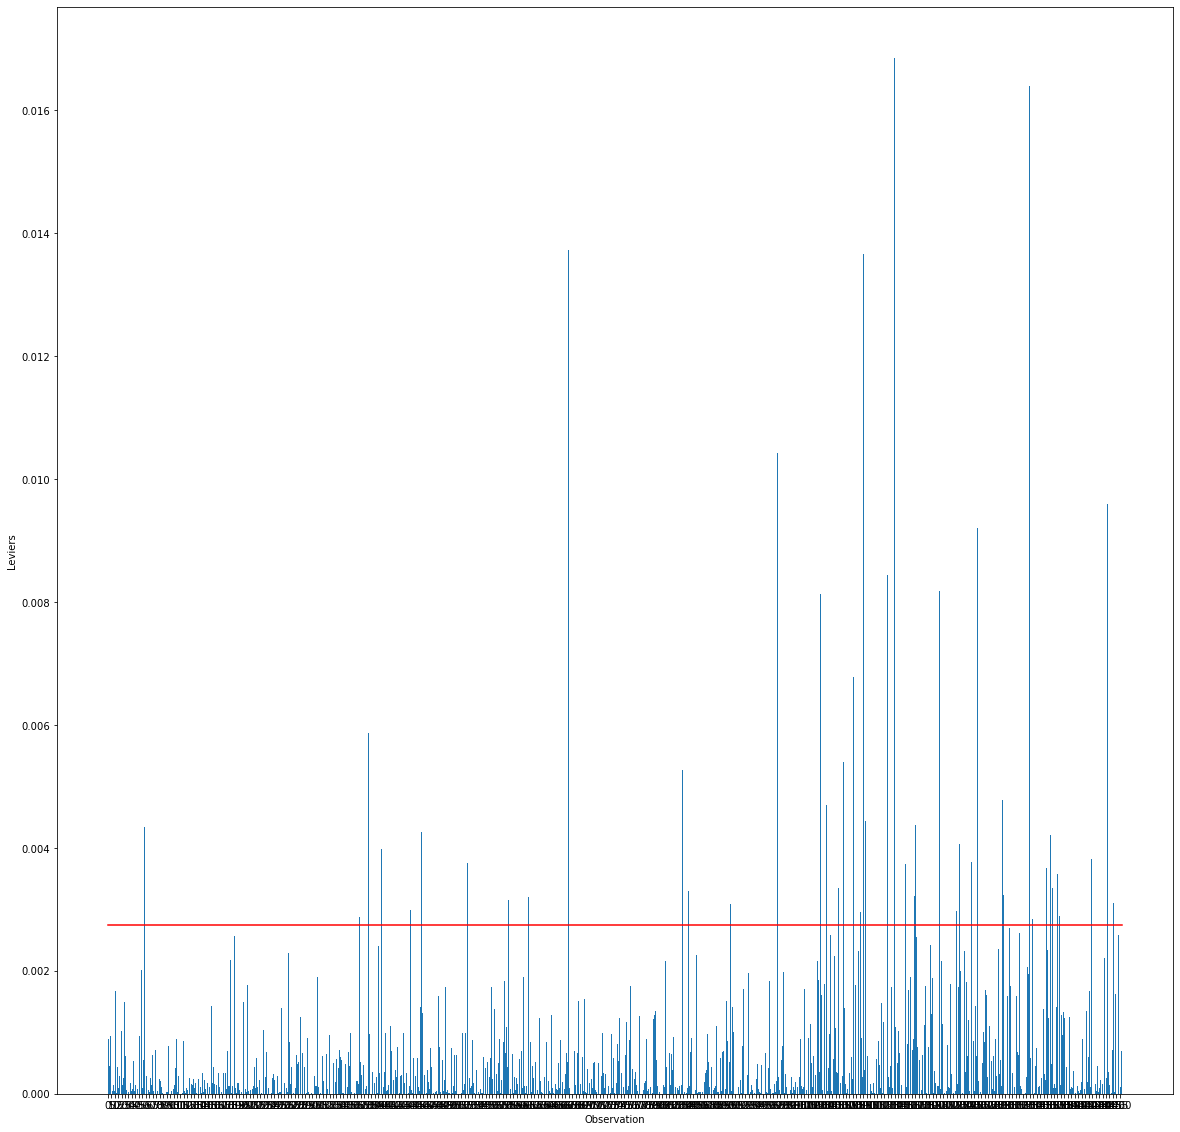

In [102]:
plt.figure(figsize=(fs,fs))
plt.bar(Analyses['obs'], Analyses['dcooks'])
plt.xticks(np.arange(0, n, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n], [Seuil_dcook, Seuil_dcook], color='r')
plt.show()

In [103]:
# Quels sont les points influants

Masque_Cook = Analyses["dcooks"] > Seuil_dcook

Points_influants = Analyses[Masque_Cook]
Points_influants

,obs,levier,rstudent,dcooks
52,53,0.013635,-1.372229,0.004338
80,81,0.003806,0.022997,0.003151
125,126,0.001589,0.172284,0.006308
243,244,0.002601,0.239331,0.004207
292,293,0.002852,0.522537,0.005768
...,...,...,...,...
1420,1421,0.006084,-1.590104,0.005875
1426,1427,0.005088,-1.669093,0.005099
1441,1442,0.009325,3.280337,0.009596
1450,1451,0.006730,-0.493361,0.003099


In [104]:
# Voici les points atypiques

Points_atypiques

,obs,levier
0,1,0.016606
2,3,0.008298
34,35,0.009156
40,41,0.007671
45,46,0.007977
...,...,...
1431,1432,0.007431
1439,1440,0.007188
1441,1442,0.009325
1447,1448,0.008931


In [105]:
# Regardons si les 2 méthodes donnent les mêmes points atypiques et influants

Test_influence_atypicité_commune = pd.merge(Points_influants,Points_atypiques,on="obs",how="inner")

Test_influence_atypicité_commune

,obs,levier_x,rstudent,dcooks,levier_y
0,53,0.013635,-1.372229,0.004338,0.013635
1,368,0.012165,-1.690038,0.002745,0.012165
2,437,0.007127,0.296230,0.002997,0.007127
3,898,0.007055,-1.288743,0.003086,0.007055
4,1023,0.007416,-0.162649,0.009150,0.007416
5,1061,0.009428,-1.660194,0.005401,0.009428
6,1093,0.007263,0.511416,0.004435,0.007263
7,1134,0.009527,-1.652047,0.003908,0.009527
8,1192,0.007463,-1.540357,0.003085,0.007463
9,1245,0.007025,-1.044744,0.003084,0.007025


In [106]:
# J'ai la même chose en utilisant des masques

Points_influants_atypiques = Analyses[Masque_Cook&Masque_levier_H]
Points_influants_atypiques

,obs,levier,rstudent,dcooks
52,53,0.013635,-1.372229,0.004338
367,368,0.012165,-1.690038,0.002745
436,437,0.007127,0.296230,0.002997
897,898,0.007055,-1.288743,0.003086
1022,1023,0.007416,-0.162649,0.009150
1060,1061,0.009428,-1.660194,0.005401
1092,1093,0.007263,0.511416,0.004435
1133,1134,0.009527,-1.652047,0.003908
1191,1192,0.007463,-1.540357,0.003085
1244,1245,0.007025,-1.044744,0.003084


In [107]:
Points_influants_atypiques.count()

obs         16
levier      16
rstudent    16
dcooks      16
dtype: int64

### Vérifions la colinéarité des variables

In [108]:
# Calculons les VIF pour chaque variable

Variables = reg_multi.model.exog
[variance_inflation_factor(Variables, i) for i in np.arange(1,Variables.shape[1])]

[1.0136128990686282,
 1.1382605736082494,
 1.2301145155560378,
 1.4044037781843617,
 1.5769501453665788]

### Testons l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [109]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, Variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.759535216208901e-16


### Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [110]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

## h) Relançons la régression linéaire en enlevant les points atypiques et influants 

In [111]:
# Voici les billets sans les Nan pour rappel

Billet_Regression

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [112]:
# Enlevons les index des billets atypiques et influants

# Je vais filtrer au niveau des index

Points_influants_atypiques


,obs,levier,rstudent,dcooks
52,53,0.013635,-1.372229,0.004338
367,368,0.012165,-1.690038,0.002745
436,437,0.007127,0.296230,0.002997
897,898,0.007055,-1.288743,0.003086
1022,1023,0.007416,-0.162649,0.009150
1060,1061,0.009428,-1.660194,0.005401
1092,1093,0.007263,0.511416,0.004435
1133,1134,0.009527,-1.652047,0.003908
1191,1192,0.007463,-1.540357,0.003085
1244,1245,0.007025,-1.044744,0.003084


In [113]:
Index_points_à_enlever = Points_influants_atypiques.index

In [114]:
Billet_Regression_sans_influants_atypiques = Billet_Regression.drop (index = Index_points_à_enlever)

Billet_Regression_sans_influants_atypiques

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [115]:
# Les X 

Xregression_sans_atypiques_influants = Billet_Regression_sans_influants_atypiques.drop(columns={"is_genuine",'margin_low'})
Xregression_sans_atypiques_influants

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [116]:
Xregression_sans_atypiques_influants.shape

(1447, 5)

In [117]:
Yregression_sans_atypiques_influants = Billet_Regression_sans_influants_atypiques["margin_low"]
Yregression_sans_atypiques_influants

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1447, dtype: float64

In [118]:
Yregression_sans_atypiques_influants.shape

(1447,)

In [119]:
# Y le margin low sans les Nan

Yregression_sans_atypiques_influants2 = np.reshape(Yregression_sans_atypiques_influants.ravel(),(Yregression_sans_atypiques_influants.shape[0],1))

Yregression_sans_atypiques_influants2.shape

(1447, 1)

In [120]:
# Je refais la régression linéaire sans normalisation

from sklearn.linear_model import LinearRegression

model_final_sans_influants_atypiques = LinearRegression()

X = Xregression_sans_atypiques_influants
Y = Yregression_sans_atypiques_influants2

reg_lin_sans_influants_atypiques = model_final_sans_influants_atypiques.fit(X,Y)
score_reg_sans_influants_atypiques = model_final_sans_influants_atypiques.score(X,Y)

print(f"Le modèle linéaire a un coefficient de détermination de {round(score_reg_sans_influants_atypiques,4)} de précision sur tous les Xtrains")

Le modèle linéaire a un coefficient de détermination de 0.482 de précision sur tous les Xtrains


In [121]:
print(f"Le modèle linéaire avant sans enlever les points influants et atypiques avait un coefficient de détermination \nde {round(score_reg_lin_tous_billets,4)} de précision sur tous les Xtrains")

Le modèle linéaire avant sans enlever les points influants et atypiques avait un coefficient de détermination 
de 0.4773 de précision sur tous les Xtrains


### Regardons les variables influentes

In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=Billet_Regression_sans_influants_atypiques).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     268.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          7.66e-203
Time:                        13:58:43   Log-Likelihood:                -959.74
No. Observations:                1447   AIC:                             1931.
Df Residuals:                    1441   BIC:                             1963.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.2441      9.513      2.338   

In [123]:
Var_Pertinentes_Cours = [ 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']

### Regardons les points atypiques

In [124]:
# alpha Le risque de première espèce, n le nombre d'individu sans les Nan et sans les billlets atypiques et influants
# et le p le nombre de variable

alpha = 0.05
n = Billet_Regression_sans_influants_atypiques.shape[0]
p = 5

print(f"La valeur de n vaut {n}")

La valeur de n vaut 1447


In [125]:
Analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

In [126]:
# Les leviers représentent l'influence de chaque point sur la régression linéaire

Analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

# D'après le cours et Belsey

Seuil_levier = 2*p/n


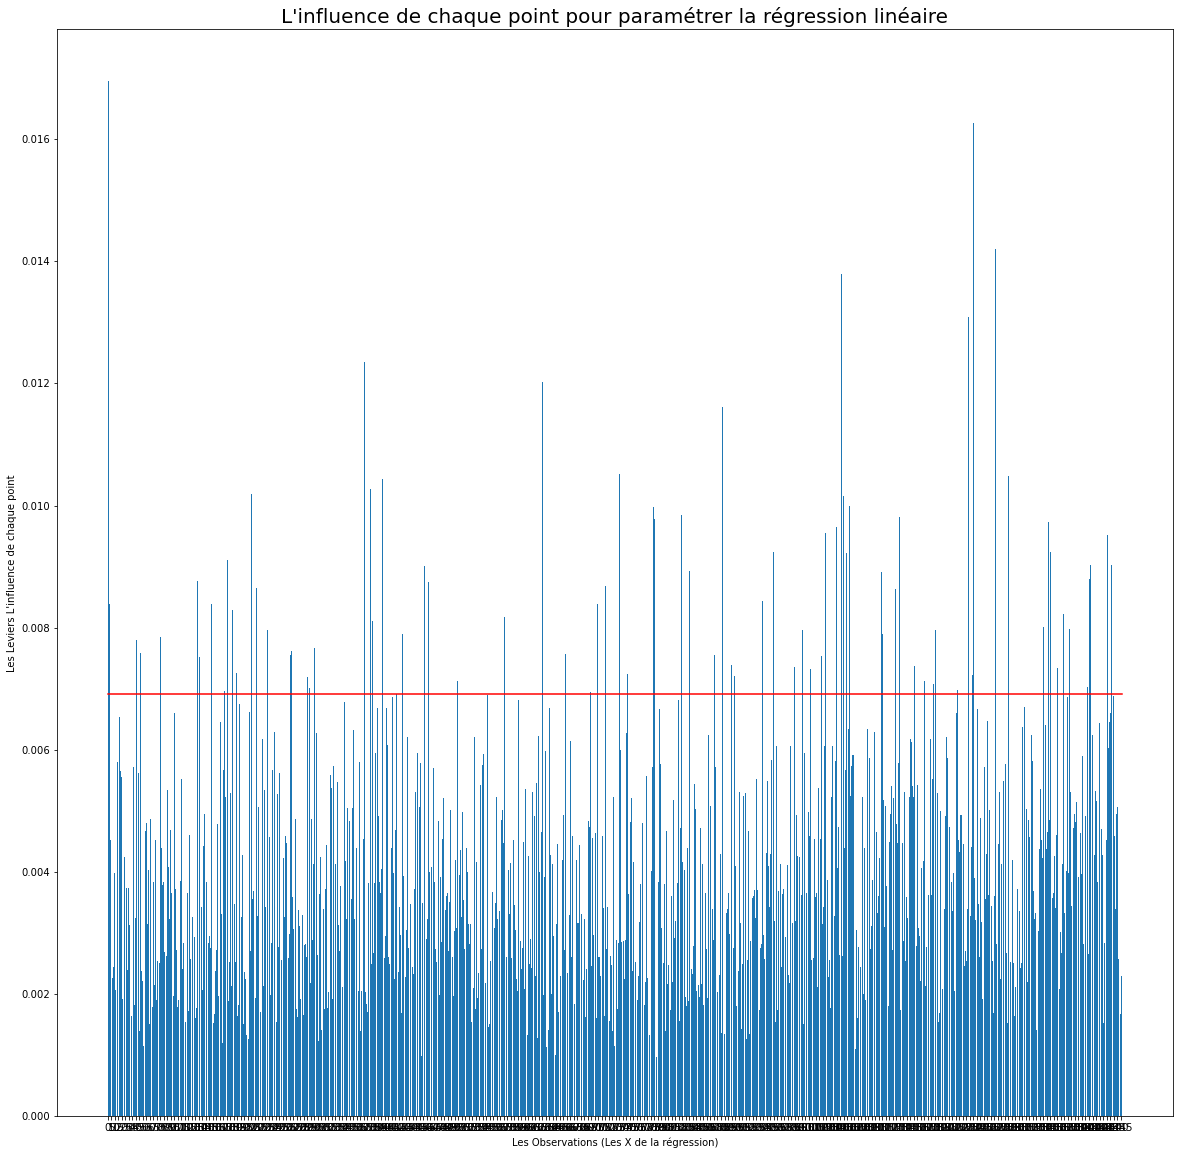

In [127]:

nbre_Obs = n

plt.figure(figsize=(fs,fs))
plt.bar(Analyses['obs'], Analyses['levier'])
plt.xticks(np.arange(0, nbre_Obs, step=5))
plt.xlabel('Les Observations (Les X de la régression)')
plt.ylabel('Les Leviers L\'influence de chaque point')
plt.plot([0, nbre_Obs], [Seuil_levier, Seuil_levier], color='r')
plt.title(label="L'influence de chaque point pour paramétrer la régression linéaire",fontsize= fs)

plt.show()

In [128]:
# Pour calculer les points où les leviers sont supérieurs au seuil

Masque_levier_H = Analyses['levier'] > Seuil_levier

Points_atypiques = Analyses.loc[Masque_levier_H, :]
Points_atypiques

,obs,levier
0,1,0.016953
2,3,0.008391
34,35,0.009324
40,41,0.007797
45,46,0.008141
...,...,...
1415,1416,0.007563
1423,1424,0.007396
1425,1426,0.009512
1431,1432,0.009030


### Calculer les résidus studentisés => pour trouver les points atypiques

In [129]:
Analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
Seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

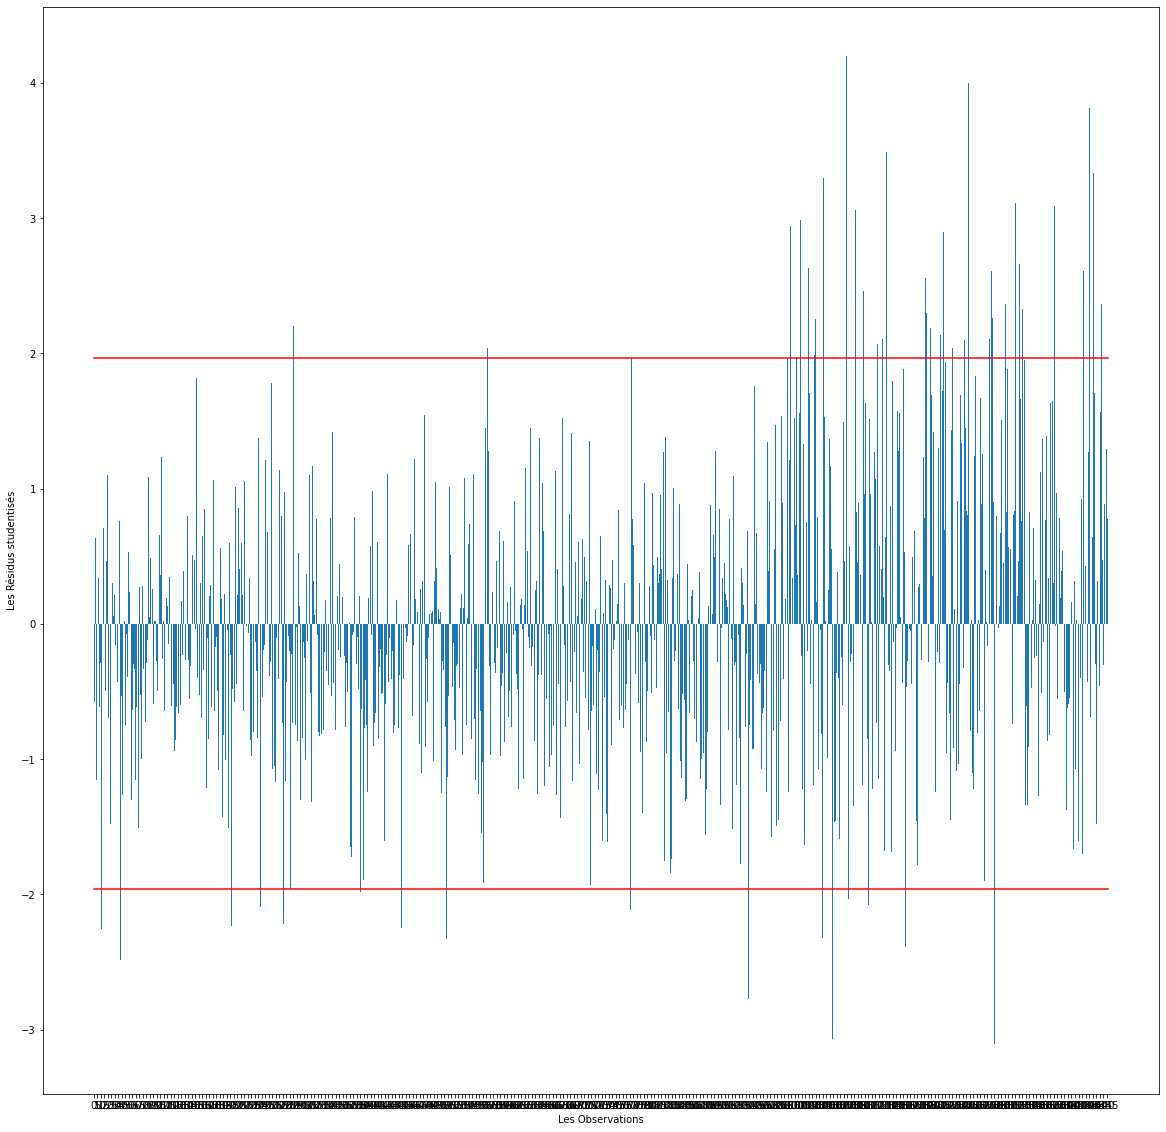

In [130]:
plt.figure(figsize=(fs,fs))

plt.bar(Analyses['obs'], Analyses['rstudent'])
plt.xticks(np.arange(0, n, step=5))
plt.xlabel('Les Observations')
plt.ylabel('Les Résidus studentisés')
plt.plot([0, n], [Seuil_rstudent, Seuil_rstudent], color='r')
plt.plot([0, n], [-Seuil_rstudent, -Seuil_rstudent], color='r')
plt.show()

In [131]:
# Voici les points atiypique avec la méthode des résidus studentisés

Masque1 = Analyses["rstudent"] > Seuil_rstudent
Masque2 = Analyses["rstudent"] > -Seuil_rstudent

Points_atypiques2 = Analyses[Masque1&Masque2]

Points_atypiques2

,obs,levier,rstudent
78,79,0.004999,1.990840
284,285,0.007189,2.202137
561,562,0.004846,2.040054
646,647,0.012103,2.685163
766,767,0.002204,1.962190
993,994,0.005946,2.937581
997,998,0.003188,3.652703
1002,1003,0.007329,1.975913
1007,1008,0.004545,2.986693
1019,1020,0.003142,2.632985


In [132]:
Points_atypiques2.count()

obs         52
levier      52
rstudent    52
dtype: int64

In [133]:
Points_atypiques.count()

obs       145
levier    145
dtype: int64

In [134]:
# Regardons si les 2 méthodes donnent les mêmes points atiypiques

Test_atypicité_commune = pd.merge(Points_atypiques,Points_atypiques2,on="obs",how="left")

Test_atypicité_commune

,obs,levier_x,levier_y,rstudent
0,1,0.016953,NaN,NaN
1,3,0.008391,NaN,NaN
2,35,0.009324,NaN,NaN
3,41,0.007797,NaN,NaN
4,46,0.008141,NaN,NaN
...,...,...,...,...
140,1416,0.007563,NaN,NaN
141,1424,0.007396,NaN,NaN
142,1426,0.009512,0.009512,3.329922
143,1432,0.009030,NaN,NaN


### La distance de Cook => pour vérifier l'influence de chaque point atypique

In [135]:
Influence = reg_multi.get_influence().summary_frame()

In [136]:
Analyses['dcooks'] = Influence['cooks_d']
Seuil_dcook = 4/(n-p)

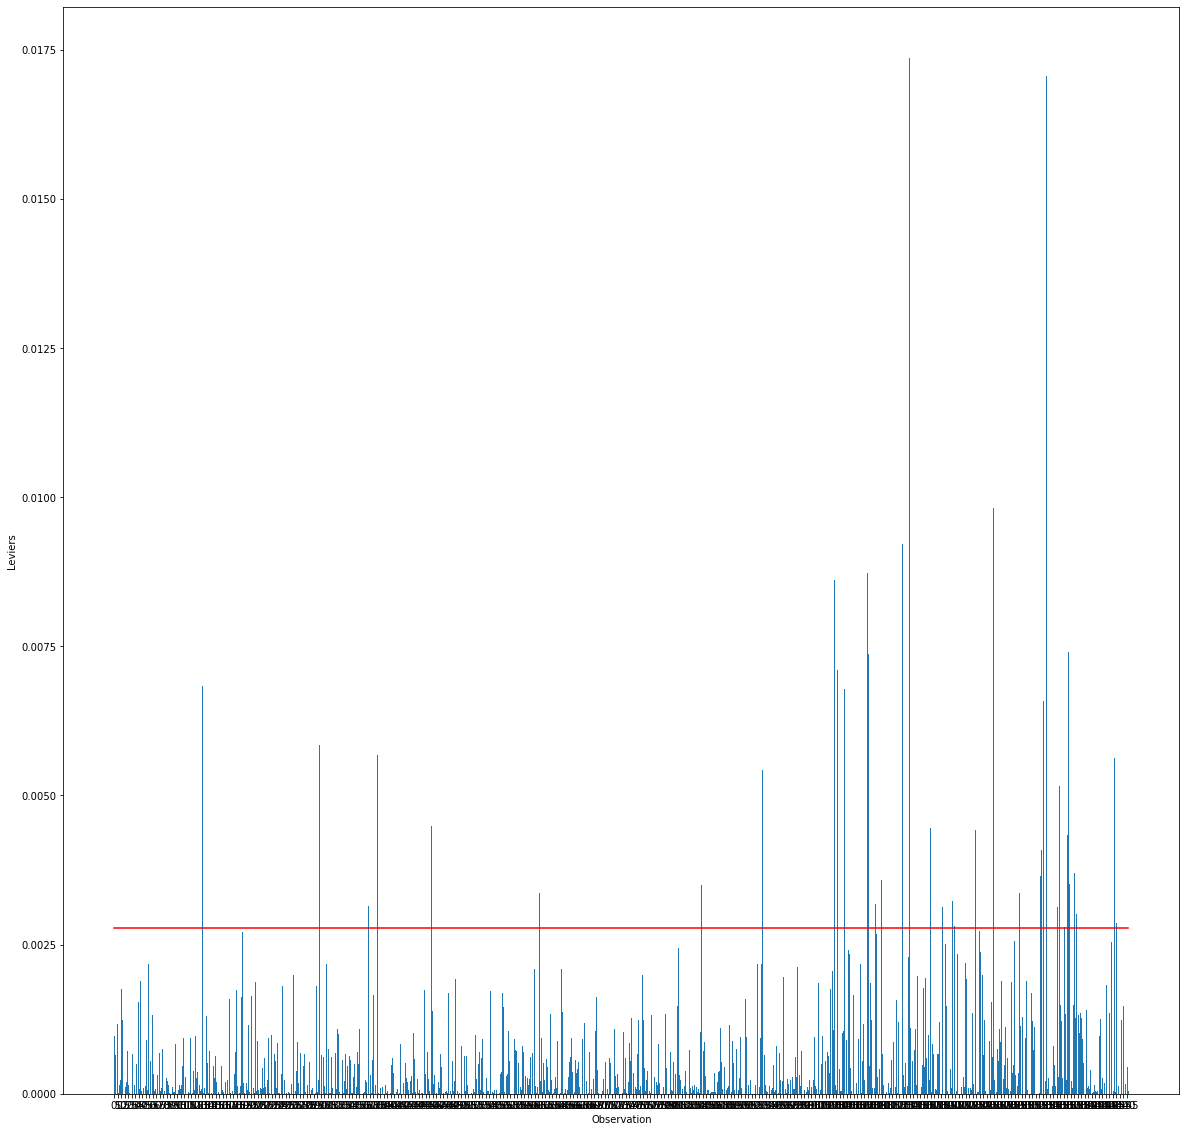

In [137]:
plt.figure(figsize=(fs,fs))
plt.bar(Analyses['obs'], Analyses['dcooks'])
plt.xticks(np.arange(0, n, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n], [Seuil_dcook, Seuil_dcook], color='r')
plt.show()

In [138]:
# Quels sont les points influants

Masque_Cook = Analyses["dcooks"] > Seuil_dcook

Points_influants = Analyses[Masque_Cook]
Points_influants

,obs,levier,rstudent,dcooks
80,81,0.002688,0.488798,0.003319
125,126,0.004382,-0.368800,0.006832
243,244,0.002778,-0.157333,0.004618
292,293,0.003315,0.489537,0.005853
362,363,0.005649,-0.403282,0.003151
...,...,...,...,...
1369,1370,0.008650,-0.964820,0.003700
1372,1373,0.004827,1.773660,0.003011
1420,1421,0.001526,3.811232,0.006350
1426,1427,0.006183,0.214626,0.005627


In [139]:
Points_influants.count()

obs         66
levier      66
rstudent    66
dcooks      66
dtype: int64

In [140]:
# Voici les points atypiques

Points_atypiques

,obs,levier
0,1,0.016953
2,3,0.008391
34,35,0.009324
40,41,0.007797
45,46,0.008141
...,...,...
1415,1416,0.007563
1423,1424,0.007396
1425,1426,0.009512
1431,1432,0.009030


In [141]:
# Regardons si les 2 méthodes donnent les mêmes points atypiques

Test_influence_atypicité_commune = pd.merge(Points_influants,Points_atypiques,on="obs",how="inner")

Test_influence_atypicité_commune

,obs,levier_x,rstudent,dcooks,levier_y
0,578,0.007171,-0.714157,0.003378,0.007171
1,1054,0.009222,-3.065423,0.003642,0.009222
2,1086,0.007412,0.554244,0.003185,0.007412
3,1151,0.007369,0.051989,0.004078,0.007369
4,1165,0.007128,-0.049483,0.004458,0.007128
5,1170,0.007162,-0.848046,0.003537,0.007162
6,1370,0.008650,-0.964820,0.003700,0.008650


In [142]:
# J'ai la même chose en utilisant des masques

Points_influants_atypiques = Analyses[Masque_Cook&Masque_levier_H]
Points_influants_atypiques

,obs,levier,rstudent,dcooks
577,578,0.007171,-0.714157,0.003378
1053,1054,0.009222,-3.065423,0.003642
1085,1086,0.007412,0.554244,0.003185
1150,1151,0.007369,0.051989,0.004078
1164,1165,0.007128,-0.049483,0.004458
1169,1170,0.007162,-0.848046,0.003537
1369,1370,0.008650,-0.964820,0.003700


### Vérifions la colinéarité des variables

In [143]:
# Calculons les VIF pour chaque variable

Variables = reg_multi.model.exog
[variance_inflation_factor(Variables, i) for i in np.arange(1,Variables.shape[1])]

[1.0139269991081987,
 1.1410467304594374,
 1.2299967523692814,
 1.4160573708439357,
 1.587714556345682]

### Testons l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [144]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, Variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 2.981848588585238e-14


### Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [145]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9856278300285339, pvalue=8.522615946304768e-11)

## i) Calculons les Yprédits 

In [146]:
# Voici les coefficients

reg_lin_sans_influants_atypiques.coef_

array([[-0.1125028 ,  0.1616408 ,  0.28126586,  0.26735001, -0.40206545]])

In [147]:
# Pour rappel tous les X pertinents pour prédire Y = margin_low avec les tests statistiques

Xregression

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [148]:
# Voici les prédictions des Xtests (ici des Xregressions car je n'ai plus séparé les Xtrain et les Xtests)

Yprédiction = reg_lin_sans_influants_atypiques.predict(Xregression)

Yprédiction

array([[4.79111547],
       [4.14739527],
       [4.10353991],
       ...,
       [4.90086725],
       [4.80449896],
       [4.83066878]])

In [149]:
# Voici les infos de la régression linéaire avec la méthode du cours

reg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     268.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          7.66e-203
Time:                        13:58:53   Log-Likelihood:                -959.74
No. Observations:                1447   AIC:                             1931.
Df Residuals:                    1441   BIC:                             1963.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.2441      9.513      2.338      0.020       3.584      40.904
diagonal        -0.1125      0.041     -2.754      0.006      -0.193      -0.032
height_left      0.1616      0.044      3.654      0.000       0.075       0.248
height_right     0.2813      0.042      6.637      0.000       0.198       0.364
margin_up        0.2674      0.064      4.185      0.000       0.142       0.393
length          -0.4021      0.018    -22.322      0.000      -0.437      -0.367
==============================================================================
Omnibus:                       75.348   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.517
Skew:                           0.492   Prob(JB):                     4.05e-22
Kurtosis:                       3.815   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
print(f"Le coefficient de détermination de cette méthode de prédiciton est de {reg_multi.rsquared.round(4)}" )

Le coefficient de détermination de cette méthode de prédiciton est de 0.482


In [151]:
# Avec la méthode RFECV voici les résultats

# Pour rappel tous les X pertinents pour prédire Y = margin_low avec les le RFECV

Xregression_var_pertinentes

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,3.09,111.28
1496,172.19,104.63,104.44,3.37,110.97
1497,171.80,104.01,104.12,3.36,111.95
1498,172.06,104.28,104.06,3.46,112.25


In [152]:
# Voici les prédictions des Xtests (ici des Xregressions car je n'ai plus séparé les Xtrain et les Xtests)

Yprédiction_RFECV = reg_lin_tous_billets.predict(Xregression_var_pertinentes)

Yprédiction_RFECV

array([[4.78867649],
       [4.13890773],
       [4.12593262],
       ...,
       [4.90027735],
       [4.80857449],
       [4.83903233]])

In [153]:
print(f"Le coefficient de détermination de cette méthode de prédiciton est de {(score_reg_lin_tous_billets.round(4))}" )

Le coefficient de détermination de cette méthode de prédiciton est de 0.4773


### j) Remplaçons les valeurs manquantes avec les Ypredicts

In [154]:
# Pour remplacer les valeurs manquantes

Masque_Nan = Billet['margin_low'].isna()== True

Billet_Nan = Billet[Masque_Nan]

Billet_Nan.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [155]:
# On ne garde que les variables pertinentes pour le cours

Billet_Nan_2 = Billet_Nan[Var_Pertinentes_Cours]

Billet_Nan_2.head(10)

,diagonal,height_left,height_right,margin_up,length
72,171.94,103.89,103.45,3.25,112.79
99,171.93,104.07,104.18,3.14,113.08
151,172.07,103.80,104.38,3.02,112.93
197,171.45,103.66,103.80,3.62,113.27
241,171.83,104.14,104.06,3.02,112.36
251,171.80,103.26,102.82,2.95,113.22
284,171.92,103.83,103.76,3.23,113.29
334,171.85,103.70,103.96,3.00,113.36
410,172.56,103.72,103.51,3.12,112.95
413,172.30,103.66,103.50,3.16,112.95


In [156]:
Margin_low_Nan = reg_lin_sans_influants_atypiques.predict(Billet_Nan_2).round(2)

Margin_low_Nan

array([[4.31],
       [4.4 ],
       [4.42],
       [4.33],
       [4.65],
       [3.79],
       [4.18],
       [4.14],
       [4.13],
       [4.16],
       [4.15],
       [3.78],
       [4.07],
       [4.3 ],
       [4.15],
       [4.09],
       [4.44],
       [4.47],
       [4.34],
       [4.08],
       [3.62],
       [4.38],
       [4.09],
       [4.25],
       [3.9 ],
       [3.74],
       [4.23],
       [4.73],
       [4.13],
       [5.05],
       [4.8 ],
       [5.05],
       [5.02],
       [4.78],
       [5.71],
       [5.18],
       [5.13]])

In [157]:
Billet_Nan_3 = Billet_Nan_2.copy()

Billet_Nan_3["margin_low"] = Margin_low_Nan

Billet_Nan_3

,diagonal,height_left,height_right,margin_up,length,margin_low
72,171.94,103.89,103.45,3.25,112.79,4.31
99,171.93,104.07,104.18,3.14,113.08,4.40
151,172.07,103.80,104.38,3.02,112.93,4.42
197,171.45,103.66,103.80,3.62,113.27,4.33
241,171.83,104.14,104.06,3.02,112.36,4.65
251,171.80,103.26,102.82,2.95,113.22,3.79
284,171.92,103.83,103.76,3.23,113.29,4.18
334,171.85,103.70,103.96,3.00,113.36,4.14
410,172.56,103.72,103.51,3.12,112.95,4.13
413,172.30,103.66,103.50,3.16,112.95,4.16


In [158]:
# Pour rappel

Billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [159]:
Billet_Nan_Ok = pd.merge(Billet,Billet_Nan_3, on = Var_Pertinentes_Cours, how='left')

Billet_Nan_Ok

,is_genuine,diagonal,height_left,height_right,margin_low_x,margin_up,length,margin_low_y
0,True,171.81,104.86,104.95,4.52,2.89,112.83,NaN
1,True,171.46,103.36,103.66,3.77,2.99,113.09,NaN
2,True,172.69,104.48,103.50,4.40,2.94,113.16,NaN
3,True,171.36,103.91,103.94,3.62,3.01,113.51,NaN
4,True,171.73,104.28,103.46,4.04,3.48,112.54,NaN
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,NaN
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,NaN
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,NaN
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,NaN


In [160]:
Test_Nan(Billet_Nan_Ok)

ATTENTION Il y a des Nan dans le dataframe testé !!!
Au total en supprimant les lignes avec Nan on va supprimer 1500 lignes sur 1500 lignes au total 
soit 0.0 % de lignes conservées
Il y a au total 0 Nan sur la 1 ème colonne 'is_genuine'
Il y a au total 0 Nan sur la 2 ème colonne 'diagonal'
Il y a au total 0 Nan sur la 3 ème colonne 'height_left'
Il y a au total 0 Nan sur la 4 ème colonne 'height_right'
Il y a au total 37 Nan sur la 5 ème colonne 'margin_low_x'
Il y a au total 0 Nan sur la 6 ème colonne 'margin_up'
Il y a au total 0 Nan sur la 7 ème colonne 'length'
Il y a au total 1463 Nan sur la 8 ème colonne 'margin_low_y'


In [161]:
Billet_Nan_Ok.fillna(0, inplace= True)

Billet_Nan_Ok["margin_low"] = Billet_Nan_Ok["margin_low_x"] + Billet_Nan_Ok["margin_low_y"]

Billet_Nan_Ok

,is_genuine,diagonal,height_left,height_right,margin_low_x,margin_up,length,margin_low_y,margin_low
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0.0,4.52
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0.0,3.77
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0.0,4.40
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0.0,3.62
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0.0,4.04
...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0.0,4.42
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0.0,5.27
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0.0,5.51
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0.0,5.17


In [162]:
Billet_Nan_Ok = Billet_Nan_Ok.drop(columns=["margin_low_x","margin_low_y"])

Billet_Nan_Ok

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28,4.42
1496,False,172.19,104.63,104.44,3.37,110.97,5.27
1497,False,171.80,104.01,104.12,3.36,111.95,5.51
1498,False,172.06,104.28,104.06,3.46,112.25,5.17


In [163]:
# j'enlève les doublons

Billet_Nan_Ok.drop_duplicates()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28,4.42
1496,False,172.19,104.63,104.44,3.37,110.97,5.27
1497,False,171.80,104.01,104.12,3.36,111.95,5.51
1498,False,172.06,104.28,104.06,3.46,112.25,5.17


In [164]:
# Définition une fonction qui va nous calculer la prédiction des Margin_low suivant les autres dimensions du billet
# Puis les remplace dans le dataframe

def Regression_linéaire_Margin_Low(Billet):
      
    # Je prends les Nan dans mon dataframe Billet
    
    Masque_Nan = Billet['margin_low'].isna()== True

    Billet_Nan = Billet[Masque_Nan]
    
    # Je prends les bonnes colonnes pour utiliser ma prédiction dans mon modèle
    
    Billet_Nan_2 = Billet_Nan[Var_Pertinentes_Cours]
    
    # Voici la prédiction des valeurs Nan
    
    Margin_low_Nan = reg_lin_sans_influants_atypiques.predict(Billet_Nan_2).round(2)

    # Je remplace les Nan par les valeurs prédites
    
    Billet_Nan_3 = Billet_Nan_2.copy()

    Billet_Nan_3["margin_low"] = Margin_low_Nan
    
    # Je vais retourner mon dataframe de départ avec les bonnes valeurs de Nan remplacées
    
    Billet_Nan_Ok = pd.merge(Billet,Billet_Nan_3, on = Var_Pertinentes_Cours, how='left')

    Billet_Nan_Ok.fillna(0, inplace= True)

    Billet_Nan_Ok["margin_low"] = Billet_Nan_Ok["margin_low_x"] + Billet_Nan_Ok["margin_low_y"]

    Billet_Nan_Ok = Billet_Nan_Ok.drop(columns=["margin_low_x","margin_low_y"])
    
    Billet_Nan_OK_Final = Billet_Nan_Ok.drop_duplicates()
    
    Test_Nan(Billet_Nan_OK_Final)
    
    return Billet_Nan_OK_Final

In [165]:
# ça marche

Billet_Nan_OK = Regression_linéaire_Margin_Low(Billet)

Billet_Nan_OK

Il n'y a pas de Nan dans le dataframe testé et il y 1500 lignes au total


,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28,4.42
1496,False,172.19,104.63,104.44,3.37,110.97,5.27
1497,False,171.80,104.01,104.12,3.36,111.95,5.51
1498,False,172.06,104.28,104.06,3.46,112.25,5.17


In [166]:
Test_Nan(Billet_Nan_OK)

Il n'y a pas de Nan dans le dataframe testé et il y 1500 lignes au total


In [167]:
Temps_fin_regression_linéaire = time.time()


# IV) Préparons les données pour le problème de classification

## a) Encodons la variable is_genuine

In [168]:
# On va créer une colonne avec des valeurs 0 ou 1 pour les vrais et les faux billets
# Car on a besoin de chiffres pour utiliser les algorithmes et faire des calculs


Billet_Nan_OK["is_genuine"].replace([True,False],[1,0],inplace=True)

Billet_Nan_OK

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,1,171.81,104.86,104.95,2.89,112.83,4.52
1,1,171.46,103.36,103.66,2.99,113.09,3.77
2,1,172.69,104.48,103.50,2.94,113.16,4.40
3,1,171.36,103.91,103.94,3.01,113.51,3.62
4,1,171.73,104.28,103.46,3.48,112.54,4.04
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,3.09,111.28,4.42
1496,0,172.19,104.63,104.44,3.37,110.97,5.27
1497,0,171.80,104.01,104.12,3.36,111.95,5.51
1498,0,172.06,104.28,104.06,3.46,112.25,5.17


In [169]:
Billet_Nan_OK.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up',
       'length', 'margin_low'],
      dtype='object')

In [170]:
Test_Nan(Billet_Nan_OK)

Il n'y a pas de Nan dans le dataframe testé et il y 1500 lignes au total


In [171]:
# Je réordonne pour mettre dans le bon ordre pour le fichier test à la fin

Billet_Nan_OK = Billet_Nan_OK[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length']]

## b) Préparons les données pour la classification

In [172]:
Yclassification = Billet_Nan_OK["is_genuine"]

Xclassification = Billet_Nan_OK.drop("is_genuine",axis=1)

In [173]:
Yclassification

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

In [174]:
Yclassification.shape

(1500,)

In [175]:
Yclassification2 = np.reshape(Yclassification.ravel(),(Yclassification.shape[0],1))

In [176]:
Yclassification2.shape

(1500, 1)

In [177]:
Xclassification

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [178]:
Xclassification.shape

(1500, 6)

## c) Training set et Testing set

In [179]:
# je vais séparer mes données entre un training set et un testing set

# Pour améliorer mon modèle et que mon modèle ne soit pas trop dépendant des données

from sklearn.model_selection import train_test_split

# je mets 80 % des données dans le training test et 20 % dans le testing set pour évaluer mon modèle avec des données 
# qu'il n'a jamais vu

Xtrain_class, Xtest_class, Ytrain_class, Ytest_class = train_test_split(Xclassification,Yclassification2, test_size= 0.2) 

print(f"Il y a {round((Xtrain_class.shape[0]*100)/((Xregression.shape[0])),2)} % des valeurs dans le training set")


Il y a 82.02 % des valeurs dans le training set


## d) Normalisons les données

In [180]:
# On normalise les données X (Xtrain et Xtest) pour améliorer la rapidité de convergence des modèles

# J'utilise le MinMax Scaler du dernier projet qui fonctionnait bien

from sklearn.preprocessing import MinMaxScaler

scaler_MinMax = MinMaxScaler()

Xtrain_class_normalized = scaler_MinMax.fit_transform(Xtrain_class,Ytrain_class)

Xtest_class_normalized = scaler_MinMax.transform(Xtest_class)


# V) La classification avec le Kmeans

## a) Entrainement du modèle

In [181]:
# On a 2 clusters: Les vrais et les faux billets

from sklearn.cluster import KMeans

n=2

model = KMeans(n_clusters= n)

model.fit(Xtrain_class_normalized,Ytrain_class.ravel())

score = model.score(Xtest_class_normalized,Ytest_class.ravel())

print(f"L'inertie du modèle est {round(score,2)} avec le testing set avec nombre de cluster de {n}")

L'inertie du modèle est -30.97 avec le testing set avec nombre de cluster de 2


## b) Améliorons le modèle avec une validation croisée 

In [182]:
# Je vais créer plusieurs pipeline et ensuite
# Je vais utiliser la fonction GridsearchCv qui va me permettre d'optimiser mon algorithme de Kmeans 
# et de faire une cross validation

# Je vais ainsi pouvoir comparer les inerties de mes pipelines et de voir laquelle a le meilleur score

# Je sais qu'il y a 2 clusters car il y a les vrais et les faux billets

n=2

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

model_pipeline_STD_kmeans = make_pipeline(StandardScaler(),KMeans(n_clusters=n)) 
model_pipeline_Robust_kmeans = make_pipeline(RobustScaler(),KMeans(n_clusters=n)) 
model_pipeline_MinMax_kmeans = make_pipeline(MinMaxScaler(),KMeans(n_clusters=n)) 
model_pipeline_Poly_kmeans = make_pipeline(PolynomialFeatures(),KMeans(n_clusters=n)) 


In [183]:
# je peux faire un fit et trouver un score d'inertie

model_pipeline_STD_kmeans.fit(Xtrain_class,Ytrain_class)
model_pipeline_STD_kmeans.score(Xtest_class,Ytest_class)

-1183.2421591193686

In [184]:
# je peux faire un fit et trouver un score d'inertie

model_pipeline_Robust_kmeans.fit(Xtrain_class,Ytrain_class)
model_pipeline_Robust_kmeans.score(Xtest_class,Ytest_class)

-626.9003466795025

In [185]:
# je peux faire un fit et trouver un score d'inertie

model_pipeline_MinMax_kmeans.fit(Xtrain_class,Ytrain_class)
model_pipeline_MinMax_kmeans.score(Xtest_class,Ytest_class)

-30.971275485359676

In [186]:
# je peux faire un fit et trouver un score d'inertie

model_pipeline_Poly_kmeans.fit(Xtrain_class,Ytrain_class)
model_pipeline_Poly_kmeans.score(Xtest_class,Ytest_class)

-19653251.650893707

In [187]:
# Voici ces paramètres

model_pipeline_MinMax_kmeans.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=2))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'kmeans': KMeans(n_clusters=2),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'kmeans__algorithm': 'auto',
 'kmeans__copy_x': True,
 'kmeans__init': 'k-means++',
 'kmeans__max_iter': 300,
 'kmeans__n_clusters': 2,
 'kmeans__n_init': 10,
 'kmeans__random_state': None,
 'kmeans__tol': 0.0001,
 'kmeans__verbose': 0}

In [188]:
# Je vais utiliser la fonction Gridsearch Cv pour améliorer le modèle et faire une crossvalidation
# Je prends toujours 5 découpage pour la crossvalidation

Nbre_découpage = 5

# J'ai essayé de prendre les paramètres les plus intéressants en fixant le nombre de cluster à 2

param_grid = {'n_clusters':np.arange(2,3),
             'init':['k-means++', 'random'],
             'algorithm':['auto', 'full', 'elkan']}

Grid = GridSearchCV(KMeans(), param_grid,cv = Nbre_découpage)

In [189]:
Grid.fit(Xtrain_class,Ytrain_class)

C:\Users\soumi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\soumi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\soumi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\soumi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'n_clusters': array([2])})

In [190]:
Grid.best_estimator_

KMeans(n_clusters=2)

In [191]:
Grid.best_params_

{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 2}

In [192]:
# Je reprends ma pipeline en mettant les bons paramètres
# je peux faire un fit et trouver un score d'inertie

# On normalise les données X (Xtrain et Xtest) pour améliorer la rapidité de convergence des modèles

scaler = MinMaxScaler()

Xtrain_class_MinMax = scaler.fit_transform(Xtrain_class,Ytrain_class)

Xtest_class_MinMax = scaler.transform(Xtest_class)

# On a 2 clusters: Les vraiss et les faux billets

model_kmeans = Grid.best_estimator_

model_kmeans.fit(Xtrain_class_MinMax,Ytrain_class.ravel())

score = model_kmeans.score(Xtest_class_MinMax,Ytest_class.ravel())

print(f"L'inertie du modèle est {round(score,2)} avec le testing set avec nombre de cluster de {n}")


L'inertie du modèle est -30.97 avec le testing set avec nombre de cluster de 2


## c) Learning Curve

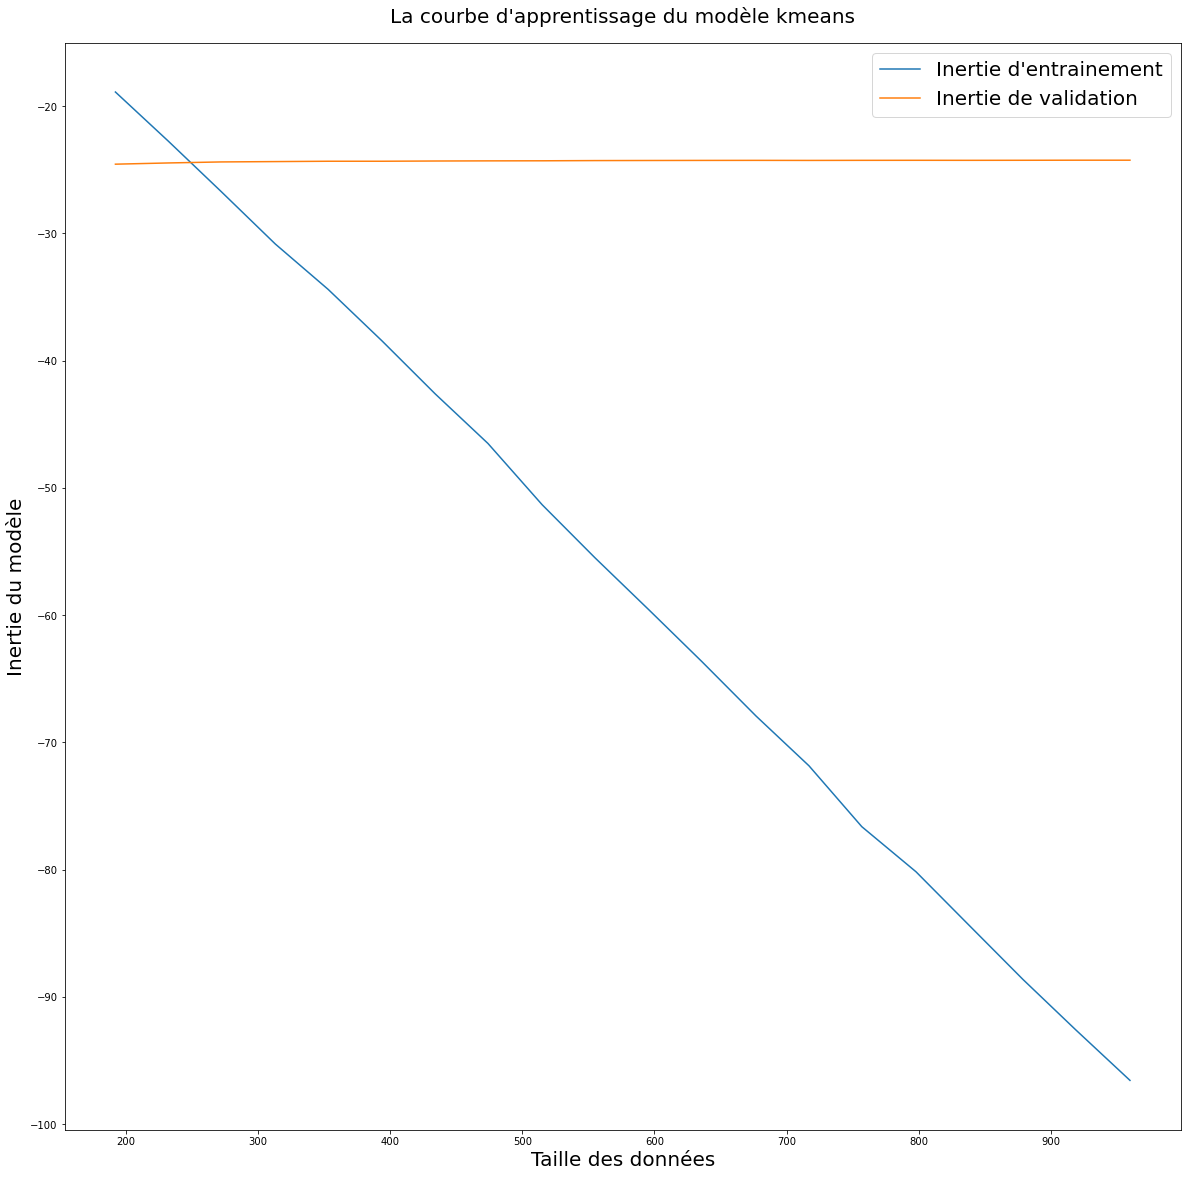

In [193]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

Nbre_découpage = 5

N,train_score_lc_kmeans, validation_score_lc_kmeans = learning_curve(model_kmeans,Xtrain_class_normalized,Ytrain_class.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,train_score_lc_kmeans.mean(axis=1),label='Inertie d\'entrainement')
plt.plot(N,validation_score_lc_kmeans.mean(axis=1),label='Inertie de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Inertie du modèle",fontsize=fs)
plt.title(label="La courbe d'apprentissage du modèle kmeans",fontsize=fs,pad = fs)
plt.legend(fontsize=fs)

# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_classification_kmeans.png")
plt.show()


## c) La matrice de confusion

In [194]:
from sklearn.metrics import confusion_matrix

# On va tester tous les Ytest en les comparant avec la prédiction de notre modèle

Matrice_conf_k_means = confusion_matrix(Ytest_class,model_kmeans.predict(Xtest_class_MinMax))
Matrice_conf_k_means

array([[ 93,   1],
       [  1, 205]], dtype=int64)

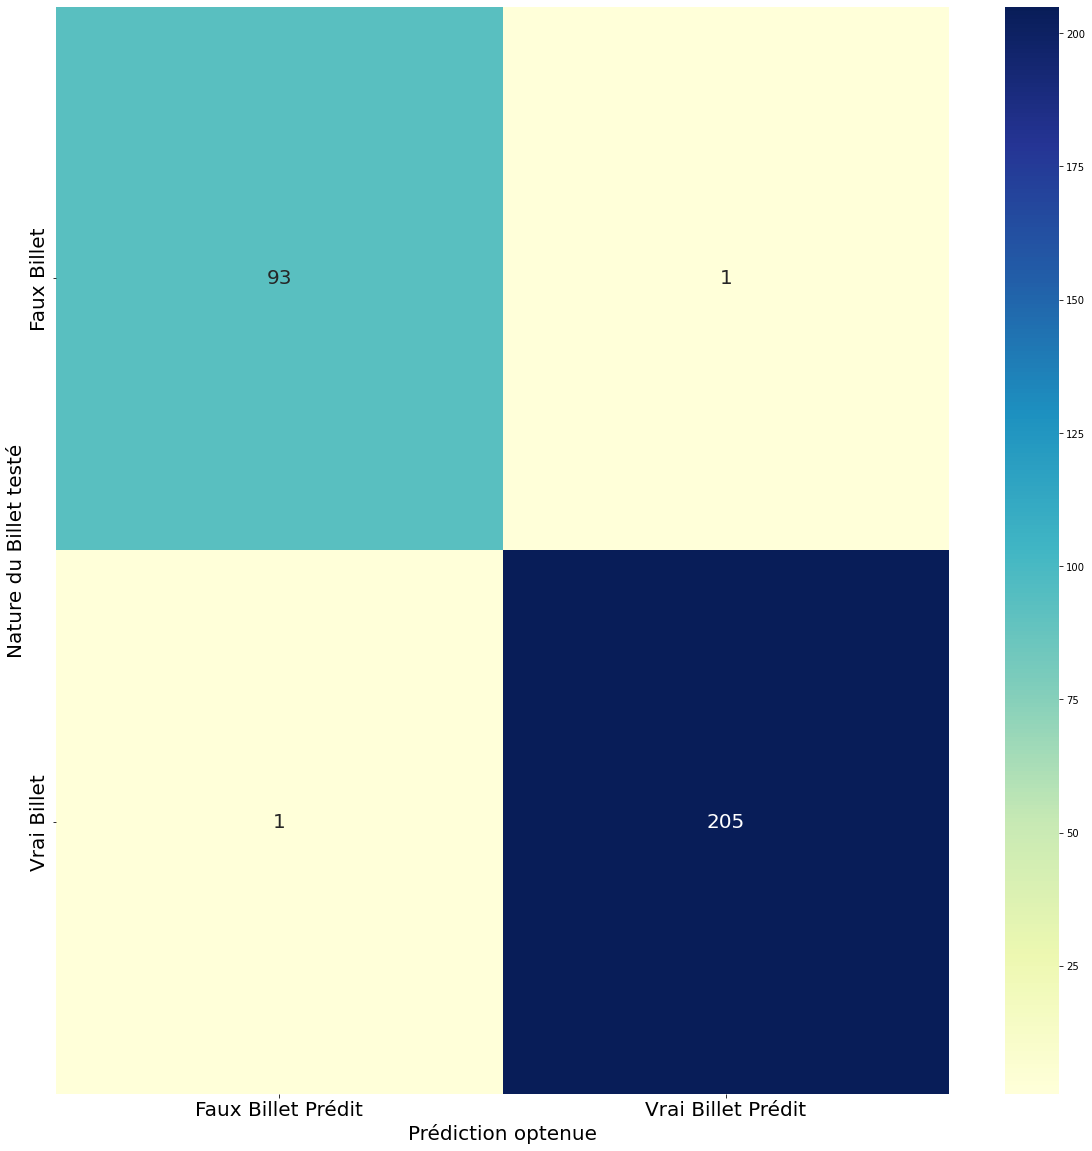

In [195]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Je prends les données intéressantes + pour tracer la matrice de confusion avec les bonnes colonnes et lignes

l1_somme = Matrice_conf_k_means[0,0]+ Matrice_conf_k_means[0,1] 
l2_somme = Matrice_conf_k_means[1,0]+ Matrice_conf_k_means[1,1] 
c1_somme = Matrice_conf_k_means[0,0]+ Matrice_conf_k_means[1,0] 
c2_somme = Matrice_conf_k_means[0,1]+ Matrice_conf_k_means[1,1]

Test_pour_matrice_conf_k_means = Matrice_conf_k_means[0,0]

# La ligne qui a la plus grande somme représente les vrais billets l'autre les faux billets

if l1_somme > l2_somme:
    row = ["Vrai Billet","Faux Billet"]
    if Test_pour_matrice_conf_k_means > Matrice_conf_k_means[0,1]:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux_k_means = Matrice_conf_k_means[0,1]
        Vrai_Vrai_k_means = Matrice_conf_k_means[0,0]
        Faux_Vrai_k_means = Matrice_conf_k_means[1,0]
        Faux_Faux_k_means = Matrice_conf_k_means[1,1]
    else:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux_k_means = Matrice_conf_k_means[0,0]
        Vrai_Vrai_k_means = Matrice_conf_k_means[0,1]
        Faux_Vrai_k_means = Matrice_conf_k_means[1,1]
        Faux_Faux_k_means = Matrice_conf_k_means[1,0]
else: 
    
    row = ["Faux Billet","Vrai Billet"]
    if Test_pour_matrice_conf_k_means > Matrice_conf_k_means[0,1]:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux_k_means = Matrice_conf_k_means[1,0]
        Vrai_Vrai_k_means = Matrice_conf_k_means[1,1]
        Faux_Vrai_k_means = Matrice_conf_k_means[0,1]
        Faux_Faux_k_means = Matrice_conf_k_means[0,0]
    else:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux_k_means = Matrice_conf_k_means[1,1]
        Vrai_Vrai_k_means = Matrice_conf_k_means[1,0]
        Faux_Vrai_k_means = Matrice_conf_k_means[0,0]
        Faux_Faux_k_means = Matrice_conf_k_means[0,1]

# Traçons la matrice de confusion

sns.heatmap(Matrice_conf_k_means,annot=True, cmap = "YlGnBu",fmt="d",annot_kws={"fontsize":fs}
            ,xticklabels=col,yticklabels=row)
plt.xlabel("Prédiction optenue",fontsize= fs)
plt.ylabel("Nature du Billet testé",fontsize= fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

# Pour sauvegarder les figures

plt.savefig("P10_Matrice_confusion_kMeans.png")
plt.show()

In [196]:
# Je crée une fonction qui permettra de décrire une matrice de confusion avec tous ces indicateurs:

# Pour une matrice 2 lignes 2 colonnes

def Info_matrice_confusion(Matrice):
    
    if Matrice.shape == (2,2):
    
        # Je prends les données intéressantes

        l1_somme = Matrice[0,0]+ Matrice[0,1] 
        l2_somme = Matrice[1,0]+ Matrice[1,1] 
        c1_somme = Matrice[0,0]+ Matrice[1,0] 
        c2_somme = Matrice[0,1]+ Matrice[1,1]
        
        Total = l1_somme + l2_somme

        Test_pour_matrice_conf = Matrice[0,0]

        # La ligne qui a la plus grande somme représente les vrais billets l'autre les faux billets

        if l1_somme > l2_somme:
            row = ["Vrai Billet","Faux Billet"]
            if Test_pour_matrice_conf > Matrice_conf[0,1]:
                col = ["Vrai Billet Prédit","Faux Billet Prédit"]
                Vrai_Faux = Matrice[0,1]
                Vrai_Vrai = Matrice[0,0]
                Faux_Vrai = Matrice[1,0]
                Faux_Faux = Matrice[1,1]
            else:
                col = ["Faux Billet Prédit","Vrai Billet Prédit"]
                Vrai_Faux = Matrice[0,0]
                Vrai_Vrai = Matrice[0,1]
                Faux_Vrai = Matrice[1,1]
                Faux_Faux = Matrice[1,0]
        else: 

            row = ["Faux Billet","Vrai Billet"]
            if Test_pour_matrice_conf > Matrice[0,1]:
                col = ["Faux Billet Prédit","Vrai Billet Prédit"]
                Vrai_Faux = Matrice[1,0]
                Vrai_Vrai = Matrice[1,1]
                Faux_Vrai = Matrice[0,1]
                Faux_Faux = Matrice[0,0]
            else:
                col = ["Vrai Billet Prédit","Faux Billet Prédit"]
                Vrai_Faux = Matrice[1,1]
                Vrai_Vrai = Matrice[1,0]
                Faux_Vrai = Matrice[0,0]
                Faux_Faux = Matrice[0,1]
         
        # Les mesures pour évaluer la matrice de confusion
        
        # True Positive ou Vrai positif cad la prédiction est positive "vraie" et la réalité vrai
        
        TP = Vrai_Vrai
        
        # True Negative cad la prédiction est négative "fausse"  et la réalité fausse
        
        TN = Faux_Faux
        
        # False Positive cad la prédiction est positive "vrai"  or la réalité est fausse
        
        FP = Faux_Vrai
        
        # False Negative cad la prédiction est négative "fausse"  or la réalité Vrai
        
        FN = Vrai_Faux
        
        # Accuracy : Les bonnes prédictions
        
        Accuracy = (TP + TN)/Total
        
        # Le taux d'erreur
        
        Missclassification_rate = (FP + FN)/Total
        
        # La précision: mesure parmi toutes les prédiction positives combien on en a prédit des bonnes
        
        Precision = TP/(TP+FP)
        
        # Le rappel / La sensivité: Parmis toutes les données positives  combien furent bien prédites
        
        Recall = TP / (FN+TP)
        
        # La prévalence: Combien de fois les données vrais apparaissent dans notre échantillon
        
        Prevalence = (FN+TP)/Total
        
        # Le score F1
        
        F1 = 2*(Recall * Precision)/(Recall + Precision)
        
        # False Positive Rate : quand on a prédit Oui combien de fois s'est on trompé ? cad les données sont fausses combien de fois prédit-on oui ?
        
        FPR = FP / (FP + FN)
        
        print(f"La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de {round(Accuracy*100,2)} %") 
        print(f"et une précision de {round(Precision*100,2)} % (Bonne prédiciton positive parmi les prédicitons +)")
        print(f"et un recall de {round(Recall*100,2)} % (Bonne prédiciton positive parmi les données +)")
        print(f"et un score F1 de {round(F1*100,2)} % ")
    
    else:print(f"La matrice de confusion n'est pas de taille (2,2)")

In [197]:
# Cela marche

Info_matrice_confusion(Matrice_conf_k_means)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.33 %
et une précision de 99.51 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.51 % 


## e) Conclusion sur le kmeans

In [198]:
Temps_fin_kmeans = time.time()


# VI) La classification en utilisant la régression logistique

## a) Entrainement du modèle

In [199]:
# Pour rappel en ayant fait plus haut la séparation du training set et du testing set

Ytrain_class

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [200]:
# Les X à utiliser

Xtrain_class

,diagonal,height_left,height_right,margin_low,margin_up,length
625,172.05,103.42,104.10,4.45,2.99,112.67
1029,171.96,104.29,104.03,6.01,3.91,110.83
1420,171.56,104.47,104.04,6.38,3.43,112.12
136,172.06,104.19,103.59,4.39,3.22,113.69
564,172.00,104.10,104.36,3.83,2.92,113.00
...,...,...,...,...,...,...
364,172.29,103.83,103.25,3.62,2.99,113.13
493,172.55,103.97,104.04,4.25,3.34,113.36
614,172.40,103.86,103.88,3.87,2.97,113.49
1192,171.95,104.08,104.08,5.66,3.32,110.93


In [201]:
# On avait déjà normalisé les Xtrain avec un MinMax scaler

Xtrain_class_normalized

array([[0.51269036, 0.16091954, 0.60093897, 0.39516129, 0.43902439,
        0.6075388 ],
       [0.46700508, 0.66091954, 0.56807512, 0.81451613, 1.        ,
        0.19955654],
       [0.26395939, 0.76436782, 0.57276995, 0.91397849, 0.70731707,
        0.48558758],
       ...,
       [0.69035533, 0.4137931 , 0.49765258, 0.23924731, 0.42682927,
        0.78935698],
       [0.46192893, 0.54022989, 0.5915493 , 0.72043011, 0.6402439 ,
        0.22172949],
       [0.42639594, 0.44827586, 0.43192488, 0.27956989, 0.54878049,
        0.84922395]])

In [202]:
# Le Xtest aussi

Xtest_class_normalized

array([[0.63451777, 0.27011494, 0.76056338, 0.41935484, 0.25609756,
        0.78713969],
       [0.49746193, 0.62643678, 0.67605634, 0.52150538, 0.37804878,
        0.78935698],
       [0.5177665 , 0.61494253, 0.49765258, 0.44354839, 0.57926829,
        0.83592018],
       ...,
       [0.32994924, 0.44252874, 0.20657277, 0.28494624, 0.57926829,
        0.80487805],
       [0.42639594, 0.57471264, 0.75117371, 0.3655914 , 0.55487805,
        0.32150776],
       [0.8071066 , 0.56896552, 0.63380282, 0.21236559, 0.7195122 ,
        0.75609756]])

In [203]:
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LogisticRegressionCV

# Avec Cv cela n'améliore pas vraiment le modèle et surtout je perds 30 secondes sur l'éxécution du script

model_reg_log = LogisticRegression()

# Nbre_découpage = 20

#model_reg_log = LogisticRegressionCV(cv=Nbre_découpage)

reg_logistique = model_reg_log.fit(Xtrain_class_normalized,Ytrain_class.ravel())

score_reg_logistique = model_reg_log.score(Xtest_class_normalized,Ytest_class)

print(f"Le score de ce modèle est de {score_reg_logistique.round(4)*100} % de précision sur le testing set")

Le score de ce modèle est de 99.0 % de précision sur le testing set


### Je sélectionne les variables pertinentes

In [204]:
# Cela va sélectionner les variables de la régression logistique de manière récursive en utilisant la cross validation

# Cross validation découpage par 20

selector = RFECV(LogisticRegression(),step=1,min_features_to_select=2,cv = 20)

selector.fit(Xtrain_class_normalized,Ytrain_class.ravel())
selector.ranking_

array([2, 1, 1, 1, 1, 1])

In [205]:
# Pour prendre de manière automatique la bonne colonne

Variable_importantes_Reg_Log = []
a = selector.get_support()


for i in range(len(a)):
    if a[i] == True:
        Variable_importantes_Reg_Log.append(Xtrain_class.columns[i])
    Xtrain_class_variables_importantes = Xtrain_class[Variable_importantes_Reg_Log]
    Xtest_class_variables_importantes = Xtest_class[Variable_importantes_Reg_Log]

In [206]:
Xtrain_class

,diagonal,height_left,height_right,margin_low,margin_up,length
625,172.05,103.42,104.10,4.45,2.99,112.67
1029,171.96,104.29,104.03,6.01,3.91,110.83
1420,171.56,104.47,104.04,6.38,3.43,112.12
136,172.06,104.19,103.59,4.39,3.22,113.69
564,172.00,104.10,104.36,3.83,2.92,113.00
...,...,...,...,...,...,...
364,172.29,103.83,103.25,3.62,2.99,113.13
493,172.55,103.97,104.04,4.25,3.34,113.36
614,172.40,103.86,103.88,3.87,2.97,113.49
1192,171.95,104.08,104.08,5.66,3.32,110.93


In [207]:
Xtrain_class_variables_importantes

,height_left,height_right,margin_low,margin_up,length
625,103.42,104.10,4.45,2.99,112.67
1029,104.29,104.03,6.01,3.91,110.83
1420,104.47,104.04,6.38,3.43,112.12
136,104.19,103.59,4.39,3.22,113.69
564,104.10,104.36,3.83,2.92,113.00
...,...,...,...,...,...
364,103.83,103.25,3.62,2.99,113.13
493,103.97,104.04,4.25,3.34,113.36
614,103.86,103.88,3.87,2.97,113.49
1192,104.08,104.08,5.66,3.32,110.93


In [208]:
Xtest_class_variables_importantes

,height_left,height_right,margin_low,margin_up,length
34,103.61,104.44,4.54,2.69,113.48
687,104.23,104.26,4.92,2.89,113.49
271,104.21,103.88,4.63,3.22,113.70
419,103.97,103.96,4.12,3.32,113.43
866,103.76,103.59,3.82,3.17,112.77
...,...,...,...,...,...
314,104.16,104.18,4.03,3.08,112.65
582,103.99,104.22,3.61,2.91,113.39
768,103.91,103.26,4.04,3.22,113.56
1215,104.14,104.42,4.34,3.18,111.38


In [209]:
print(f"A priori seulement {Xtest_class_variables_importantes.columns.size} variables sont nécessaires pour une régression logistique pertinentes sur les 6 variables présentent au début")

A priori seulement 5 variables sont nécessaires pour une régression logistique pertinentes sur les 6 variables présentent au début


In [210]:
# je normalise les données

scaler_Min_Max_Var_import_Class = MinMaxScaler()

Xtrain_regression_que_variable_pertinente_Min_Max = scaler_Min_Max_Var_import_Class.fit_transform(Xtrain_class_variables_importantes,Ytrain_class)

Xtrain_regression_que_variable_pertinente_Min_Max

array([[0.16091954, 0.60093897, 0.39516129, 0.43902439, 0.6075388 ],
       [0.66091954, 0.56807512, 0.81451613, 1.        , 0.19955654],
       [0.76436782, 0.57276995, 0.91397849, 0.70731707, 0.48558758],
       ...,
       [0.4137931 , 0.49765258, 0.23924731, 0.42682927, 0.78935698],
       [0.54022989, 0.5915493 , 0.72043011, 0.6402439 , 0.22172949],
       [0.44827586, 0.43192488, 0.27956989, 0.54878049, 0.84922395]])

In [211]:
Xtest_class_MinMax_var_importante = scaler_Min_Max_Var_import_Class.transform(Xtest_class_variables_importantes)

In [212]:

# Avec Cv cela n'améliore pas vraiment le modèle et surtout je perds 30 secondes sur l'éxécution du script

model_reg_log_var_importantes = LogisticRegression()

# Nbre_découpage = 20

#model_reg_log = LogisticRegressionCV(cv=Nbre_découpage)

reg_logistique_var_importante = model_reg_log_var_importantes.fit(Xtrain_regression_que_variable_pertinente_Min_Max,Ytrain_class.ravel())

score_reg_logistique_var_importantes = model_reg_log_var_importantes.score(Xtest_class_MinMax_var_importante,Ytest_class)

print(f"Le score de ce modèle est de {score_reg_logistique_var_importantes.round(4)*100} % de précision sur le testing set")

Le score de ce modèle est de 99.0 % de précision sur le testing set


In [213]:
print(f"pour rappel le score la régression logistique avec toutes les variables était de {score_reg_logistique.round(4)*100} % de précision sur le testing set")

pour rappel le score la régression logistique avec toutes les variables était de 99.0 % de précision sur le testing set


## b) Les tests statistiques

In [214]:
Billet_Nan_OK

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [215]:
# pour vérifier si les variables sont importantes mais là c'est sans validation croisées:

import statsmodels
from functions import *

columns = ['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length']

reg_backward = backward_selected(Billet_Nan_OK[columns], 'is_genuine')

_______________________________
is_genuine ~ height_right + margin_low + height_left + diagonal + margin_up + length + 1
is the final model !

                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:59:10   Log-Likelihood:                 378.53
No. Observations:                1500   AIC:                            -743.1
Df Residuals:                    1493   BIC:                            -705.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.02

In [216]:
reg_log1 = smf.glm('is_genuine ~ diagonal + height_left + height_right + margin_low + margin_up + length' , data=Billet_Nan_OK).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1493
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                        0.035511
Method:                          IRLS   Log-Likelihood:                 378.53
Date:                Tue, 26 Apr 2022   Deviance:                       53.018
Time:                        13:59:10   Pearson chi2:                     53.0
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.4801      3.749     -3.329   

In [217]:
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]
beta3 = reg_log1.params[2]
beta4 = reg_log1.params[3]
beta5 = reg_log1.params[4]
beta6 = reg_log1.params[5]
beta7 = reg_log1.params[6]

La courbe de la régression logistique correspond à cette fonction:

<br><br><center><font size="4">$f(x) = \frac{e^{\beta_{1}+\beta_{2}x1+\beta_{3}x2+\beta_{4}x3+\beta_{5}x4+\beta_{6}x5+\beta_{7}x6}}{1+e^{\beta_{1}+\beta_{2}x1+\beta_{3}x2+\beta_{4}x3+\beta_{5}x4+\beta_{6}x5+\beta_{7}x6}}$</font></center>

Nous plaçons ces ordonnées dans la variable y. Enfin, avec x et y, nous créons un dataframe :

In [218]:
Billet_Nan_OK.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [219]:

x1 = Billet_Nan_OK[Billet_Nan_OK.columns[1]]
x2 = Billet_Nan_OK[Billet_Nan_OK.columns[2]]
x3 = Billet_Nan_OK[Billet_Nan_OK.columns[3]]
x4 = Billet_Nan_OK[Billet_Nan_OK.columns[4]]
x5 = Billet_Nan_OK[Billet_Nan_OK.columns[5]]
x6 = Billet_Nan_OK[Billet_Nan_OK.columns[6]]

Beta = beta1 + beta2*x1 + beta3*x2 + beta4*x3 + beta5*x4 + beta6*x5+ beta7*x6


In [220]:

y = np.exp(Beta)/(1+np.exp(Beta))

reg_log_test_statistique = pd.DataFrame(data={Billet_Nan_OK.columns[1]: x1,
                                              Billet_Nan_OK.columns[2]: x2,
                                              Billet_Nan_OK.columns[3]: x3,
                                              Billet_Nan_OK.columns[4]: x4,
                                              Billet_Nan_OK.columns[5]: x5,
                                              Billet_Nan_OK.columns[6]: x6,
                                              'Prédiction_proba_Vrai_Billets': y}).round(2)

In [221]:
reg_log_test_statistique

,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction_proba_Vrai_Billets
0,171.81,104.86,104.95,4.52,2.89,112.83,0.64
1,171.46,103.36,103.66,3.77,2.99,113.09,0.74
2,172.69,104.48,103.50,4.40,2.94,113.16,0.72
3,171.36,103.91,103.94,3.62,3.01,113.51,0.75
4,171.73,104.28,103.46,4.04,3.48,112.54,0.66
...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,0.56
1496,172.19,104.63,104.44,5.27,3.37,110.97,0.46
1497,171.80,104.01,104.12,5.51,3.36,111.95,0.53
1498,172.06,104.28,104.06,5.17,3.46,112.25,0.56


<AxesSubplot:>

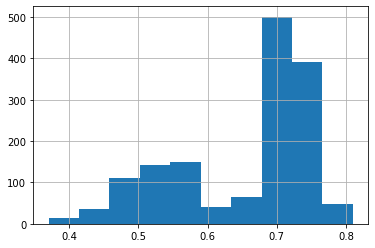

In [222]:
reg_log_test_statistique['Prédiction_proba_Vrai_Billets'].hist()

In [223]:
# pour tester les variables pertinentes trouvées par validation croisées

reg_log2_var_pertinentes = smf.glm('is_genuine ~  margin_low + margin_up + length' , data=Billet_Nan_OK).fit()

print(reg_log2_var_pertinentes.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1496
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                        0.038260
Method:                          IRLS   Log-Likelihood:                 321.11
Date:                Tue, 26 Apr 2022   Deviance:                       57.236
Time:                        13:59:10   Pearson chi2:                     57.2
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.1992      0.994    -28.379      0.0

## c) Courbe d'apprentissage

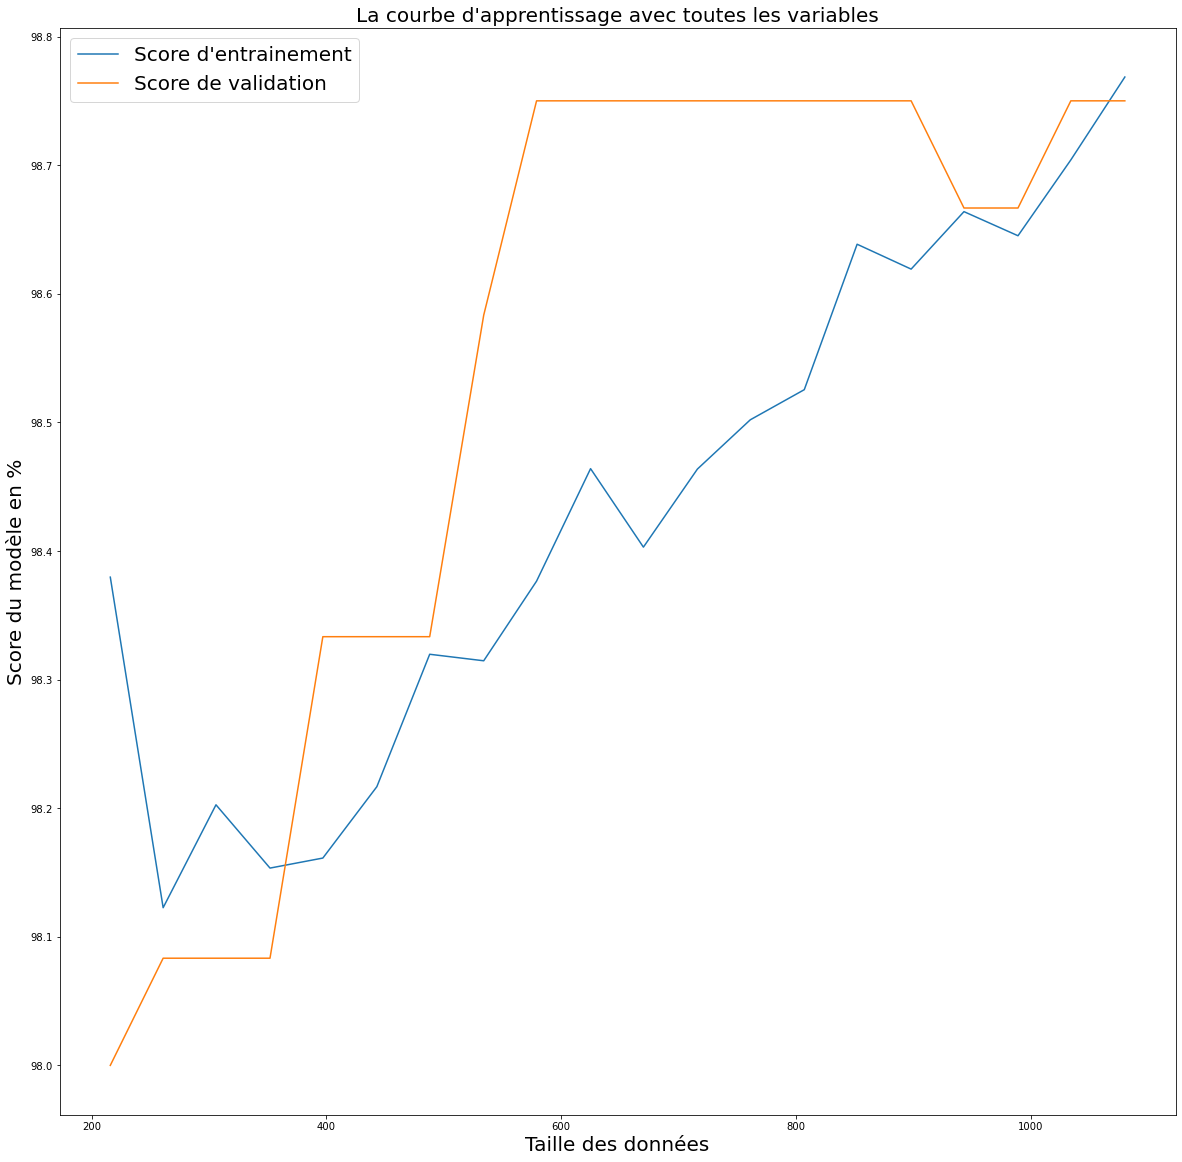

In [224]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

Nbre_découpage = 10

N,train_score_lc_k_nei, validation_score_lc_knei = learning_curve(model_reg_log,Xtrain_class_normalized,Ytrain_class.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_k_nei.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_knei.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle en %",fontsize=fs)
plt.legend(fontsize=fs)
plt.title(label="La courbe d'apprentissage avec toutes les variables",fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_classification_reg_logistique.png")
plt.show()


C:\Users\soumi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soumi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

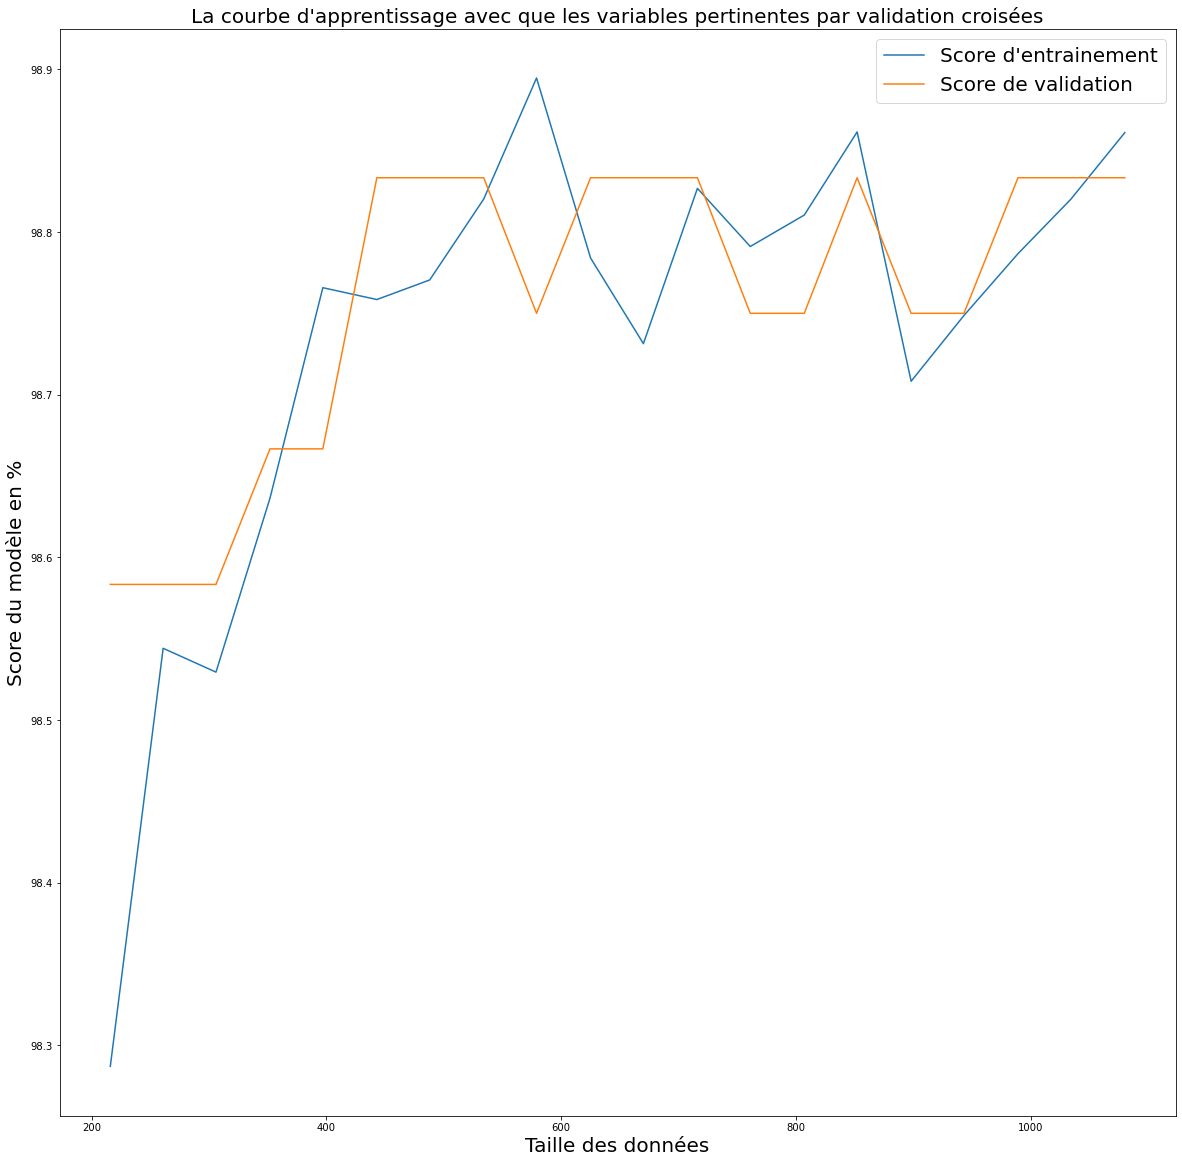

In [225]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

Nbre_découpage = 10

N,train_score_lc_k_nei, validation_score_lc_knei = learning_curve(model_reg_log_var_importantes,Xtrain_class_variables_importantes,Ytrain_class.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_k_nei.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_knei.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle en %",fontsize=fs)
plt.legend(fontsize=fs)
plt.title(label="La courbe d'apprentissage avec que les variables pertinentes par validation croisées",fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_classification_reg_logistique_var_pertinentes.png")
plt.show()


## d) La matrice de confusion

### Pour la régresion logistique avec toutes les variables

In [226]:
# On va tester tous les Ytest en les comparant avec la prédiction de notre modèle

Matrice_conf_reg_logistique = confusion_matrix(Ytest_class,model_reg_log.predict(Xtest_class_normalized))
Matrice_conf_reg_logistique

array([[ 92,   2],
       [  1, 205]], dtype=int64)

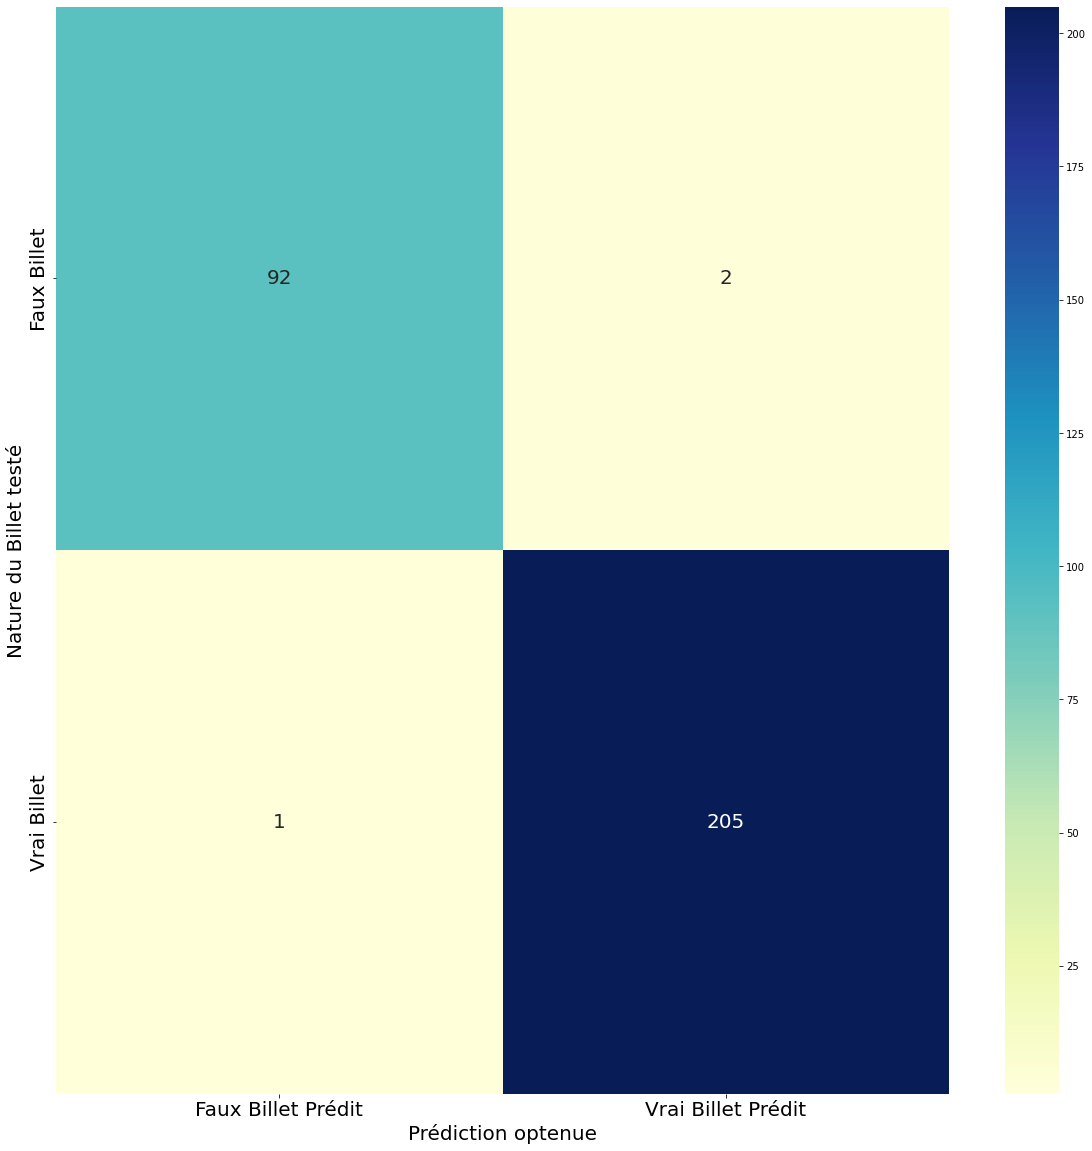

In [227]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))


# Je prends les données intéressantes

Matrice = Matrice_conf_reg_logistique

l1_somme = Matrice[0,0]+ Matrice[0,1] 
l2_somme = Matrice[1,0]+ Matrice[1,1] 
c1_somme = Matrice[0,0]+ Matrice[1,0] 
c2_somme = Matrice[0,1]+ Matrice[1,1]

Total = l1_somme + l2_somme

Test_pour_matrice_conf = Matrice[0,0]

# La ligne qui a la plus grande somme représente les vrais billets l'autre les faux billets

if l1_somme > l2_somme:
    row = ["Vrai Billet","Faux Billet"]
    if Test_pour_matrice_conf > Matrice_conf[0,1]:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[0,1]
        Vrai_Vrai = Matrice[0,0]
        Faux_Vrai = Matrice[1,0]
        Faux_Faux = Matrice[1,1]
    else:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[0,0]
        Vrai_Vrai = Matrice[0,1]
        Faux_Vrai = Matrice[1,1]
        Faux_Faux = Matrice[1,0]
else: 

    row = ["Faux Billet","Vrai Billet"]
    if Test_pour_matrice_conf > Matrice[0,1]:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[1,0]
        Vrai_Vrai = Matrice[1,1]
        Faux_Vrai = Matrice[0,1]
        Faux_Faux = Matrice[0,0]
    else:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[1,1]
        Vrai_Vrai = Matrice[1,0]
        Faux_Vrai = Matrice[0,0]
        Faux_Faux = Matrice[0,1]

# Traçons la matrice de confusion

sns.heatmap(Matrice,annot=True, cmap = "YlGnBu",fmt="d",annot_kws={"fontsize":fs}
            ,xticklabels=col,yticklabels=row)
plt.xlabel("Prédiction optenue",fontsize= fs)
plt.ylabel("Nature du Billet testé",fontsize= fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

# Pour sauvegarder les figures

plt.savefig("P10_Matrice_confusion_reg_logistique.png")
plt.show()

In [228]:
Info_matrice_confusion(Matrice_conf_reg_logistique)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


### Pour la régresion logistique avec les variables pertinentes de la validation croisées

In [229]:
# On va tester tous les Ytest en les comparant avec la prédiction de notre modèle

Matrice_conf_reg_logistique_var_pertinentes = confusion_matrix(Ytest_class,model_reg_log_var_importantes.predict(Xtest_class_MinMax_var_importante))
Matrice_conf_reg_logistique_var_pertinentes

array([[ 92,   2],
       [  1, 205]], dtype=int64)

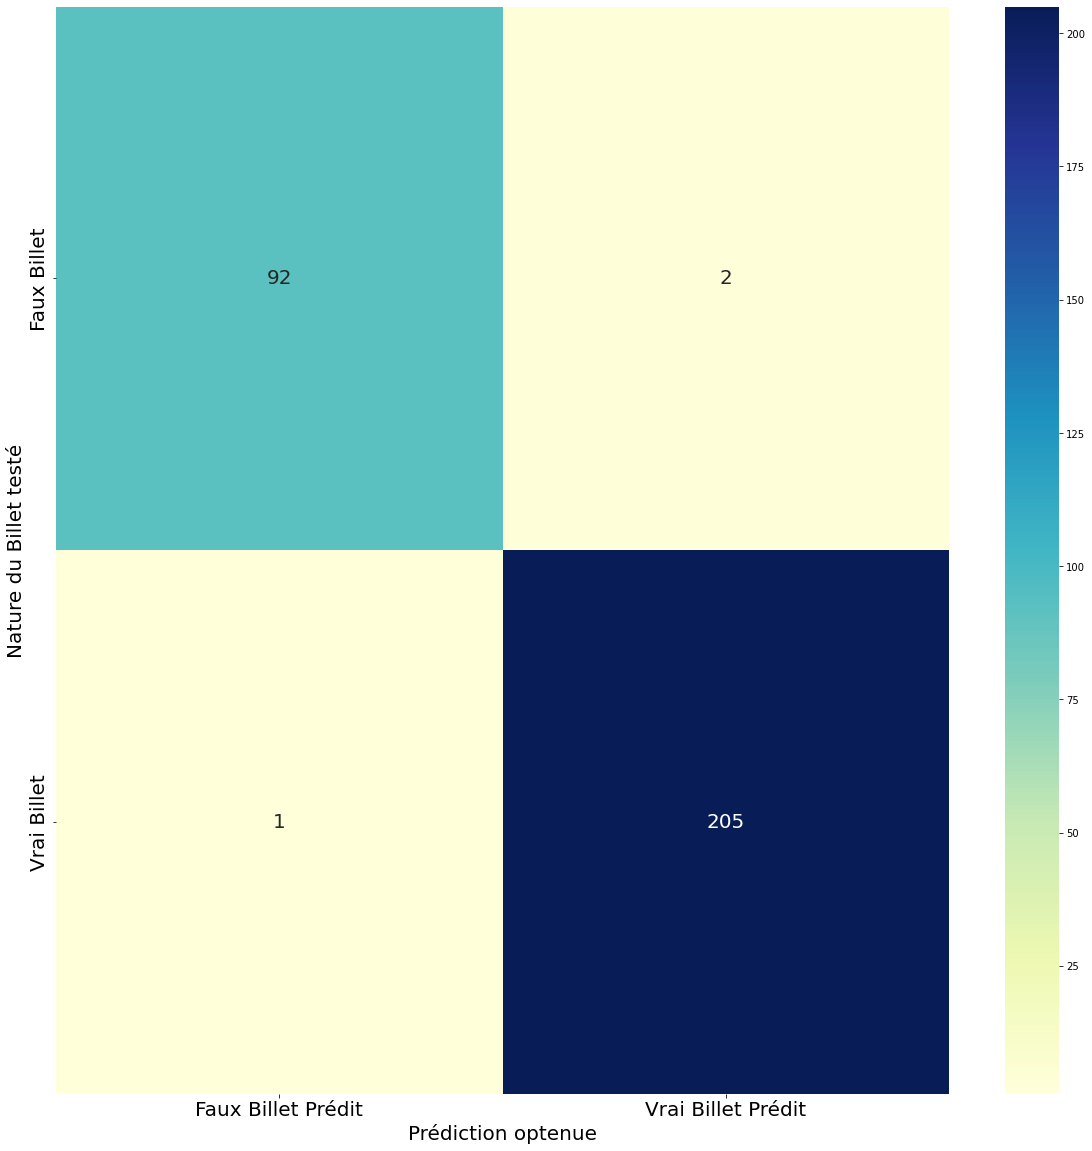

In [230]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))


# Je prends les données intéressantes

Matrice = Matrice_conf_reg_logistique_var_pertinentes

l1_somme = Matrice[0,0]+ Matrice[0,1] 
l2_somme = Matrice[1,0]+ Matrice[1,1] 
c1_somme = Matrice[0,0]+ Matrice[1,0] 
c2_somme = Matrice[0,1]+ Matrice[1,1]

Total = l1_somme + l2_somme

Test_pour_matrice_conf = Matrice[0,0]

# La ligne qui a la plus grande somme représente les vrais billets l'autre les faux billets

if l1_somme > l2_somme:
    row = ["Vrai Billet","Faux Billet"]
    if Test_pour_matrice_conf > Matrice_conf[0,1]:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[0,1]
        Vrai_Vrai = Matrice[0,0]
        Faux_Vrai = Matrice[1,0]
        Faux_Faux = Matrice[1,1]
    else:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[0,0]
        Vrai_Vrai = Matrice[0,1]
        Faux_Vrai = Matrice[1,1]
        Faux_Faux = Matrice[1,0]
else: 

    row = ["Faux Billet","Vrai Billet"]
    if Test_pour_matrice_conf > Matrice[0,1]:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[1,0]
        Vrai_Vrai = Matrice[1,1]
        Faux_Vrai = Matrice[0,1]
        Faux_Faux = Matrice[0,0]
    else:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[1,1]
        Vrai_Vrai = Matrice[1,0]
        Faux_Vrai = Matrice[0,0]
        Faux_Faux = Matrice[0,1]

# Traçons la matrice de confusion

sns.heatmap(Matrice,annot=True, cmap = "YlGnBu",fmt="d",annot_kws={"fontsize":fs}
            ,xticklabels=col,yticklabels=row)
plt.xlabel("Prédiction optenue",fontsize= fs)
plt.ylabel("Nature du Billet testé",fontsize= fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

# Pour sauvegarder les figures

plt.savefig("P10_Matrice_confusion_reg_logistique.png")
plt.show()

In [231]:
Info_matrice_confusion(Matrice_conf_reg_logistique_var_pertinentes)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


In [232]:
# J'ai trouvé des fonctions qui calculent cela automatiquement et j'ai bien les mêmes résultats

from sklearn.metrics import classification_report, accuracy_score

Yvrai = Ytest_class
Yprédit = model_reg_log_var_importantes.predict(Xtest_class_MinMax_var_importante)

print(classification_report(Yvrai,Yprédit))
print(accuracy_score(Yvrai,Yprédit))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        94
           1       0.99      1.00      0.99       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

0.99


## e) Conclusion sur la régression logistique

In [233]:
Info_matrice_confusion(Matrice_conf_reg_logistique_var_pertinentes)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


In [234]:
Info_matrice_confusion(Matrice_conf_reg_logistique)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


In [235]:
# pour regarder le temps d'éxécution du scrit

Temps_fin_reg_log = time.time()

# VII) Regardons notre problème de classification avec kneighbors.classifier

## a) Entrainement du modèle

In [236]:
from sklearn.neighbors import KNeighborsClassifier

n= 1

model = KNeighborsClassifier(n_neighbors=n)

model.fit(Xtrain_class_normalized,Ytrain_class.ravel())

score = model.score(Xtest_class_normalized,Ytest_class)

print(f"Le score de ce modèle est de {score.round(2)*100} % de précision sur le testing set avec n_neibors = {n}")

Le score de ce modèle est de 96.0 % de précision sur le testing set avec n_neibors = 1


## b) Améliorons le modèle avec une validation croisée

In [237]:
# Je vais faire une validation croisée en redivisant le training set en plusieurs partie pour être sûr de trouver
# le bon nombre de Kneighbors. Avec pour 5 partie 4 training set et 1 validation set

from sklearn.model_selection import cross_val_score

Nbre_découpage = 5

cross_val_score(KNeighborsClassifier(),Xtrain_class_normalized,Ytrain_class.ravel(),cv = Nbre_découpage)

array([0.9875    , 0.9875    , 0.9875    , 0.99166667, 0.9875    ])

In [238]:
Moy_Cross_Validation = cross_val_score(KNeighborsClassifier(),Xtrain_class_normalized,Ytrain_class.ravel(),cv = Nbre_découpage).mean()

Moy_Cross_Validation

0.9883333333333335

In [239]:
model = KNeighborsClassifier() 

#On va prendre 49 cross validation 

k = np.arange(1,50)

from sklearn.model_selection import validation_curve

train_score_class,validation_score_class = validation_curve(model,Xtrain_class_normalized,Ytrain_class.ravel(),param_name='n_neighbors',param_range=k,cv=Nbre_découpage)


In [240]:
# On a fait 49 validations croisées avec 5 set dans le training set

validation_score_class.shape

(49, 5)

In [241]:
# On prend le score moyen de ces 5 set => on a 49 score moyen pour chaque k_neighbors

Moy_cross_validation = validation_score_class.mean(axis=1)*100

Moy_cross_validation.round(2)

array([98.67, 98.5 , 98.92, 98.83, 98.83, 98.83, 98.83, 98.83, 98.92,
       98.92, 99.08, 98.92, 98.92, 98.92, 98.92, 99.  , 98.92, 98.92,
       98.83, 99.  , 99.  , 99.  , 99.  , 98.83, 98.67, 98.75, 98.83,
       98.83, 98.83, 98.92, 98.92, 98.83, 98.92, 98.83, 98.83, 98.83,
       98.75, 98.83, 98.75, 98.83, 98.83, 98.92, 98.83, 98.92, 98.83,
       98.83, 98.83, 98.83, 98.75])

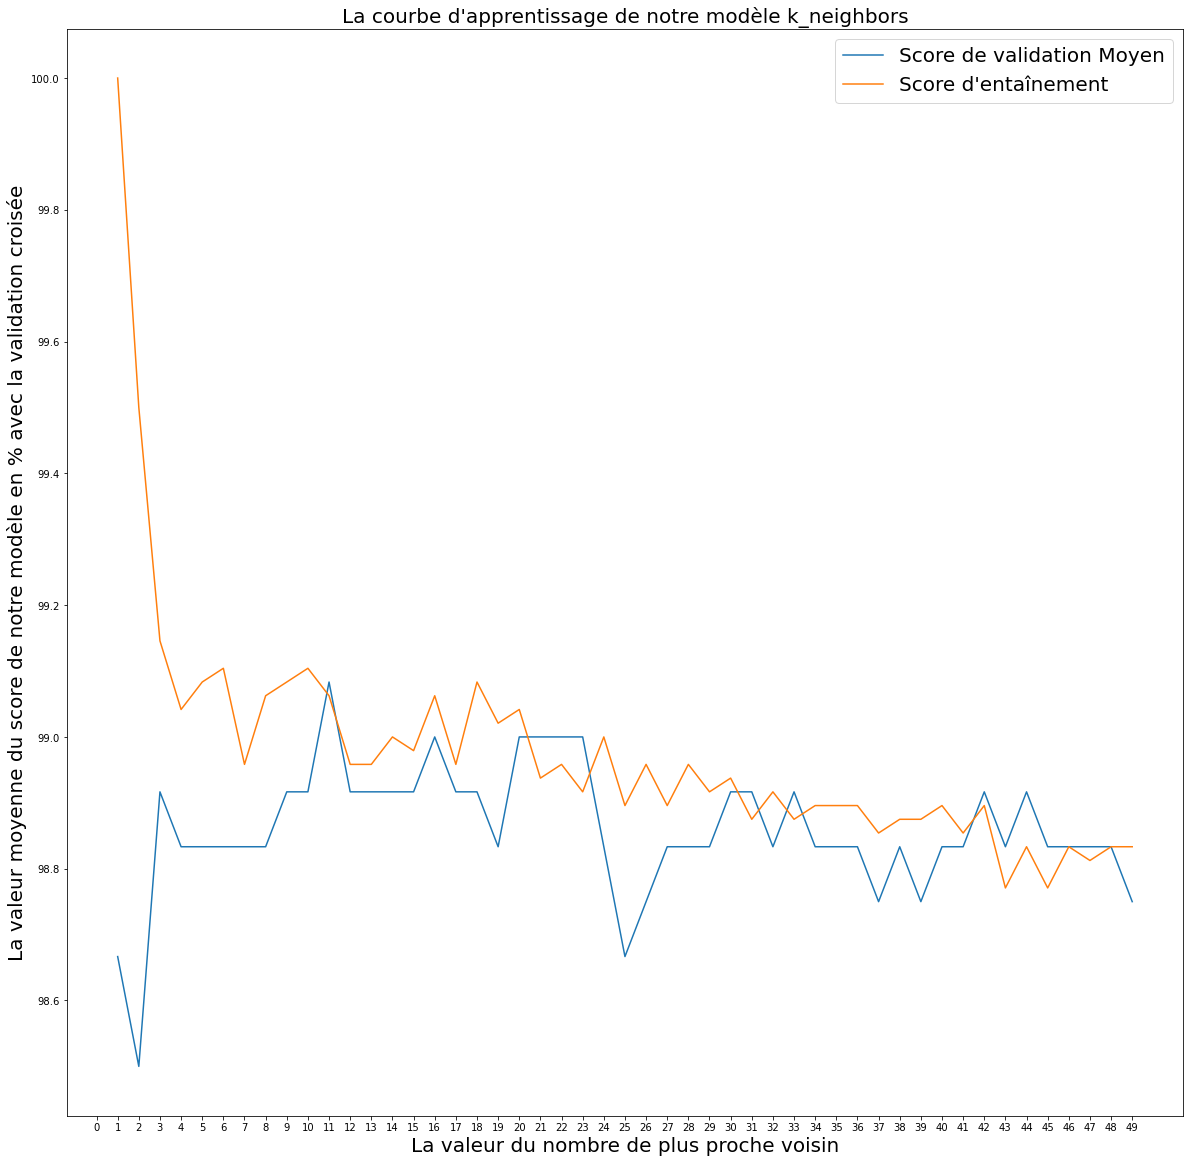

In [242]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Graphiques

plt.plot(k,Moy_cross_validation,label='Score de validation Moyen')
plt.plot(k,train_score_class.mean(axis=1)*100,label='Score d\'entaînement')

plt.title(f"La courbe d'apprentissage de notre modèle k_neighbors", fontsize = fs)
plt.xlabel("La valeur du nombre de plus proche voisin",fontsize=fs)
plt.ylabel("La valeur moyenne du score de notre modèle en % avec la validation croisée",fontsize=fs)

plt.xticks(np.arange(0,50))

plt.legend(fontsize=fs)

# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_classification.png")
plt.show()



In [243]:
Moy_cross_validation

array([98.66666667, 98.5       , 98.91666667, 98.83333333, 98.83333333,
       98.83333333, 98.83333333, 98.83333333, 98.91666667, 98.91666667,
       99.08333333, 98.91666667, 98.91666667, 98.91666667, 98.91666667,
       99.        , 98.91666667, 98.91666667, 98.83333333, 99.        ,
       99.        , 99.        , 99.        , 98.83333333, 98.66666667,
       98.75      , 98.83333333, 98.83333333, 98.83333333, 98.91666667,
       98.91666667, 98.83333333, 98.91666667, 98.83333333, 98.83333333,
       98.83333333, 98.75      , 98.83333333, 98.75      , 98.83333333,
       98.83333333, 98.91666667, 98.83333333, 98.91666667, 98.83333333,
       98.83333333, 98.83333333, 98.83333333, 98.75      ])

In [244]:
n_neighbors_optimal = Moy_cross_validation.argmax() + 1

print(f"Le nombre de plus proche voisin optimal pour l'algorithme du K_neighbors est de {n_neighbors_optimal}")

Le nombre de plus proche voisin optimal pour l'algorithme du K_neighbors est de 11


In [245]:
model = KNeighborsClassifier(n_neighbors=n_neighbors_optimal)

model_k_neighbors = model.fit(Xtrain_class_normalized,Ytrain_class.ravel())

score = model_k_neighbors.score(Xtest_class_normalized,Ytest_class.ravel())
score_train = model_k_neighbors.score(Xtrain_class_normalized,Ytrain_class.ravel())

print(f"Le score de ce modèle est de {score.round(2)*100} % de précision sur le testing set")
print(f"Ce score est de {score_train.round(2)*100} % de précision sur le training set qui à permis d'optimiser l'algorithme")
print(f"avec un nombre de plus proche voisin optimal de {n_neighbors_optimal}")

Le score de ce modèle est de 99.0 % de précision sur le testing set
Ce score est de 99.0 % de précision sur le training set qui à permis d'optimiser l'algorithme
avec un nombre de plus proche voisin optimal de 11


## c) Learning Curve

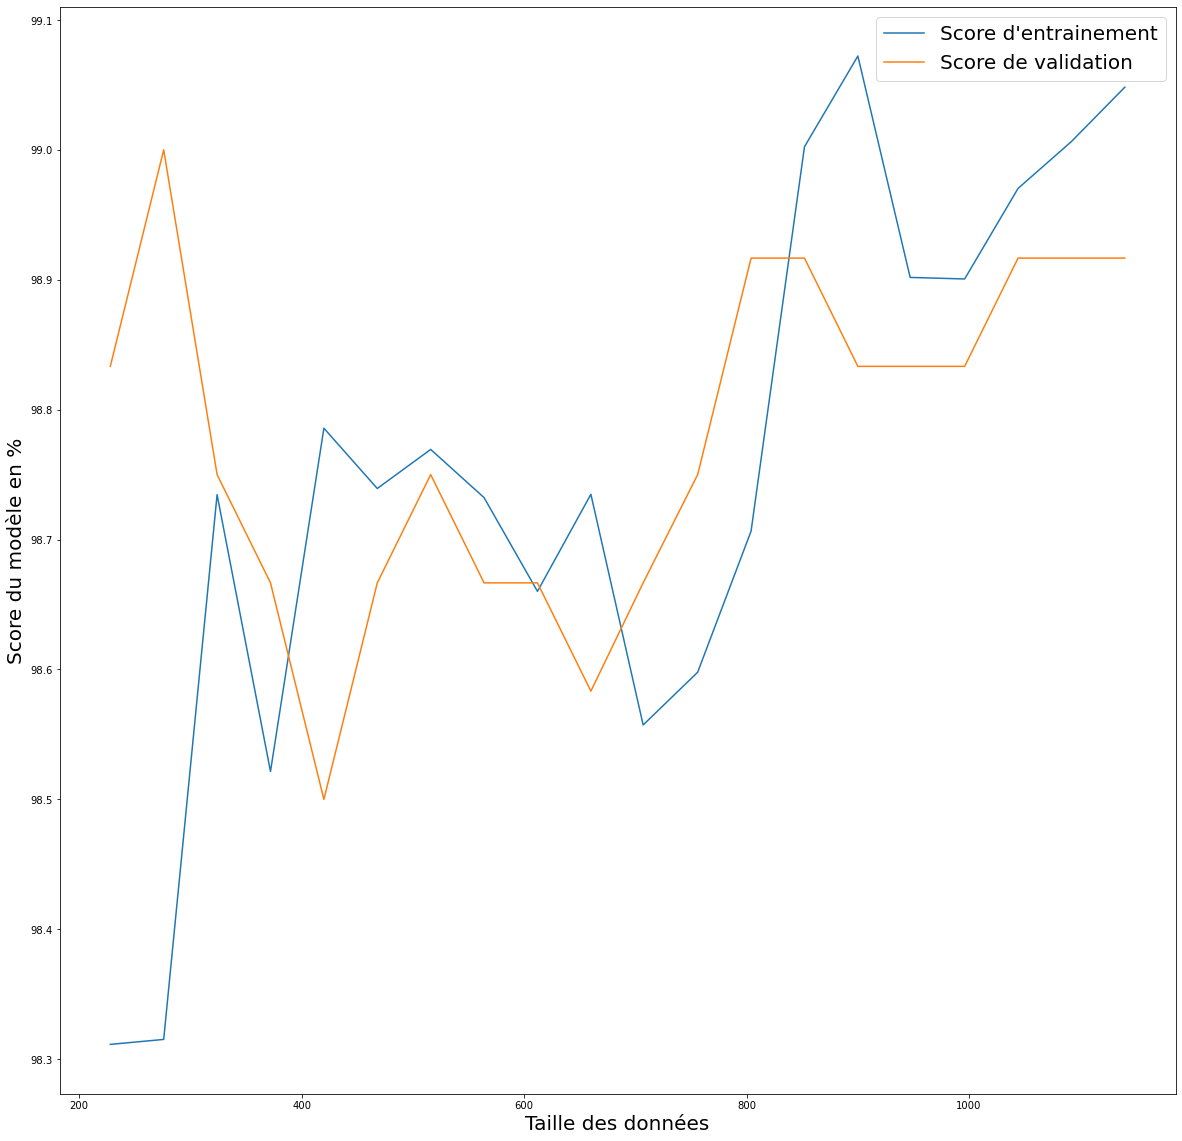

In [246]:
# Est-ce que en rajoutant des données d'apprentissage le modèle apprendra mieux ?

Nbre_découpage = 20

N,train_score_lc_k_nei, validation_score_lc_knei = learning_curve(model_k_neighbors,Xtrain_class_normalized,Ytrain_class.ravel(),train_sizes= np.linspace(0.2,1,20),cv=Nbre_découpage)

# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

plt.plot(N,100*train_score_lc_k_nei.mean(axis=1),label='Score d\'entrainement')
plt.plot(N,100*validation_score_lc_knei.mean(axis=1),label='Score de validation')
plt.xlabel("Taille des données",fontsize=fs)
plt.ylabel("Score du modèle en %",fontsize=fs)
plt.legend(fontsize=fs)


# Pour sauvegarder les figures

plt.savefig("P10_courbe_apprentissage_classification_kneighbors.png")
plt.show()


## d) La matrice de confusion

In [247]:
# On va tester tous les Ytest en les comparant avec la prédiction de notre modèle

Matrice_conf_k_nei = confusion_matrix(Ytest_class,model_k_neighbors.predict(Xtest_class_normalized))
Matrice_conf_k_nei

array([[ 93,   1],
       [  1, 205]], dtype=int64)

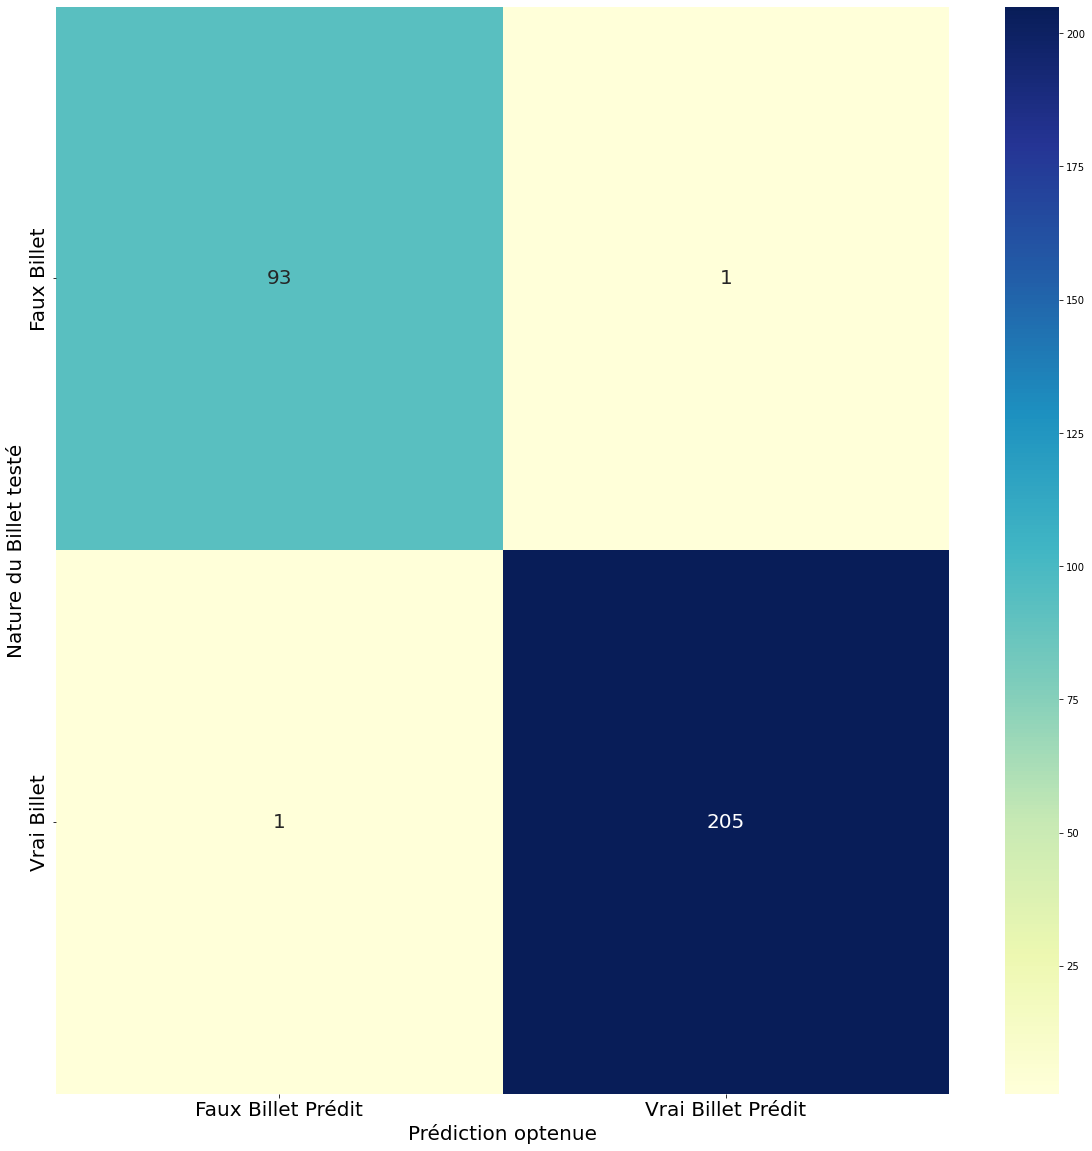

In [248]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))


# Je prends les données intéressantes

Matrice = Matrice_conf_k_nei

l1_somme = Matrice[0,0]+ Matrice[0,1] 
l2_somme = Matrice[1,0]+ Matrice[1,1] 
c1_somme = Matrice[0,0]+ Matrice[1,0] 
c2_somme = Matrice[0,1]+ Matrice[1,1]

Total = l1_somme + l2_somme

Test_pour_matrice_conf = Matrice[0,0]

# La ligne qui a la plus grande somme représente les vrais billets l'autre les faux billets

if l1_somme > l2_somme:
    row = ["Vrai Billet","Faux Billet"]
    if Test_pour_matrice_conf > Matrice_conf[0,1]:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[0,1]
        Vrai_Vrai = Matrice[0,0]
        Faux_Vrai = Matrice[1,0]
        Faux_Faux = Matrice[1,1]
    else:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[0,0]
        Vrai_Vrai = Matrice[0,1]
        Faux_Vrai = Matrice[1,1]
        Faux_Faux = Matrice[1,0]
else: 

    row = ["Faux Billet","Vrai Billet"]
    if Test_pour_matrice_conf > Matrice[0,1]:
        col = ["Faux Billet Prédit","Vrai Billet Prédit"]
        Vrai_Faux = Matrice[1,0]
        Vrai_Vrai = Matrice[1,1]
        Faux_Vrai = Matrice[0,1]
        Faux_Faux = Matrice[0,0]
    else:
        col = ["Vrai Billet Prédit","Faux Billet Prédit"]
        Vrai_Faux = Matrice[1,1]
        Vrai_Vrai = Matrice[1,0]
        Faux_Vrai = Matrice[0,0]
        Faux_Faux = Matrice[0,1]

# Traçons la matrice de confusion

sns.heatmap(Matrice_conf_k_nei,annot=True, cmap = "YlGnBu",fmt="d",annot_kws={"fontsize":fs}
            ,xticklabels=col,yticklabels=row)
plt.xlabel("Prédiction optenue",fontsize= fs)
plt.ylabel("Nature du Billet testé",fontsize= fs)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

# Pour sauvegarder les figures

plt.savefig("P10_Matrice_confusion_kneighbors.png")
plt.show()

In [249]:
Info_matrice_confusion(Matrice_conf_k_nei)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.33 %
et une précision de 99.51 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.51 % 


In [250]:
# J'ai trouvé des fonctions qui calculent cela automatiquement et j'ai bien les mêmes résultats

from sklearn.metrics import classification_report, accuracy_score

Yvrai = Ytest_class
Yprédit = model_k_neighbors.predict(Xtest_class_normalized)

print(classification_report(Yvrai,Yprédit))
print(accuracy_score(Yvrai,Yprédit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       1.00      1.00      1.00       206

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

0.9933333333333333


## e) Conclusion sur le K_neighbors

In [251]:
Temps_fin_k_neighbors = time.time()


# VIII) Conclusion

# a) Pour la régression logistique

In [252]:
Info_matrice_confusion(Matrice_conf_reg_logistique)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


In [253]:
Info_matrice_confusion(Matrice_conf_reg_logistique_var_pertinentes)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.0 %
et une précision de 99.03 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.27 % 


In [254]:
# Voici les variables importantes
Variable_importantes_Reg_Log

['height_left', 'height_right', 'margin_low', 'margin_up', 'length']

In [255]:
# voici la totalité des variables :

Xtrain_class.columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

# b) Pour le kmeans

In [256]:
Info_matrice_confusion(Matrice_conf_k_means)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.33 %
et une précision de 99.51 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.51 % 


# c) Pour le kneighbors

In [257]:
Info_matrice_confusion(Matrice_conf_k_nei)

La matrice de confusion de taille (2*2) a une bonne prédiction (Accuracy)de 99.33 %
et une précision de 99.51 % (Bonne prédiciton positive parmi les prédicitons +)
et un recall de 99.51 % (Bonne prédiciton positive parmi les données +)
et un score F1 de 99.51 % 


## d) Le temps d'exécution du script

In [258]:
End = time.time()

# Voici les temmps mesurés

TPS_explor = Tps_Fin_exploration - Start
Tps_reg_lin = Temps_fin_regression_linéaire - Tps_Fin_exploration
Tps_kmeans = Temps_fin_kmeans - Temps_fin_regression_linéaire
Tps_reg_log = Temps_fin_reg_log - Temps_fin_kmeans
Tps_k_neighbors = Temps_fin_k_neighbors - Temps_fin_reg_log

elapsed = End - Start

print(f'Le temps d\'exécution de tout le script est de : {round(elapsed,2)}s soit {round(elapsed/60,2)}min')
print("\nVoici le détail du temps d'exécution:")
print(f'Le temps d\'exécution de l\'exploration des données est de : {round((TPS_explor),2)}s')
print(f'Le temps d\'exécution de la régression linéaire est de : {round((Tps_reg_lin),2)}s')
print(f'Le temps d\'exécution du kmeans est de : {round((Tps_kmeans),2)}s')
print(f'Le temps d\'exécution de la régression logistique est de : {round((Tps_reg_log),2)}s')
print(f'Le temps d\'exécution du k_neighbors est de : {(round(Tps_k_neighbors,2))}s')

Le temps d'exécution de tout le script est de : 74.84s soit 1.25min

Voici le détail du temps d'exécution:
Le temps d'exécution de l'exploration des données est de : 11.07s
Le temps d'exécution de la régression linéaire est de : 24.25s
Le temps d'exécution du kmeans est de : 15.26s
Le temps d'exécution de la régression logistique est de : 5.51s
Le temps d'exécution du k_neighbors est de : 18.65s


# IX) Partie Validation

## a) Préparation des données

In [281]:
# Pour tester mes algorithmes avecd le fichier de la soutenance

Billet_Prod_Soutenance = pd.read_csv('billets_test_2.csv', sep =',')

In [260]:
# voici le Dataframe

Billet_Prod_Soutenance

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [261]:
Test_Nan(Billet_Prod_Soutenance)

Il n'y a pas de Nan dans le dataframe testé et il y 5 lignes au total


In [262]:
# J'utilise la régresion logistique avec toutes les variables

XBillet_Prod_Soutenance = Billet_Prod_Soutenance.drop(columns={"id"})

XBillet_Prod_Soutenance

,diagonal,height_left,height_right,margin_low,margin_up,length
0,172.09,103.95,103.73,4.39,3.09,113.19
1,171.52,104.17,104.03,5.27,3.16,111.82
2,171.78,103.80,103.75,3.81,3.24,113.39
3,172.02,104.08,103.99,5.57,3.30,111.10
4,171.79,104.34,104.37,5.00,3.07,111.87


In [263]:
# Je transforme les données avec mon Min Max scaler

XBillet_Prod_Soutenance_MinMax = scaler_MinMax.transform(XBillet_Prod_Soutenance)

In [264]:
XBillet_Prod_Soutenance_MinMax

array([[0.53299492, 0.46551724, 0.42723005, 0.37903226, 0.5       ,
        0.72283814],
       [0.24365482, 0.59195402, 0.56807512, 0.6155914 , 0.54268293,
        0.41906874],
       [0.37563452, 0.37931034, 0.43661972, 0.22311828, 0.59146341,
        0.76718404],
       [0.49746193, 0.54022989, 0.54929577, 0.69623656, 0.62804878,
        0.2594235 ],
       [0.38071066, 0.68965517, 0.72769953, 0.54301075, 0.48780488,
        0.43015521]])

In [265]:
XBillet_Prod_Soutenance_MinMax.shape

(5, 6)

## b) Testons avec la régression logistique

In [266]:
# Voici les prédictions

Prédiction_Soutenance_Reg_Log = reg_logistique.predict(XBillet_Prod_Soutenance_MinMax)
Prédiction_Soutenance_Reg_Log

array([1, 0, 1, 0, 0], dtype=int64)

In [267]:
# 0 les faux billets et 1 les vrais billet

reg_logistique.classes_

array([0, 1], dtype=int64)

In [268]:
# Voici les coefficients de la régresion logistique

reg_logistique.coef_

array([[ 1.02883589, -2.05414438, -3.14087511, -6.47959098, -4.67895933,
         8.11618811]])

In [269]:
# Voici la probabilité d'être un vrai ou un faux billet

Predict_proba_reg_log = reg_logistique.predict_proba(XBillet_Prod_Soutenance_MinMax)
Predict_proba_reg_log

array([[0.04961017, 0.95038983],
       [0.90422451, 0.09577549],
       [0.02022125, 0.97977875],
       [0.98264546, 0.01735454],
       [0.87964478, 0.12035522]])

In [270]:
# Je vais résumer ici les infos

Proba_prediction_reg_log = pd.DataFrame(Predict_proba_reg_log, columns=["Probabilité d'être un faux billet","Probabilité d'être un vrai billet"]).round(2)
Proba_prediction_reg_log

,Probabilité d'être un faux billet,Probabilité d'être un vrai billet
0,0.05,0.95
1,0.90,0.10
2,0.02,0.98
3,0.98,0.02
4,0.88,0.12


In [271]:
# Faire ensuite une jointure avec le fichier d'origine

Billet_Prod_Soutenance_Résulat_Reg_Log = pd.merge(Billet_Prod_Soutenance,Proba_prediction_reg_log,left_index=True, right_index=True,how='inner')

Billet_Prod_Soutenance_Résulat_Reg_Log ["Prédiction de la régression logistique"] = Prédiction_Soutenance_Reg_Log

Billet_Prod_Soutenance_Résulat_Reg_Log


,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité d'être un faux billet,Probabilité d'être un vrai billet,Prédiction de la régression logistique
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.05,0.95,1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.90,0.10,0
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.02,0.98,1
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.98,0.02,0
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.88,0.12,0


In [272]:

Billet_Prod_Soutenance_Résulat_Reg_Log ["Prédiction de la régression logistique"].replace([1,0],["Vrai Billet","Faux Billet"],inplace=True)

Billet_Prod_Soutenance_Résulat_Reg_Log

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité d'être un faux billet,Probabilité d'être un vrai billet,Prédiction de la régression logistique
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.05,0.95,Vrai Billet
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.90,0.10,Faux Billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.02,0.98,Vrai Billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.98,0.02,Faux Billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.88,0.12,Faux Billet


### c) Statistique descriptive des résultats

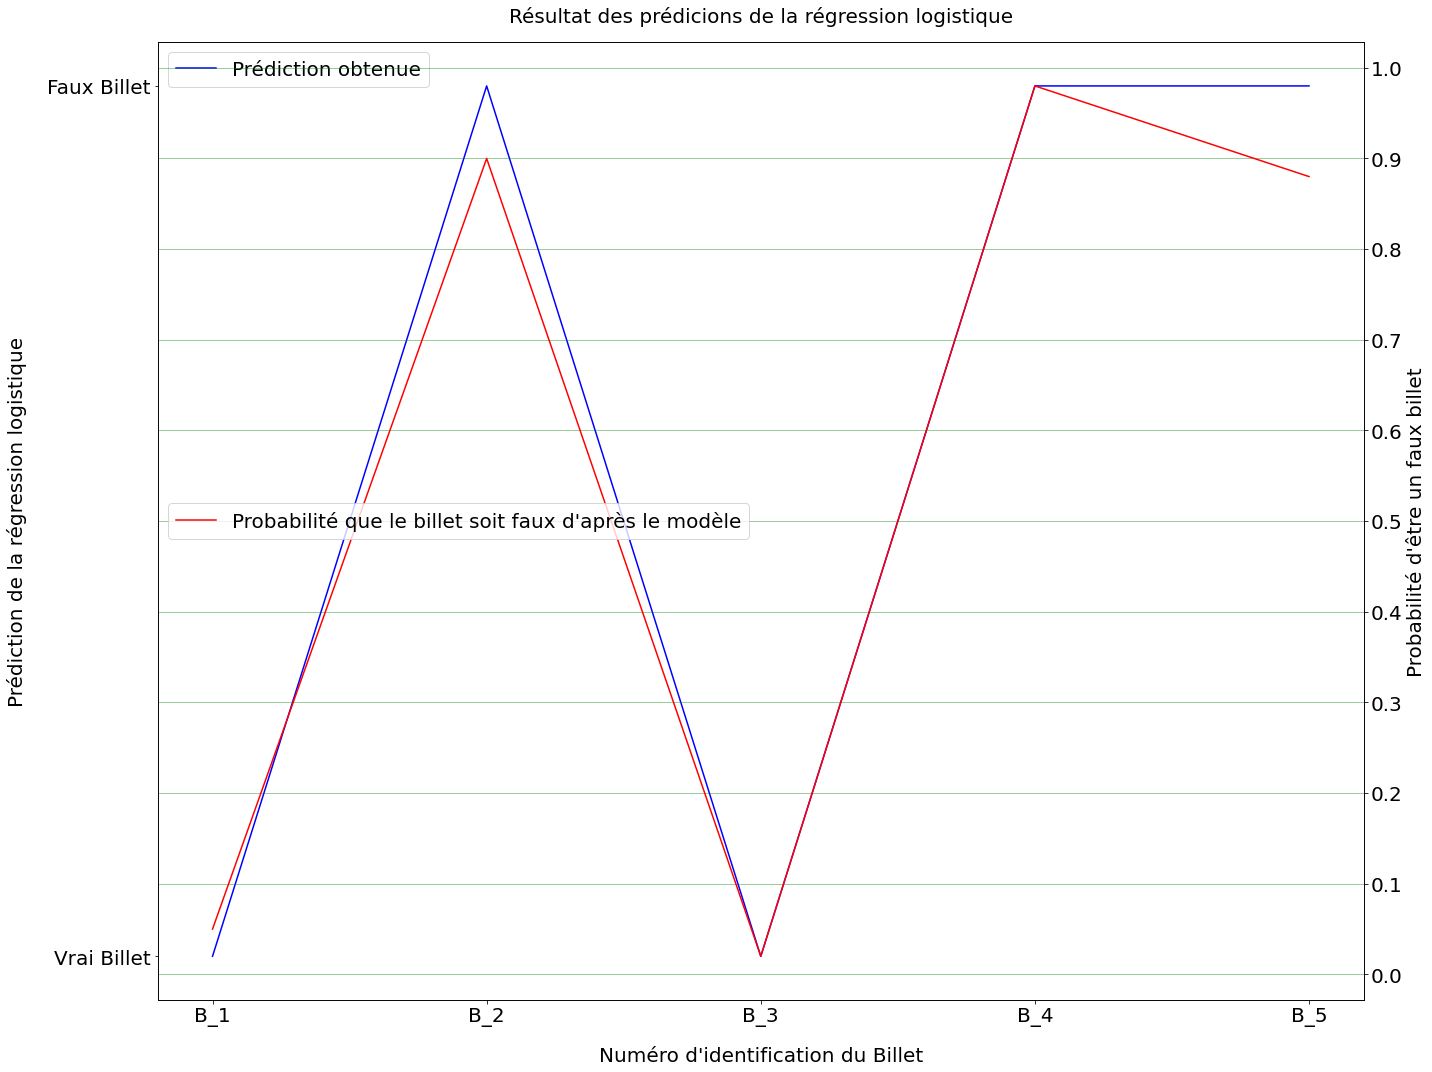

In [273]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

X = Billet_Prod_Soutenance_Résulat_Reg_Log["id"]
Y1 = Billet_Prod_Soutenance_Résulat_Reg_Log["Prédiction de la régression logistique"]
Y2 = Billet_Prod_Soutenance_Résulat_Reg_Log["Probabilité d'être un faux billet"]

fig, ax1 = plt.subplots(figsize = (fs,fs-5))

# Customisation du graphique

ax2 = ax1.twinx()
ax1.plot(X, Y1, 'b-', label = "Prédiction obtenue")
ax2.plot(X, Y2, 'r-', label = "Probabilité que le billet soit faux d'après le modèle")

ax1.set_xlabel("Numéro d'identification du Billet",fontsize = fs, labelpad = fs)
ax1.set_ylabel("Prédiction de la régression logistique",fontsize = fs, labelpad = fs)
ax2.set_ylabel("Probabilité d'être un faux billet",fontsize = fs)

# We change the fontsize of minor ticks label 
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax2.tick_params(axis='y', which='major', labelsize=fs)

ax2.set_yticks(np.arange(0,1.1,0.1))
ax2.grid(color='green', alpha=0.5, linestyle='solid')

ax1.legend(loc="best",fontsize=fs)
ax2.legend(loc="center left",fontsize=fs)

plt.title(label= "Résultat des prédicions de la régression logistique",fontsize=fs,pad=fs)
plt.tight_layout()

# Pour sauvegarder les figures

plt.savefig("P10_Soutenance_Résultat_proba.png")
plt.show()

In [274]:
Billet_Prod_Soutenance_Résulat_Reg_Log

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité d'être un faux billet,Probabilité d'être un vrai billet,Prédiction de la régression logistique
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.05,0.95,Vrai Billet
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.90,0.10,Faux Billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.02,0.98,Vrai Billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.98,0.02,Faux Billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.88,0.12,Faux Billet


In [275]:
# Préparation des statistiques

Total_Billet_Soutenance = Billet_Prod_Soutenance_Résulat_Reg_Log.count()[0]
Total_Vrai_Billet_Soutenance = Billet_Prod_Soutenance_Résulat_Reg_Log[Billet_Prod_Soutenance_Résulat_Reg_Log["Prédiction de la régression logistique"] == "Vrai Billet"].count()[0]
Total_Faux_Billet_Soutenance = Billet_Prod_Soutenance_Résulat_Reg_Log[Billet_Prod_Soutenance_Résulat_Reg_Log["Prédiction de la régression logistique"] == "Faux Billet"].count()[0]

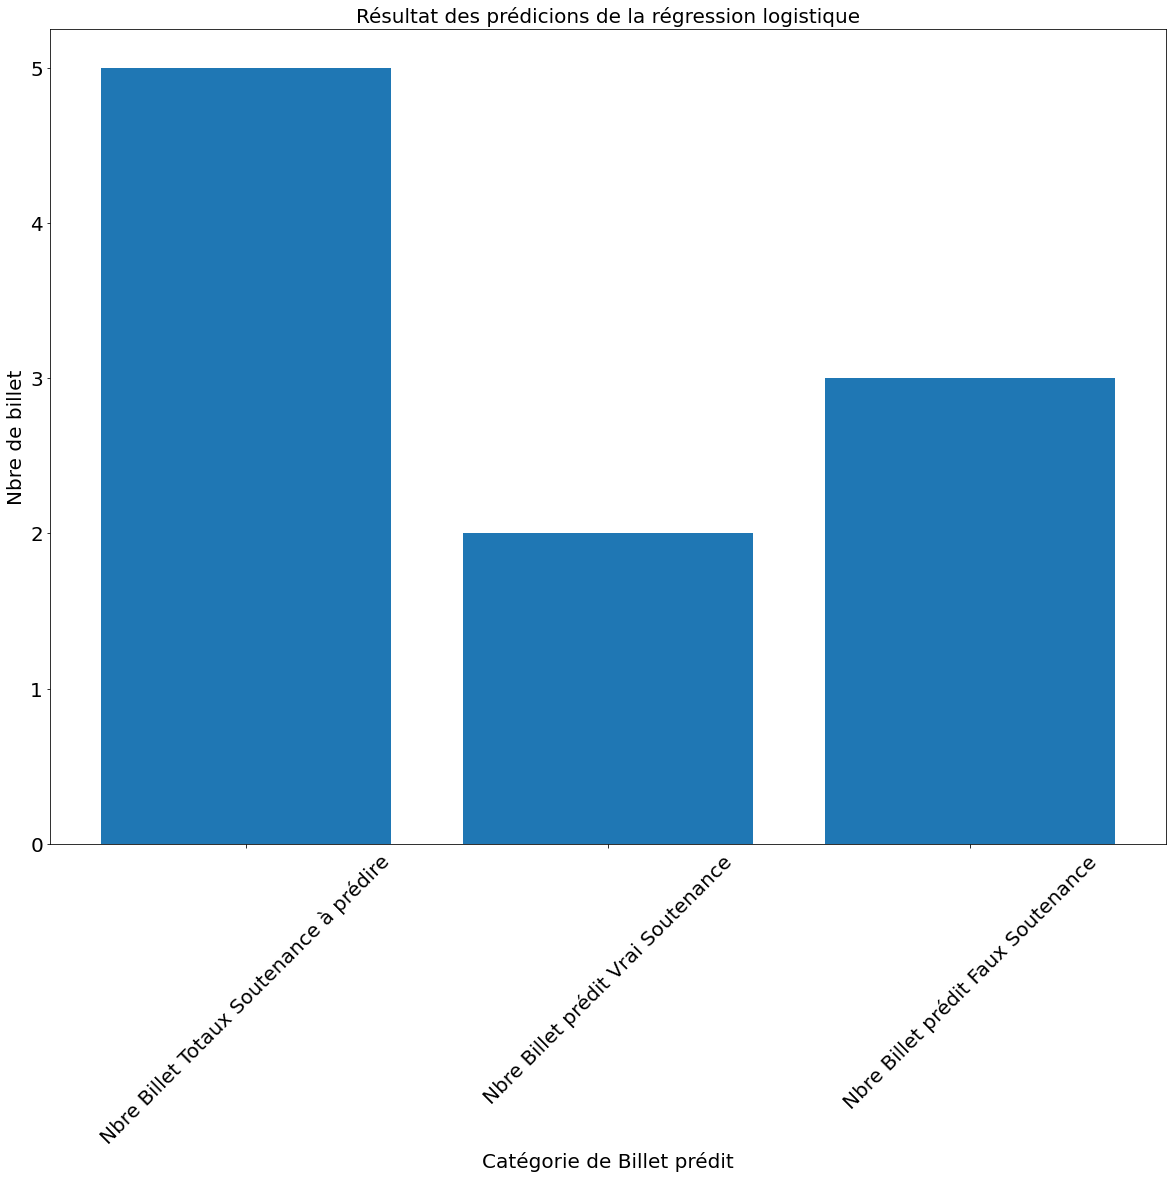

In [276]:
# Regardons la distribution des billets en fonctions des différentes variables

# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs-5))

X = ["Nbre Billet Totaux Soutenance à prédire","Nbre Billet prédit Vrai Soutenance","Nbre Billet prédit Faux Soutenance"]
Y = [Total_Billet_Soutenance,Total_Vrai_Billet_Soutenance,Total_Faux_Billet_Soutenance]

plt.bar(X,Y)
plt.xlabel("Catégorie de Billet prédit",fontsize= fs)
plt.ylabel("Nbre de billet",fontsize= fs)
plt.xticks(fontsize = fs,rotation = 45)
plt.yticks(fontsize = fs)
plt.title(label= "Résultat des prédicions de la régression logistique",fontsize=fs)

# Pour sauvegarder les figures

plt.savefig("P10_Soutenance_Résultat_dénombrement.png")
plt.show()

In [277]:
# Voici la liste des Vrais e faux billets

Vrai_Billet_Soutenance = Billet_Prod_Soutenance_Résulat_Reg_Log[Billet_Prod_Soutenance_Résulat_Reg_Log["Prédiction de la régression logistique"] == "Vrai Billet"]
Faux_Billet_Soutenance = Billet_Prod_Soutenance_Résulat_Reg_Log[Billet_Prod_Soutenance_Résulat_Reg_Log["Prédiction de la régression logistique"] == "Faux Billet"]

In [278]:
Vrai_Billet_Soutenance

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité d'être un faux billet,Probabilité d'être un vrai billet,Prédiction de la régression logistique
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,0.05,0.95,Vrai Billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,0.02,0.98,Vrai Billet


In [279]:
Faux_Billet_Soutenance

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité d'être un faux billet,Probabilité d'être un vrai billet,Prédiction de la régression logistique
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,0.90,0.10,Faux Billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.98,0.02,Faux Billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,0.88,0.12,Faux Billet


### d) bilan sur le tps d'éxécution du script

In [280]:
End_Final = time.time()

# Voici les temmps mesurés

TPS_explor = Tps_Fin_exploration - Start
Tps_reg_lin = Temps_fin_regression_linéaire - Tps_Fin_exploration
Tps_kmeans = Temps_fin_kmeans - Temps_fin_regression_linéaire
Tps_reg_log = Temps_fin_reg_log - Temps_fin_kmeans
Tps_k_neighbors = Temps_fin_k_neighbors - Temps_fin_reg_log
Tps_test_soutenance = End_Final - Temps_fin_k_neighbors

elapsed = End - Start
elapsed_final = End_Final - Start

print(f'Le temps d\'exécution de tout le script est de : {round(elapsed_final,2)}s soit {round(elapsed_final/60,2)}min')
print(f'Le temps d\'exécution sans le test final de la soutenance est de : {round(elapsed,2)}s soit {round(elapsed/60,2)}min')
print("\nVoici le détail du temps d'exécution:")
print(f'Le temps d\'exécution de l\'exploration des données est de : {round((TPS_explor),2)}s')
print(f'Le temps d\'exécution de la régression linéaire est de : {round((Tps_reg_lin),2)}s')
print(f'Le temps d\'exécution du kmeans est de : {round((Tps_kmeans),2)}s')
print(f'Le temps d\'exécution de la régression logistique est de : {round((Tps_reg_log),2)}s')
print(f'Le temps d\'exécution du k_neighbors est de : {(round(Tps_k_neighbors,2))}s')
print(f'Le temps d\'exécution du test de la soutenance est de : {(round(Tps_test_soutenance,2))}s')

Le temps d'exécution de tout le script est de : 76.06s soit 1.27min
Le temps d'exécution sans le test final de la soutenance est de : 74.84s soit 1.25min

Voici le détail du temps d'exécution:
Le temps d'exécution de l'exploration des données est de : 11.07s
Le temps d'exécution de la régression linéaire est de : 24.25s
Le temps d'exécution du kmeans est de : 15.26s
Le temps d'exécution de la régression logistique est de : 5.51s
Le temps d'exécution du k_neighbors est de : 18.65s
Le temps d'exécution du test de la soutenance est de : 1.33s
